# Practical Marketing Data Science

Support page of textbook (Japanese only):

https://www.gakujutsu.co.jp/text/isbn978-4-7806-1051-2/

Kaggle page:

https://www.kaggle.com/competitions/jissen-marketing

## Praparation

In [1]:
#It's for google colab usage on google drive.
#Ignore or change folder path that corresponds to your environment.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

COLAB_PATH = '/content/drive/My Drive/JissenMarketing'

import sys, os
sys.path.append(COLAB_PATH)
print(sys.path)
## change directory to the path above
os.chdir(COLAB_PATH)

Mounted at /content/drive
['/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/root/.ipython', '/content/drive/My Drive/JissenMarketing']


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data Download

In [3]:
df1 = pd.read_csv("./jissen-marketing/gi_train_mm10.csv")
df2 = pd.read_csv("./jissen-marketing/gi_train_mm11.csv")

## Chapter 4: EDA (1)

### Check data

In [4]:
df1.head()

customer_id   event_day  store_id          store project_category  \
0  20201026-010001  2020/10/26        10  レインボーマーケット新日本               飲料   
1  20201026-010003  2020/10/26        10  レインボーマーケット新日本               飲料   
2  20201026-010004  2020/10/26        10  レインボーマーケット新日本               飲料   
3  20201026-010005  2020/10/26        10  レインボーマーケット新日本               飲料   
4  20201026-010006  2020/10/26        10  レインボーマーケット新日本               飲料   

   area_id gender   age age_category  event_type  product_id product_name  \
0      NaN  woman  30's        Young           1         NaN          NaN   
1      NaN    man  50's       Middle           1         NaN          NaN   
2      NaN    man  10's         Teen           1         NaN          NaN   
3      NaN  woman  30's        Young           1         NaN          NaN   
4      NaN    man  40's       Middle           1         NaN          NaN   

  company  time_duration  num_touch       in_time      out_time  buy_flag  
0     NaN            6.2        0.0  08:01:50.200  08:01:56.400         0  
1     NaN           14.2        0.0  08:02:57.800  08:03:12.000         0  
2     NaN           21.0        0.0  08:06:13.200  08:06:34.200         0  
3     NaN           19.2        0.0  08:07:06.000  08:07:25.200         0  
4     NaN           19.8        0.0  08:07:13.000  08:07:32.800         0

In [5]:
df1.tail()

customer_id   event_day  store_id          store project_category  \
18892  20201031-080204  2020/10/31        10  レインボーマーケット新日本               飲料   
18893  20201031-080204  2020/10/31        10  レインボーマーケット新日本               飲料   
18894  20201031-080214  2020/10/31        10  レインボーマーケット新日本               飲料   
18895  20201031-080223  2020/10/31        10  レインボーマーケット新日本               飲料   
18896  20201031-080224  2020/10/31        10  レインボーマーケット新日本               飲料   

       area_id gender   age age_category  event_type  product_id  \
18892      NaN  woman  50's       Middle           3        19.0   
18893      NaN  woman  50's       Middle           3         8.0   
18894      NaN  woman  10's         Teen           3        23.0   
18895      NaN  woman  50's       Middle           3        59.0   
18896      NaN    man  30's        Young           3        83.0   

        product_name company  time_duration  num_touch       in_time out_time  \
18892  ディープグリーン525ml    イッツ園            0.0        1.0  21:30:49.600      NaN   
18893    ワイルドティ525ml    イッツ園            0.0        1.0  21:31:05.200      NaN   
18894   柑橘フレッシュ410ml  フューチャー            0.0        1.0  21:37:24.000      NaN   
18895  ホワイトスイーツ550ml  ラボラトリー            0.0        1.0  21:50:50.600      NaN   
18896  はじけたグレープ500ml  フューチャー            0.0        1.0  21:59:54.200      NaN   

       buy_flag  
18892         1  
18893         1  
18894         0  
18895         1  
18896         1

In [6]:
df2.head()

customer_id  event_day  store_id          store project_category  \
0  20201101-010002  2020/11/1        10  レインボーマーケット新日本               飲料   
1  20201101-010003  2020/11/1        10  レインボーマーケット新日本               飲料   
2  20201101-010006  2020/11/1        10  レインボーマーケット新日本               飲料   
3  20201101-010007  2020/11/1        10  レインボーマーケット新日本               飲料   
4  20201101-010008  2020/11/1        10  レインボーマーケット新日本               飲料   

   area_id gender       age age_category  event_type  product_id product_name  \
0      NaN    man  Over70's       Senior           1         NaN          NaN   
1      NaN    man      30's        Young           1         NaN          NaN   
2      NaN    man      20's        Young           1         NaN          NaN   
3      NaN  woman      20's        Young           1         NaN          NaN   
4      NaN  woman      50's       Middle           1         NaN          NaN   

  company  time_duration  num_touch       in_time      out_time  buy_flag  
0     NaN           21.2        0.0  08:02:09.200  08:02:30.400         0  
1     NaN           28.6        0.0  08:04:44.800  08:05:13.400         0  
2     NaN           10.0        0.0  08:08:27.600  08:08:37.600         0  
3     NaN           28.6        0.0  08:09:08.800  08:09:37.400         0  
4     NaN           98.4        0.0  08:12:04.600  08:13:43.000         0

In [7]:
df2.tail()

customer_id  event_day  store_id          store project_category  \
4361  20201101-120049  2020/11/1        10  レインボーマーケット新日本               飲料   
4362  20201101-120052  2020/11/1        10  レインボーマーケット新日本               飲料   
4363  20201101-120052  2020/11/1        10  レインボーマーケット新日本               飲料   
4364  20201101-120052  2020/11/1        10  レインボーマーケット新日本               飲料   
4365  20201101-120052  2020/11/1        10  レインボーマーケット新日本               飲料   

      area_id gender   age age_category  event_type  product_id  \
4361      NaN  woman  40's       Middle           3        27.0   
4362      NaN    man  20's        Young           3       103.0   
4363      NaN    man  20's        Young           3        58.0   
4364      NaN    man  20's        Young           3        30.0   
4365      NaN    man  20's        Young           3        71.0   

       product_name company  time_duration  num_touch       in_time out_time  \
4361      新緑の丘525ml  フューチャー            0.0        1.0  21:30:34.600      NaN   
4362  ハイレモンソーダ500ml   ネイティブ            0.0        1.0  21:36:38.200      NaN   
4363      優しい君500ml  ラボラトリー            0.0        1.0  21:36:45.200      NaN   
4364     ほっと一息500ml   エターナル            0.0        1.0  21:36:47.600      NaN   
4365      職人の力500ml  フューチャー            0.0        1.0  21:36:57.600      NaN   

      buy_flag  
4361         1  
4362         1  
4363         1  
4364         1  
4365         1

In [8]:
df1.shape

(18897, 18)

In [9]:
df2.shape

(4366, 18)

In [10]:
df1.dtypes

customer_id          object
event_day            object
store_id              int64
store                object
project_category     object
area_id             float64
gender               object
age                  object
age_category         object
event_type            int64
product_id          float64
product_name         object
company              object
time_duration       float64
num_touch           float64
in_time              object
out_time             object
buy_flag              int64
dtype: object

In [11]:
df2.dtypes

customer_id          object
event_day            object
store_id              int64
store                object
project_category     object
area_id             float64
gender               object
age                  object
age_category         object
event_type            int64
product_id          float64
product_name         object
company              object
time_duration       float64
num_touch           float64
in_time              object
out_time             object
buy_flag              int64
dtype: object

### Concatenate October and Novermber data

In [12]:
df_tmp = pd.concat([df1,df2])

In [13]:
df_tmp.head()

customer_id   event_day  store_id          store project_category  \
0  20201026-010001  2020/10/26        10  レインボーマーケット新日本               飲料   
1  20201026-010003  2020/10/26        10  レインボーマーケット新日本               飲料   
2  20201026-010004  2020/10/26        10  レインボーマーケット新日本               飲料   
3  20201026-010005  2020/10/26        10  レインボーマーケット新日本               飲料   
4  20201026-010006  2020/10/26        10  レインボーマーケット新日本               飲料   

   area_id gender   age age_category  event_type  product_id product_name  \
0      NaN  woman  30's        Young           1         NaN          NaN   
1      NaN    man  50's       Middle           1         NaN          NaN   
2      NaN    man  10's         Teen           1         NaN          NaN   
3      NaN  woman  30's        Young           1         NaN          NaN   
4      NaN    man  40's       Middle           1         NaN          NaN   

  company  time_duration  num_touch       in_time      out_time  buy_flag  
0     NaN            6.2        0.0  08:01:50.200  08:01:56.400         0  
1     NaN           14.2        0.0  08:02:57.800  08:03:12.000         0  
2     NaN           21.0        0.0  08:06:13.200  08:06:34.200         0  
3     NaN           19.2        0.0  08:07:06.000  08:07:25.200         0  
4     NaN           19.8        0.0  08:07:13.000  08:07:32.800         0

### Check unique data size

Concatenated df_temp and df1 + df2 have different data size. We need to check why it happens.

In [14]:
print(df_tmp["customer_id"].unique().size)
print(df1["customer_id"].unique().size + df2["customer_id"].unique().size)

9117
9118


It looks that there are null data in df1 and df2, such that above discrepancy happened.

In [15]:
print(df_tmp["customer_id"].isnull().any())
print(df1["customer_id"].isnull().any())
print(df2["customer_id"].isnull().any())

True
True
True


Now, checking unique data excluding null data using nunique(). Unique number of data is same between df_tmp and df1+df2.

In [16]:
print(df_tmp["customer_id"].nunique())
print(df1["customer_id"].nunique() + df2["customer_id"].nunique())

9116
9116


### Eliminating data which has null in customer_id

In [17]:
df_tmp = df_tmp[df_tmp["customer_id"].notna()]

Change df name from df_tmp (temporary) to df.

Note:
* By using df_tmp.copy(), we can pass df_tmp to df by value. By doing so, when we change value in df, the value in df_tmp won't be affected by changing value in df.

* If we write df = df_tmp, it means that we pass df_tmp by reference, i.e. both df and df_tmp refer to same object such that changing the value in df will affect to the value in df_tmp.

Reference here too:
https://blog.penjee.com/passing-by-value-vs-by-reference-java-graphical/

In [18]:
df = df_tmp.copy()

In [19]:
df.head()

customer_id   event_day  store_id          store project_category  \
0  20201026-010001  2020/10/26        10  レインボーマーケット新日本               飲料   
1  20201026-010003  2020/10/26        10  レインボーマーケット新日本               飲料   
2  20201026-010004  2020/10/26        10  レインボーマーケット新日本               飲料   
3  20201026-010005  2020/10/26        10  レインボーマーケット新日本               飲料   
4  20201026-010006  2020/10/26        10  レインボーマーケット新日本               飲料   

   area_id gender   age age_category  event_type  product_id product_name  \
0      NaN  woman  30's        Young           1         NaN          NaN   
1      NaN    man  50's       Middle           1         NaN          NaN   
2      NaN    man  10's         Teen           1         NaN          NaN   
3      NaN  woman  30's        Young           1         NaN          NaN   
4      NaN    man  40's       Middle           1         NaN          NaN   

  company  time_duration  num_touch       in_time      out_time  buy_flag  
0     NaN            6.2        0.0  08:01:50.200  08:01:56.400         0  
1     NaN           14.2        0.0  08:02:57.800  08:03:12.000         0  
2     NaN           21.0        0.0  08:06:13.200  08:06:34.200         0  
3     NaN           19.2        0.0  08:07:06.000  08:07:25.200         0  
4     NaN           19.8        0.0  08:07:13.000  08:07:32.800         0

### Split data by event type 1-3

Note:
* event_type =1: frame in/out
* event_type =2: area in/out
* event_type =3: touching or purchasing product

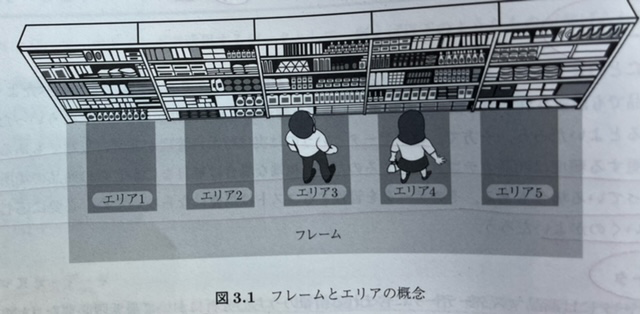

In [20]:
df_et1 = df.loc[(df["event_type"] == 1)]
df_et2 = df.loc[(df["event_type"] == 2)]
df_et3 = df.loc[(df["event_type"] == 3)]

### Check data properties

Checking data by value_counts, info, nunique, describe, dtype etc is important initial step to understand data.

In [21]:
print(df_et1["event_type"].value_counts())
print(df_et2["event_type"].value_counts())
print(df_et3["event_type"].value_counts())

1    9116
Name: event_type, dtype: int64
2    7200
Name: event_type, dtype: int64
3    6907
Name: event_type, dtype: int64


In [22]:
df_et1.info

<bound method DataFrame.info of           customer_id   event_day  store_id          store project_category  \
0     20201026-010001  2020/10/26        10  レインボーマーケット新日本               飲料   
1     20201026-010003  2020/10/26        10  レインボーマーケット新日本               飲料   
2     20201026-010004  2020/10/26        10  レインボーマーケット新日本               飲料   
3     20201026-010005  2020/10/26        10  レインボーマーケット新日本               飲料   
4     20201026-010006  2020/10/26        10  レインボーマーケット新日本               飲料   
...               ...         ...       ...            ...              ...   
1726  20201101-120046   2020/11/1        10  レインボーマーケット新日本               飲料   
1727  20201101-120047   2020/11/1        10  レインボーマーケット新日本               飲料   
1728  20201101-120049   2020/11/1        10  レインボーマーケット新日本               飲料   
1729  20201101-120052   2020/11/1        10  レインボーマーケット新日本               飲料   
1730  20201101-120057   2020/11/1        10  レインボーマーケット新日本               飲料   

      area_id gende

In [23]:
df_et1["customer_id"].nunique()

9116

In [24]:
df_et1.describe()

store_id  area_id  event_type  product_id  time_duration  num_touch  \
count    9116.0      0.0      9116.0         0.0    9116.000000     9116.0   
mean       10.0      NaN         1.0         NaN      35.834138        0.0   
std         0.0      NaN         0.0         NaN      36.451522        0.0   
min        10.0      NaN         1.0         NaN       0.000000        0.0   
25%        10.0      NaN         1.0         NaN      12.800000        0.0   
50%        10.0      NaN         1.0         NaN      23.800000        0.0   
75%        10.0      NaN         1.0         NaN      45.400000        0.0   
max        10.0      NaN         1.0         NaN     421.600000        0.0   

       buy_flag  
count    9116.0  
mean        0.0  
std         0.0  
min         0.0  
25%         0.0  
50%         0.0  
75%         0.0  
max         0.0

In [25]:
df_et1.dtypes

customer_id          object
event_day            object
store_id              int64
store                object
project_category     object
area_id             float64
gender               object
age                  object
age_category         object
event_type            int64
product_id          float64
product_name         object
company              object
time_duration       float64
num_touch           float64
in_time              object
out_time             object
buy_flag              int64
dtype: object

### Depict simple graphs for EDA

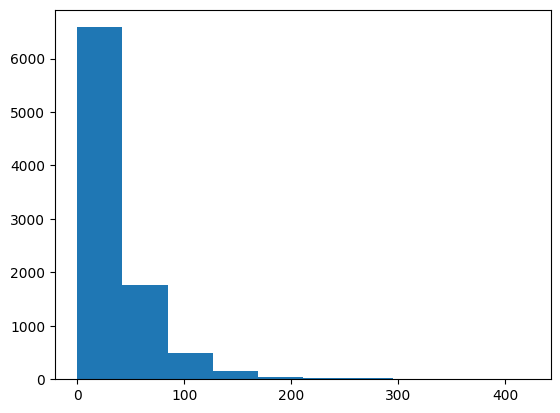

In [26]:
plt.hist(df_et1["time_duration"])
plt.show()

### Improving histgram

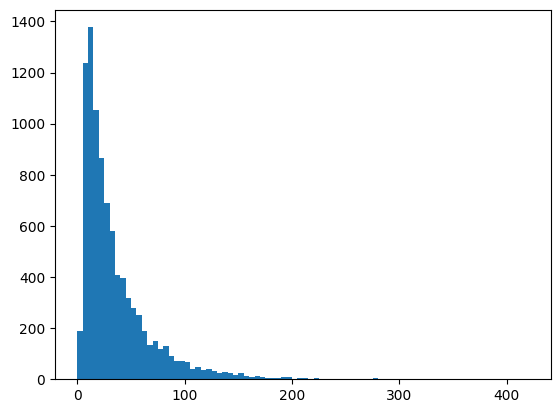

In [27]:
bin_min = int(df_et1["time_duration"].min())
bin_max = int(df_et1["time_duration"].max())
edges = range(bin_min, bin_max, 5)
plt.hist(df_et1["time_duration"], bins=edges)
plt.show()

In [28]:
edges

range(0, 421, 5)

### Depicting boxplot

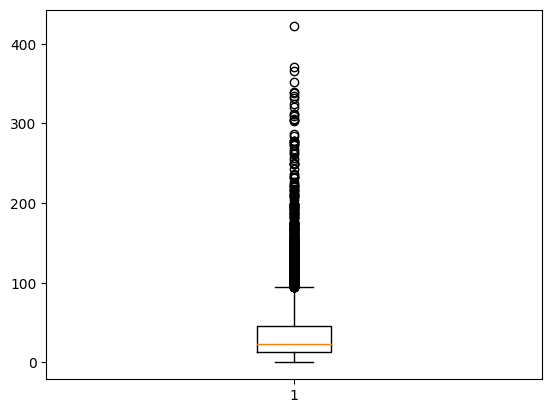

In [29]:
plt.boxplot(df_et1["time_duration"])
plt.show()

In [30]:
print("shoppers who stayed at shop more than 94.3 seconds")
print(df_et1[df_et1["time_duration"] > 94.3]["customer_id"].nunique())
print("shoppers who stayed at shop less than 94.3 seconds")
print(df_et1[df_et1["time_duration"] <= 94.3]["customer_id"].nunique())


shoppers who stayed at shop more than 94.3 seconds
591
shoppers who stayed at shop less than 94.3 seconds
8525


### Changing data type to str for categorical data etc

In [31]:
df.dtypes

customer_id          object
event_day            object
store_id              int64
store                object
project_category     object
area_id             float64
gender               object
age                  object
age_category         object
event_type            int64
product_id          float64
product_name         object
company              object
time_duration       float64
num_touch           float64
in_time              object
out_time             object
buy_flag              int64
dtype: object

In [32]:
df.columns

Index(['customer_id', 'event_day', 'store_id', 'store', 'project_category',
       'area_id', 'gender', 'age', 'age_category', 'event_type', 'product_id',
       'product_name', 'company', 'time_duration', 'num_touch', 'in_time',
       'out_time', 'buy_flag'],
      dtype='object')

In [33]:
df[['customer_id', 'event_day', 'store_id', 'store', 'project_category',
       'area_id', 'gender', 'age', 'age_category', 'event_type', 'product_id',
       'product_name', 'company', 'num_touch', 'in_time',
       'out_time', 'buy_flag']] \
       = df[['customer_id', 'event_day', 'store_id', 'store', 'project_category',
       'area_id', 'gender', 'age', 'age_category', 'event_type', 'product_id',
       'product_name', 'company', 'num_touch', 'in_time',
       'out_time', 'buy_flag']].astype(str)

In [34]:
df.dtypes

customer_id          object
event_day            object
store_id             object
store                object
project_category     object
area_id              object
gender               object
age                  object
age_category         object
event_type           object
product_id           object
product_name         object
company              object
time_duration       float64
num_touch            object
in_time              object
out_time             object
buy_flag             object
dtype: object

In [35]:
df.describe()

time_duration
count   23223.000000
mean       19.602403
std        29.266865
min         0.000000
25%         0.000000
50%        10.400000
75%        25.000000
max       421.600000

## Chapter 5: EDA (2)

### Split data by event_type again

Split data by event_type again to reflect data type change by astype() in df

In [36]:
df_et1 = df.loc[(df["event_type"] == "1")]
df_et2 = df.loc[(df["event_type"] == "2")]
df_et3 = df.loc[(df["event_type"] == "3")]

### EDA of event_type == 2 (Area in/out)

In [37]:
df_et2.dtypes

customer_id          object
event_day            object
store_id             object
store                object
project_category     object
area_id              object
gender               object
age                  object
age_category         object
event_type           object
product_id           object
product_name         object
company              object
time_duration       float64
num_touch            object
in_time              object
out_time             object
buy_flag             object
dtype: object

In [38]:
df_et2.head()

customer_id   event_day store_id          store project_category  \
7385  20201026-010001  2020/10/26       10  レインボーマーケット新日本               飲料   
7386  20201026-010003  2020/10/26       10  レインボーマーケット新日本               飲料   
7387  20201026-010005  2020/10/26       10  レインボーマーケット新日本               飲料   
7388  20201026-010006  2020/10/26       10  レインボーマーケット新日本               飲料   
7389  20201026-010007  2020/10/26       10  レインボーマーケット新日本               飲料   

     area_id gender   age age_category event_type product_id product_name  \
7385     1.0  woman  30's        Young          2        nan          nan   
7386     1.0    man  50's       Middle          2        nan          nan   
7387     1.0  woman  30's        Young          2        nan          nan   
7388     1.0    man  40's       Middle          2        nan          nan   
7389     2.0    man  30's        Young          2        nan          nan   

     company  time_duration num_touch       in_time      out_time buy_flag  
7385     nan            6.2       0.0  08:01:50.200  08:01:56.400        0  
7386     nan           14.0       0.0  08:02:58.000  08:03:12.000        0  
7387     nan            4.8       0.0  08:07:13.000  08:07:17.800        0  
7388     nan            7.2       0.0  08:07:19.800  08:07:27.000        0  
7389     nan           44.0       0.0  08:10:31.800  08:11:15.800        0

In [39]:
df_et2["time_duration"].describe()

count    7200.000000
mean       17.855917
std        19.372629
min         0.000000
25%         7.000000
50%        12.000000
75%        21.800000
max       338.400000
Name: time_duration, dtype: float64

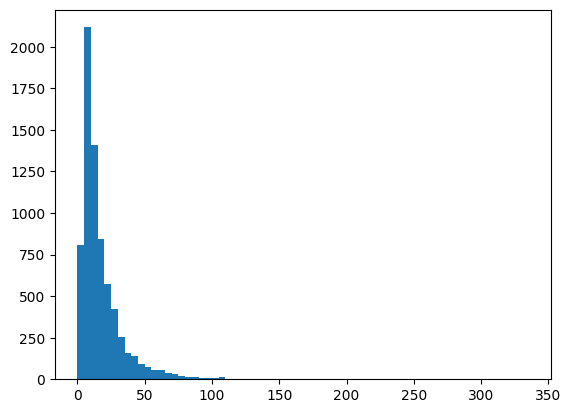

In [40]:
bin_min = int(df_et2["time_duration"].min())
bin_max = int(df_et2["time_duration"].max())
edges = range(bin_min, bin_max, 5)
plt.hist(df_et2["time_duration"], bins=edges)
plt.show()

In [41]:
df_et2["area_id"].value_counts()

1.0    2220
3.0    1907
5.0    1152
2.0    1110
4.0     811
Name: area_id, dtype: int64

### Change data type of area_id to int then str

In [42]:
 df_et2.loc[:,"area_id"]

7385    1.0
7386    1.0
7387    1.0
7388    1.0
7389    2.0
       ... 
3075    1.0
3076    5.0
3077    4.0
3078    2.0
3079    3.0
Name: area_id, Length: 7200, dtype: object

In [43]:
df_et2["area_id"] =  df_et2["area_id"].astype('float64').astype('int').astype(str)

<ipython-input-43-f01f171e36c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_et2["area_id"] =  df_et2["area_id"].astype('float64').astype('int').astype(str)


In [44]:
df_et2["area_id"]

7385    1
7386    1
7387    1
7388    1
7389    2
       ..
3075    1
3076    5
3077    4
3078    2
3079    3
Name: area_id, Length: 7200, dtype: object

In [45]:
df_et2["area_id"].dtype

dtype('O')

### Check time_duration by area

In [46]:
df_et2_byArea = df_et2.groupby('area_id')

In [47]:
df_et2_byArea['time_duration'].describe()

count       mean        std  min   25%   50%    75%    max
area_id                                                             
1        2220.0  20.449009  23.158386  0.8  7.80  13.6  25.00  338.4
2        1110.0  15.838919  18.758466  1.2  6.00  10.6  18.20  310.0
3        1907.0  20.295648  19.540794  0.0  8.40  14.4  24.80  240.6
4         811.0  13.071023  12.716047  0.6  5.80   9.2  16.20  168.4
5        1152.0  14.132118  13.094686  2.0  6.15  10.0  17.45  119.8

### Checking frame in/out for df_et1 data

In [48]:
print("Times of frame in")
print(df_et1['in_time'].notnull().sum())
print("Times of frame out")
print(df_et1['out_time'].notnull().sum())
print("Num of people of unique shoppers")
print(df_et1['customer_id'].nunique())
print("Checking no duplication in customer_id")
print(df_et1['customer_id'].duplicated().sum())

Times of frame in
9116
Times of frame out
9116
Num of people of unique shoppers
9116
Checking no duplication in customer_id
0


### Examining shoppers who entered into frame but did not enter into any area.

In [49]:
# Filtering shoppers who entered into frame.
list_frame = df_et1['customer_id'].drop_duplicates()
list_frame

0       20201026-010001
1       20201026-010003
2       20201026-010004
3       20201026-010005
4       20201026-010006
             ...       
1726    20201101-120046
1727    20201101-120047
1728    20201101-120049
1729    20201101-120052
1730    20201101-120057
Name: customer_id, Length: 9116, dtype: object

In [50]:
# Filtering shoppers who entered into any area.
list_area = df_et2['customer_id'].drop_duplicates()
list_area

7385    20201026-010001
7386    20201026-010003
7387    20201026-010005
7388    20201026-010006
7389    20201026-010007
             ...       
3073    20201101-120046
3074    20201101-120047
3075    20201101-120049
3076    20201101-120052
3079    20201101-120057
Name: customer_id, Length: 4654, dtype: object

In [51]:
# Examining shoppers who entered into frame but did not enter into any area.
list_frame_only = list_frame[~list_frame.isin(list_area)]
list_frame_only

2       20201026-010004
10      20201026-010013
11      20201026-010014
17      20201026-010023
19      20201026-010025
             ...       
1716    20201101-120032
1718    20201101-120035
1720    20201101-120037
1721    20201101-120039
1724    20201101-120042
Name: customer_id, Length: 4462, dtype: object

In [52]:
#This shopper entered into frame, then entered into area, and then purchased green tea
df[df['customer_id'] == '20201026-010001']

customer_id   event_day store_id          store project_category  \
0      20201026-010001  2020/10/26       10  レインボーマーケット新日本               飲料   
7385   20201026-010001  2020/10/26       10  レインボーマーケット新日本               飲料   
13242  20201026-010001  2020/10/26       10  レインボーマーケット新日本               飲料   
13243  20201026-010001  2020/10/26       10  レインボーマーケット新日本               飲料   

      area_id gender   age age_category event_type product_id  \
0         nan  woman  30's        Young          1        nan   
7385      1.0  woman  30's        Young          2        nan   
13242     nan  woman  30's        Young          3        1.0   
13243     nan  woman  30's        Young          3        1.0   

          product_name company  time_duration num_touch       in_time  \
0                  nan     nan            6.2       0.0  08:01:50.200   
7385               nan     nan            6.2       0.0  08:01:50.200   
13242  トラディショナル緑茶525ml  クオリティー            0.0       1.0  08:01:51.400   
13243  トラディショナル緑茶525ml  クオリティー            0.0       1.0  08:01:53.600   

           out_time buy_flag  
0      08:01:56.400        0  
7385   08:01:56.400        0  
13242           nan        1  
13243           nan        1

In [53]:
#This shopper entered into frame, but did not enter into area, such that did not purchase anything
df[df['customer_id'] == '20201026-010004']

customer_id   event_day store_id          store project_category  \
2  20201026-010004  2020/10/26       10  レインボーマーケット新日本               飲料   

  area_id gender   age age_category event_type product_id product_name  \
2     nan    man  10's         Teen          1        nan          nan   

  company  time_duration num_touch       in_time      out_time buy_flag  
2     nan           21.0       0.0  08:06:13.200  08:06:34.200        0

### Examining shoppers who did not enter into area, but touched/purchased products

In [54]:
#Checking shoppers who contacted / purchased products
list_contact = df_et3['customer_id'].drop_duplicates()
list_contact

13242    20201026-010001
13244    20201026-010003
13247    20201026-010005
13248    20201026-010006
13250    20201026-010007
              ...       
4355     20201101-120041
4359     20201101-120043
4360     20201101-120047
4361     20201101-120049
4362     20201101-120052
Name: customer_id, Length: 3312, dtype: object

In [55]:
# Examining shoppers who did not enter into area but contacted/purchased some product.
list_contact_only = list_contact[~list_contact.isin(list_area)]
list_contact_only

13534    20201026-020247
13597    20201026-030043
13627    20201026-030069
14073    20201027-010003
14332    20201027-020096
14392    20201027-020229
14996    20201027-060257
15582    20201028-050060
15740    20201028-060146
15981    20201029-010045
16031    20201029-010124
16067    20201029-010187
16345    20201029-040046
16436    20201029-050032
16654    20201029-070047
16734    20201029-070198
16760    20201030-010011
16790    20201030-010068
16990    20201030-020080
16992    20201030-020084
17025    20201030-020124
17363    20201030-040204
17437    20201030-050133
17440    20201030-050141
17712    20201030-070127
17802    20201031-010014
17862    20201031-010079
18021    20201031-020126
18070    20201031-020218
18370    20201031-050029
18468    20201031-050147
18800    20201031-080055
18806    20201031-080068
3276     20201101-020187
3318     20201101-030020
3415     20201101-040004
3424     20201101-040018
3651     20201101-060085
3755     20201101-070040
Name: customer_id, dtype:

In [56]:
#This shopper enter into frame, but did not entere into area, and nevertheless contacted/purchased product
df[df['customer_id'] == '20201026-020247']

customer_id   event_day store_id          store project_category  \
360    20201026-020247  2020/10/26       10  レインボーマーケット新日本               飲料   
13534  20201026-020247  2020/10/26       10  レインボーマーケット新日本               飲料   

      area_id gender   age age_category event_type product_id product_name  \
360       nan    man  50's       Middle          1        nan          nan   
13534     nan    man  50's       Middle          3       28.0  コーヒー牛乳500ml   

      company  time_duration num_touch       in_time      out_time buy_flag  
360       nan           21.4       0.0  13:22:11.600  13:22:33.000        0  
13534  ラボラトリー            0.0       1.0  13:22:17.400           nan        0

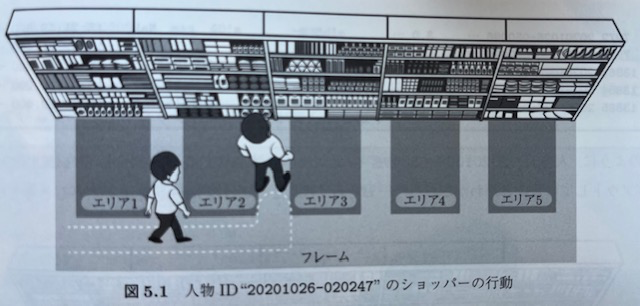

### Examining shoppers who entered into some areas multiple times

In [57]:
import collections

In [58]:
count = collections.Counter(df_et2['customer_id'])
count

Counter({'20201026-010001': 1,
         '20201026-010003': 1,
         '20201026-010005': 1,
         '20201026-010006': 1,
         '20201026-010007': 1,
         '20201026-010008': 2,
         '20201026-010009': 1,
         '20201026-010010': 1,
         '20201026-010011': 1,
         '20201026-010015': 1,
         '20201026-010017': 2,
         '20201026-010019': 1,
         '20201026-010020': 4,
         '20201026-010021': 1,
         '20201026-010024': 1,
         '20201026-010026': 1,
         '20201026-010027': 1,
         '20201026-010031': 1,
         '20201026-010032': 1,
         '20201026-010033': 4,
         '20201026-010035': 2,
         '20201026-010037': 1,
         '20201026-010038': 1,
         '20201026-010039': 1,
         '20201026-010041': 2,
         '20201026-010043': 1,
         '20201026-010045': 1,
         '20201026-010046': 1,
         '20201026-010048': 4,
         '20201026-010049': 1,
         '20201026-010050': 1,
         '20201026-010051': 1,
        

In [59]:
#checking '20201026-050096': 6,
df[df['customer_id'] == '20201026-050096']

customer_id   event_day store_id          store project_category  \
822    20201026-050096  2020/10/26       10  レインボーマーケット新日本               飲料   
7968   20201026-050096  2020/10/26       10  レインボーマーケット新日本               飲料   
7969   20201026-050096  2020/10/26       10  レインボーマーケット新日本               飲料   
7970   20201026-050096  2020/10/26       10  レインボーマーケット新日本               飲料   
7971   20201026-050096  2020/10/26       10  レインボーマーケット新日本               飲料   
7972   20201026-050096  2020/10/26       10  レインボーマーケット新日本               飲料   
7973   20201026-050096  2020/10/26       10  レインボーマーケット新日本               飲料   
13863  20201026-050096  2020/10/26       10  レインボーマーケット新日本               飲料   
13864  20201026-050096  2020/10/26       10  レインボーマーケット新日本               飲料   
13865  20201026-050096  2020/10/26       10  レインボーマーケット新日本               飲料   

      area_id gender   age age_category event_type product_id   product_name  \
822       nan  woman  30's        Young          1        nan            nan   
7968      5.0  woman  30's        Young          2        nan            nan   
7969      4.0  woman  30's        Young          2        nan            nan   
7970      3.0  woman  30's        Young          2        nan            nan   
7971      1.0  woman  30's        Young          2        nan            nan   
7972      3.0  woman  30's        Young          2        nan            nan   
7973      4.0  woman  30's        Young          2        nan            nan   
13863     nan  woman  30's        Young          3       84.0  ごくごくスポドリ500ml   
13864     nan  woman  30's        Young          3       84.0  ごくごくスポドリ500ml   
13865     nan  woman  30's        Young          3       62.0       楊貴妃500ml   

      company  time_duration num_touch       in_time      out_time buy_flag  
822       nan           85.6       0.0  18:20:59.600  18:22:25.200        0  
7968      nan            7.6       0.0  18:21:00.400  18:21:08.000        0  
7969      nan           15.0       0.0  18:21:08.000  18:21:23.000        0  
7970      nan           10.0       0.0  18:21:23.400  18:21:33.400        0  
7971      nan           11.2       0.0  18:21:36.200  18:21:47.400        0  
7972      nan           17.4       0.0  18:21:49.600  18:22:07.000        0  
7973      nan           22.2       0.0  18:22:01.400  18:22:23.600        0  
13863  クオリティー            0.0       1.0  18:21:19.200           nan        1  
13864  クオリティー            0.0       1.0  18:21:19.200           nan        1  
13865   エターナル            0.0       1.0  18:22:20.400           nan        1

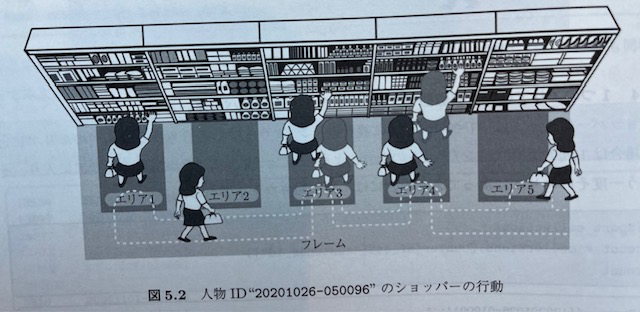

### Checking gender and age

In [60]:
df_customer_attribute = df_et1[['customer_id', 'gender', 'age', 'age_category']].drop_duplicates()

In [61]:
df_customer_attribute.head()

customer_id gender   age age_category
0  20201026-010001  woman  30's        Young
1  20201026-010003    man  50's       Middle
2  20201026-010004    man  10's         Teen
3  20201026-010005  woman  30's        Young
4  20201026-010006    man  40's       Middle

In [62]:
print('# of record with drop_duplicates')
print(df_customer_attribute['customer_id'].nunique())


df_customer_attribute_new = df_et1[['customer_id', 'gender', 'age', 'age_category']]
print('# of record without drop_duplicates')
print(df_customer_attribute_new['customer_id'].nunique())

# of record with drop_duplicates
9116
# of record without drop_duplicates
9116


### Create pie charts (and bar charts) for gender and age

Note:
* Pie chart is easy to call by plt.pie function. But in many occasion, bar chart / stacking bar chart are much better choice in terms of clear data visualization.

In [63]:
gender_counts = df_customer_attribute['gender'].value_counts()

In [64]:
gender_counts

woman    5146
man      3970
Name: gender, dtype: int64

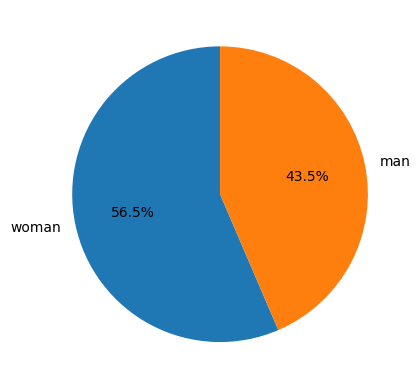

In [65]:
plt.pie(gender_counts, labels=gender_counts.index, autopct='%.1f%%', startangle=90)
plt.show()

In [66]:
age_counts = df_customer_attribute['age'].value_counts().sort_index(ascending=False)
age_counts

Over70's     278
60's        1350
50's        1753
40's        2279
30's        1834
20's         689
10's         606
0's          327
Name: age, dtype: int64

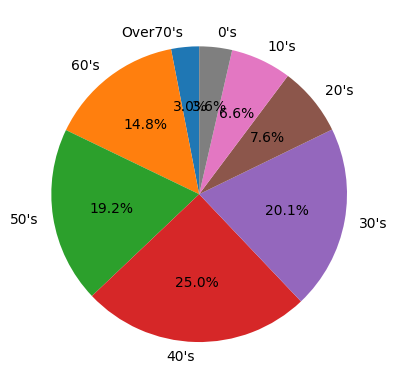

In [67]:
plt.pie(age_counts, labels=age_counts.index, autopct='%.1f%%', startangle=90)
plt.show()

### Create table for contact/purchasing times and num of people by products

In [68]:
#check data type
df_et3.dtypes

customer_id          object
event_day            object
store_id             object
store                object
project_category     object
area_id              object
gender               object
age                  object
age_category         object
event_type           object
product_id           object
product_name         object
company              object
time_duration       float64
num_touch            object
in_time              object
out_time             object
buy_flag             object
dtype: object

In [69]:
#we cannot sum up num_touch with object (str) data type,
#so we need to convert it into float
df_et3['num_touch'] =df_et3['num_touch'].astype(float)
df_et3.dtypes

<ipython-input-69-14f226061055>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_et3['num_touch'] =df_et3['num_touch'].astype(float)


customer_id          object
event_day            object
store_id             object
store                object
project_category     object
area_id              object
gender               object
age                  object
age_category         object
event_type           object
product_id           object
product_name         object
company              object
time_duration       float64
num_touch           float64
in_time              object
out_time             object
buy_flag             object
dtype: object

In [70]:
#contact number by products
ranking_contact_num = df_et3.groupby('product_name')['num_touch'].sum().astype(int).sort_values(ascending=False)
ranking_contact_num

product_name
トラディショナル緑茶525ml     287
ライフパートナー500ml       227
ジャパンスプラッシュ500ml     225
ワイルドティ525ml         207
新緑の丘525ml           189
                   ... 
Cウォーター500ml           7
ザ玉露600ml              6
ウィングパワードリンク250ml      6
つよーい炭酸水490ml          6
激熱苺480ml              3
Name: num_touch, Length: 136, dtype: int64

In [71]:
#num of contact by products
ranking_contact_nop = df_et3.groupby('product_name')['customer_id'].nunique().sort_values(ascending=False)
ranking_contact_nop

product_name
トラディショナル緑茶525ml          181
ライフパートナー500ml            165
ジャパンスプラッシュ500ml          155
ワイルドティ525ml              130
ほっと一息500ml               127
                        ... 
ちょこっとファイバー100ml            5
フルオーガニックコットンウーロン600ml      5
ザ玉露600ml                   5
激熱苺480ml                   3
つよーい炭酸水490ml               3
Name: customer_id, Length: 136, dtype: int64

In [72]:
#purchasing times by products
df_et3_buy = df_et3.loc[(df_et3['buy_flag'] == '1')]
ranking_buy_num = df_et3_buy.groupby('product_name')['num_touch'].sum().astype(int).sort_values(ascending=False)
ranking_buy_num

product_name
トラディショナル緑茶525ml          258
ジャパンスプラッシュ500ml          195
ライフパートナー500ml            184
ワイルドティ525ml              167
ディープグリーン525ml            146
                        ... 
フルオーガニックコットンウーロン600ml      4
激熱苺480ml                   3
オールオブライフ250ml              2
ウィングパワードリンク250ml           2
ちょこっとファイバー100ml            2
Name: num_touch, Length: 136, dtype: int64

In [73]:
#num of purchase by products
ranking_buy_nop = df_et3_buy.groupby('product_name')['customer_id'].nunique().sort_values(ascending=False)
ranking_buy_nop

product_name
トラディショナル緑茶525ml     166
ライフパートナー500ml       146
ジャパンスプラッシュ500ml     139
ディープグリーン525ml       110
ほっと一息500ml          110
                   ... 
激熱苺480ml              3
つよーい炭酸水490ml          3
オールオブライフ250ml         2
ウィングパワードリンク250ml      2
ちょこっとファイバー100ml       2
Name: customer_id, Length: 136, dtype: int64

In [74]:
pd.set_option('display.max_rows',150)

In [75]:
#concat all above together
df_ranking = pd.concat([ranking_contact_num, ranking_contact_nop, ranking_buy_num, ranking_buy_nop], axis=1)
df_ranking.columns = ['contact_times','contact_people','purchase_times','purchase_people']
df_ranking

contact_times  contact_people  purchase_times  \
product_name                                                            
トラディショナル緑茶525ml                   287             181             258   
ライフパートナー500ml                     227             165             184   
ジャパンスプラッシュ500ml                   225             155             195   
ワイルドティ525ml                       207             130             167   
新緑の丘525ml                         189             121             140   
ディープグリーン525ml                     168             119             146   
ほっと一息500ml                        167             127             133   
マイルドラバー600ml                      131              81             106   
雪のしずく550ml                        126              74             109   
コスモファンタジー500ml                    116              72              96   
アフタヌーンレモンティー500ml                 113              86              92   
キッズアップル470ml                      107              45              18   
ボディベター650ml                       105              70              82   
日本の伝統525ml                         98              67              82   
3時のオレ500ml                         95              49              72   
花の癒し500ml                          85              65              71   
クリアブラウン525ml                       83              64              76   
匠の果実500ml                          82              51              62   
シルクの風490ml                         77              58              58   
黒の息吹500ml                          77              59              50   
ベーシックドリンク500ml                     73              60              53   
伝統の技525ml                          73              46              50   
河のせせらぎ500ml                        73              50              60   
うるうるグリーンティー525ml                   72              41              37   
トルマリン600ml                         72              47              63   
ミルクマシマシラテ450ml                     71              60              27   
はじけろオレンジ500ml                      70              46              27   
燃えろイナヅマ600ml                       68              51              46   
優しい君500ml                          67              57              45   
天然水100の炭酸水500ml                    67              47              51   
ビタミン祭り500ml                        67              51              50   
愛の告白500ml                          67              50              54   
コーヒー牛乳500ml                        67              51              46   
ボンボヤージュ500ml                       66              42              51   
カオスの森600ml                         64              43              52   
おいしい時間555ml                        62              39              49   
カフェインレス健康茶630ml                    61              46              41   
スペシャルコーク490ml                      60              34              44   
はじけたグレープ500ml                      58              41              31   
職人の力500ml                          58              40              41   
クリア炭酸500ml                         58              34              50   
楊貴妃500ml                           57              51              42   
岩清水555ml                           55              33              47   
今宵の月500ml                          52              44              39   
森の光600ml                           49              42              38   
スリーシードル500ml                       49              39              42   
ごくごくスポドリ500ml                      48              30              40   
リンゴの本気410ml×24本                    48              38              36   
無農薬健康茶600ml                        47              35              30   
水玉ウォーター500ml                       47              37              33   
ダイナマイト490ml                        46              27              37   
ワイルドオレ500ml                        46              39              29   
サンライズ470ml                         45              30              14   
ビックカップル50

### Create product and company table

In [76]:
#there are duplication in this list
df_company_tmp = df_et3[['product_name','company']]
df_company_tmp

product_name company
13242  トラディショナル緑茶525ml  クオリティー
13243  トラディショナル緑茶525ml  クオリティー
13244        桃の世界410ml  フューチャー
13245        桃の世界410ml  フューチャー
13246        桃の世界410ml  フューチャー
...                ...     ...
4361         新緑の丘525ml  フューチャー
4362     ハイレモンソーダ500ml   ネイティブ
4363         優しい君500ml  ラボラトリー
4364        ほっと一息500ml   エターナル
4365         職人の力500ml  フューチャー

[6907 rows x 2 columns]

In [77]:
#eliminate duplication
df_company_tmp = df_company_tmp[~df_et3.duplicated(subset=['product_name','company'])]
#set product_name as index
df_company_tmp = df_company_tmp.rename(index=df_company_tmp['product_name']).copy()
df_company_tmp.head()

product_name company
トラディショナル緑茶525ml      トラディショナル緑茶525ml  クオリティー
桃の世界410ml                  桃の世界410ml  フューチャー
アフタヌーンレモンティー500ml  アフタヌーンレモンティー500ml   エターナル
クリアブラウン525ml            クリアブラウン525ml  クオリティー
ワイルドオレ500ml              ワイルドオレ500ml  ラボラトリー

In [78]:
#eliminate product_name column
df_company = df_company_tmp.drop('product_name', axis=1)

In [79]:
df_company.head()

company
トラディショナル緑茶525ml    クオリティー
桃の世界410ml          フューチャー
アフタヌーンレモンティー500ml   エターナル
クリアブラウン525ml       クオリティー
ワイルドオレ500ml        ラボラトリー

In [80]:
# concatenate to existing table
df_ranking_new = pd.concat([df_ranking, df_company], axis=1, join='inner')
df_ranking_new

contact_times  contact_people  purchase_times  \
トラディショナル緑茶525ml                   287             181             258   
ライフパートナー500ml                     227             165             184   
ジャパンスプラッシュ500ml                   225             155             195   
ワイルドティ525ml                       207             130             167   
新緑の丘525ml                         189             121             140   
ディープグリーン525ml                     168             119             146   
ほっと一息500ml                        167             127             133   
マイルドラバー600ml                      131              81             106   
雪のしずく550ml                        126              74             109   
コスモファンタジー500ml                    116              72              96   
アフタヌーンレモンティー500ml                 113              86              92   
キッズアップル470ml                      107              45              18   
ボディベター650ml                       105              70              82   
日本の伝統525ml                         98              67              82   
3時のオレ500ml                         95              49              72   
花の癒し500ml                          85              65              71   
クリアブラウン525ml                       83              64              76   
匠の果実500ml                          82              51              62   
シルクの風490ml                         77              58              58   
黒の息吹500ml                          77              59              50   
ベーシックドリンク500ml                     73              60              53   
伝統の技525ml                          73              46              50   
河のせせらぎ500ml                        73              50              60   
うるうるグリーンティー525ml                   72              41              37   
トルマリン600ml                         72              47              63   
ミルクマシマシラテ450ml                     71              60              27   
はじけろオレンジ500ml                      70              46              27   
燃えろイナヅマ600ml                       68              51              46   
優しい君500ml                          67              57              45   
天然水100の炭酸水500ml                    67              47              51   
ビタミン祭り500ml                        67              51              50   
愛の告白500ml                          67              50              54   
コーヒー牛乳500ml                        67              51              46   
ボンボヤージュ500ml                       66              42              51   
カオスの森600ml                         64              43              52   
おいしい時間555ml                        62              39              49   
カフェインレス健康茶630ml                    61              46              41   
スペシャルコーク490ml                      60              34              44   
はじけたグレープ500ml                      58              41              31   
職人の力500ml                          58              40              41   
クリア炭酸500ml                         58              34              50   
楊貴妃500ml                           57              51              42   
岩清水555ml                           55              33              47   
今宵の月500ml                          52              44              39   
森の光600ml                           49              42              38   
スリーシードル500ml                       49              39              42   
ごくごくスポドリ500ml                      48              30              40   
リンゴの本気410ml×24本                    48              38              36   
無農薬健康茶600ml                        47              35              30   
水玉ウォーター500ml                       47              37              33   
ダイナマイト490ml                        46              27              37   
ワイルドオレ500ml                        46              39              29   
サンライズ470ml                         45              30              14   
ビックカップル500ml                       45              29              29   
ぱちぱちグレフル5

In [81]:
#checking whether concat is done appropriately
print(df_ranking.shape)
print(df_ranking_new.shape)
print(df_ranking_new.isnull().sum())

(136, 4)
(136, 5)
contact_times      0
contact_people     0
purchase_times     0
purchase_people    0
company            0
dtype: int64


### Calculate CVR (Conversion Rate)

In [82]:
#calculate cvr
df_ranking_new['CVR'] = df_ranking_new['purchase_people'] / df_ranking_new['contact_people']
df_ranking_new.sort_values('CVR', ascending=False)

contact_times  contact_people  purchase_times  \
激熱苺480ml                            3               3               3   
つよーい炭酸水490ml                        6               3               6   
すっぱいかんきつドリンク400ml                  15              14              15   
パワーオブビースト355ml                     27              16              17   
玄米のおいしいお茶500ml                     20              15              16   
乳酸菌たっぷりレモン水500ml                   22              14              19   
ディープグリーン525ml                     168             119             146   
トラディショナル緑茶525ml                   287             181             258   
マイルドラバー600ml                      131              81             106   
クリアブラウン525ml                       83              64              76   
愛の告白500ml                          67              50              54   
ジャパンスプラッシュ500ml                   225             155             195   
アフタヌーンレモンティー500ml                 113              86              92   
おそば屋さんのお茶500ml                     23              19              19   
花の癒し500ml                          85              65              71   
ナイスペアー555ml                        26              18              24   
ライフパートナー500ml                     227             165             184   
ジンジャーアタック500ml                     29              25              23   
贅沢の極み500ml                         32              25              27   
岩清水555ml                           55              33              47   
雪のしずく550ml                        126              74             109   
3時のオレ500ml                         95              49              72   
天然水100の炭酸水レモン500ml                 30              24              27   
摘みたて茶葉430ml                        23              15              21   
ほっと一息500ml                        167             127             133   
マンダリンショット500ml                     27              22              22   
シルクの風490ml                         77              58              58   
コスモファンタジー500ml                    116              72              96   
まるごとサプリ500ml                       31              21              27   
古のサイダー500ml                        25              21              20   
ハイパーコーヒードリンク500ml                  22              14              14   
クリア炭酸500ml                         58              34              50   
ダイナマイト490ml                        46              27              37   
トルマリン600ml                         72              47              63   
日本の伝統525ml                         98              67              82   
飛び出した檸檬水500ml                      39              33              33   
伝統の技525ml                          73              46              50   
ドラゴンバード525ml                       36              26              28   
ぱちぱちアセロラドリンク500ml                  40              26              31   
スリーシードル500ml                       49              39              42   
ももちゃん380ml                         15              13              12   
おいしい時間555ml                        62              39              49   
朝の雫540ml                           28              19              22   
うつくし檸檬水500ml                       31              25              25   
麦の息吹660ml                          31              25              27   
酸っぱい果実555ml                        24              24              20   
ごくごくスポドリ500ml                      48              30              40   
ビックカップル500ml                       45              29              29   
ビタミン祭り500ml                        67              51              50   
匠の果実500ml                          82              51              62   
ヘルシーなお茶410ml                       26              17              22   
河のせせらぎ500ml                        73              50              60   
テイクオフカロリー500ml                     15              11              12   
玉露水525ml                           34              22              27   
ワイルドティ525

In [83]:
#checking CVR by company

#wrong case
df_ranking_company = df_ranking_new.groupby('company').sum()
df_ranking_company

contact_times  contact_people  purchase_times  purchase_people  \
company                                                                     
かのうハウス                39              33              28               27   
せかいのごはん               11              10               6                6   
イッツ園                 734             500             579              416   
エターナル                772             574             567              461   
オールフロント              152              75              32               32   
カルシウムウェイ              47              37              33               28   
クオリティー              1231             824            1018              692   
ゲーミングファイト             37              25              24               22   
デイリーイースト              34              29              18               16   
トップモード                85              63              55               43   
ネイティブ                521             397             395              313   
フューチャー              1690            1192            1249              930   
モーリーフラフト             148             119              77               70   
ラボラトリー              1198             888             889              680   
レジェンド                 30              24              14               12   
レモン王                 129             112              97               86   
大自然カンパニー              43              36              23               20   
青牛                     6               5               2                2   

                 CVR  
company               
かのうハウス      1.646154  
せかいのごはん     0.600000  
イッツ園        6.409226  
エターナル      11.023418  
オールフロント     0.866667  
カルシウムウェイ    0.756757  
クオリティー     13.825086  
ゲーミングファイト   1.715278  
デイリーイースト    0.551724  
トップモード      3.125641  
ネイティブ       9.415276  
フューチャー     26.219118  
モーリーフラフト    1.178814  
ラボラトリー     19.807435  
レジェンド       0.500000  
レモン王        3.069297  
大自然カンパニー    0.555556  
青牛          0.400000

In [84]:
#correction
df_ranking_company = df_ranking_company.drop('CVR', axis=1)
df_ranking_company['CVR(Total)'] = df_ranking_company['purchase_people'] / df_ranking_company['contact_people']
df_ranking_company['CVR(Average)'] = df_ranking_new.groupby('company').mean()['CVR']
df_ranking_company.sort_values('CVR(Total)', ascending=False)

contact_times  contact_people  purchase_times  purchase_people  \
company                                                                     
ゲーミングファイト             37              25              24               22   
クオリティー              1231             824            1018              692   
イッツ園                 734             500             579              416   
かのうハウス                39              33              28               27   
エターナル                772             574             567              461   
ネイティブ                521             397             395              313   
フューチャー              1690            1192            1249              930   
レモン王                 129             112              97               86   
ラボラトリー              1198             888             889              680   
カルシウムウェイ              47              37              33               28   
トップモード                85              63              55               43   
せかいのごはん               11              10               6                6   
モーリーフラフト             148             119              77               70   
大自然カンパニー              43              36              23               20   
デイリーイースト              34              29              18               16   
レジェンド                 30              24              14               12   
オールフロント              152              75              32               32   
青牛                     6               5               2                2   

           CVR(Total)  CVR(Average)  
company                              
ゲーミングファイト    0.880000      0.857639  
クオリティー       0.839806      0.768060  
イッツ園         0.832000      0.801153  
かのうハウス       0.818182      0.823077  
エターナル        0.803136      0.787387  
ネイティブ        0.788413      0.784606  
フューチャー       0.780201      0.749118  
レモン王         0.767857      0.767324  
ラボラトリー       0.765766      0.761824  
カルシウムウェイ     0.756757      0.756757  
トップモード       0.682540      0.625128  
せかいのごはん      0.600000      0.600000  
モーリーフラフト     0.588235      0.589407  
大自然カンパニー     0.555556      0.555556  
デイリーイースト     0.551724      0.551724  
レジェンド        0.500000      0.500000  
オールフロント      0.426667      0.433333  
青牛           0.400000      0.400000

Note:
* CVR(Total): summing up contact_people and purchase_people by company, then divided by each. It means that it considers num of people.
* CVR(Average): just taking average of CVR for each products in each companies. This means that it does not reflect num of people and take simple average of CVR by each products.


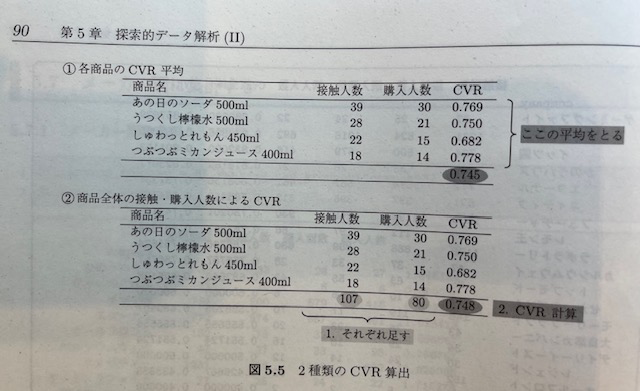

### Depict scatter graph and take correlation matrix

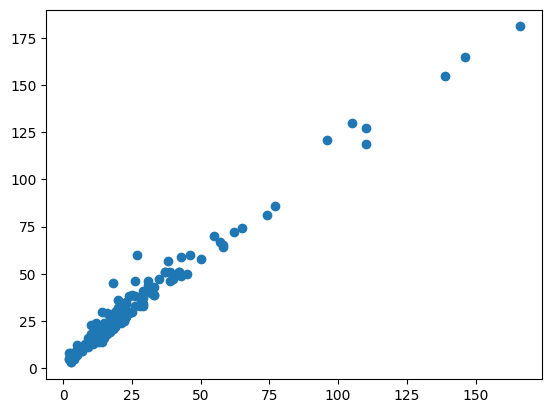

In [85]:
#scatter graph
plt.scatter(df_ranking_new['purchase_people'], df_ranking_new['contact_people'])
plt.show()

In [86]:
#correlation matrix only with pandas
df_ranking_new.corr().style.background_gradient(axis=None)

<ipython-input-86-a06bf4134c2b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_ranking_new.corr().style.background_gradient(axis=None)


In [87]:
#correlation matrix using seaborn
import seaborn as sns

<ipython-input-88-a79e047c107d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_ranking_new.corr(), annot=True, fmt="1.3f")


<Axes: >

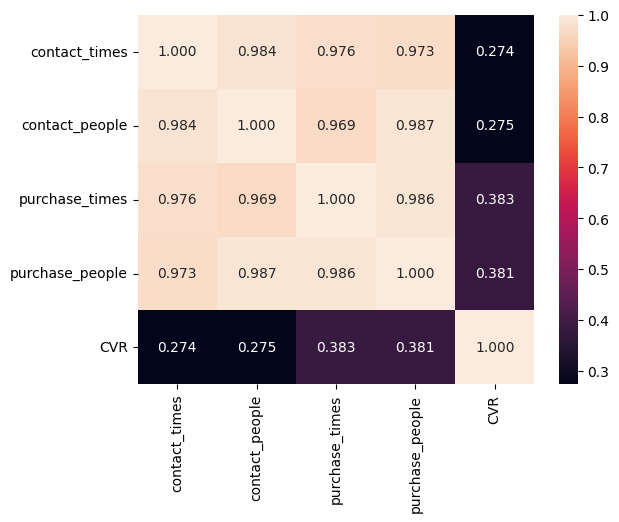

In [88]:
sns.heatmap(df_ranking_new.corr(), annot=True, fmt="1.3f")

## Chapter 6: Hypothesis-verification driven data analysis

### Create shopper attribute list

In [89]:
shopper_attribute_list = df[['customer_id','gender','age','age_category']]
shopper_attribute_list

customer_id gender   age age_category
0     20201026-010001  woman  30's        Young
1     20201026-010003    man  50's       Middle
2     20201026-010004    man  10's         Teen
3     20201026-010005  woman  30's        Young
4     20201026-010006    man  40's       Middle
...               ...    ...   ...          ...
4361  20201101-120049  woman  40's       Middle
4362  20201101-120052    man  20's        Young
4363  20201101-120052    man  20's        Young
4364  20201101-120052    man  20's        Young
4365  20201101-120052    man  20's        Young

[23223 rows x 4 columns]

In [90]:
shopper_attribute_list = shopper_attribute_list.drop_duplicates().set_index('customer_id')
shopper_attribute_list

gender       age age_category
customer_id                                  
20201026-010001  woman      30's        Young
20201026-010003    man      50's       Middle
20201026-010004    man      10's         Teen
20201026-010005  woman      30's        Young
20201026-010006    man      40's       Middle
...                ...       ...          ...
20201101-120046  woman      10's         Teen
20201101-120047    man      40's       Middle
20201101-120049  woman      40's       Middle
20201101-120052    man      20's        Young
20201101-120057  woman  Over70's       Senior

[9116 rows x 3 columns]

### Create shopper's contact number list

In [91]:
df['num_touch'] = df['num_touch'].astype(float)

In [92]:
shopper_contact_list = df.groupby('customer_id')[['num_touch']].sum().astype(int)
shopper_contact_list

num_touch
customer_id               
20201026-010001          2
20201026-010003          3
20201026-010004          0
20201026-010005          1
20201026-010006          2
...                    ...
20201101-120046          0
20201101-120047          1
20201101-120049          1
20201101-120052          4
20201101-120057          0

[9116 rows x 1 columns]

### Create shopprt"s purchase times list

In [93]:
df['buy_flag'] = df['buy_flag'].astype(float)

In [94]:
shopper_buy_list = df.groupby('customer_id')[['buy_flag']].sum().astype(int)
shopper_buy_list

buy_flag
customer_id              
20201026-010001         2
20201026-010003         3
20201026-010004         0
20201026-010005         1
20201026-010006         2
...                   ...
20201101-120046         0
20201101-120047         1
20201101-120049         1
20201101-120052         4
20201101-120057         0

[9116 rows x 1 columns]

### Create shopprt's time_duration list

In [95]:
shopper_time_duration_list = df_et1[['customer_id','time_duration']].set_index('customer_id')
shopper_time_duration_list

time_duration
customer_id                   
20201026-010001            6.2
20201026-010003           14.2
20201026-010004           21.0
20201026-010005           19.2
20201026-010006           19.8
...                        ...
20201101-120046           13.6
20201101-120047            4.6
20201101-120049           11.2
20201101-120052           28.6
20201101-120057           13.8

[9116 rows x 1 columns]

### Concatenate lists above

In [96]:
df_shopper = pd.concat([shopper_attribute_list, shopper_contact_list, shopper_buy_list,
                        shopper_time_duration_list], axis=1)
df_shopper

gender       age age_category  num_touch  buy_flag  \
customer_id                                                          
20201026-010001  woman      30's        Young          2         2   
20201026-010003    man      50's       Middle          3         3   
20201026-010004    man      10's         Teen          0         0   
20201026-010005  woman      30's        Young          1         1   
20201026-010006    man      40's       Middle          2         2   
...                ...       ...          ...        ...       ...   
20201101-120046  woman      10's         Teen          0         0   
20201101-120047    man      40's       Middle          1         1   
20201101-120049  woman      40's       Middle          1         1   
20201101-120052    man      20's        Young          4         4   
20201101-120057  woman  Over70's       Senior          0         0   

                 time_duration  
customer_id                     
20201026-010001            6.2  
20201026-010003           14.2  
20201026-010004           21.0  
20201026-010005           19.2  
20201026-010006           19.8  
...                        ...  
20201101-120046           13.6  
20201101-120047            4.6  
20201101-120049           11.2  
20201101-120052           28.6  
20201101-120057           13.8  

[9116 rows x 6 columns]

### Verification of hypothesis 1: Woman may check many products with many times before purchase?

It looks that this hypothesis may not be true by given data. Mean is woman < man.

In [97]:
df_shopper.groupby('gender')['num_touch'].describe()

count      mean       std  min  25%  50%  75%   max
gender                                                      
man     3970.0  0.802267  1.474549  0.0  0.0  0.0  1.0  15.0
woman   5146.0  0.723280  1.570993  0.0  0.0  0.0  1.0  25.0

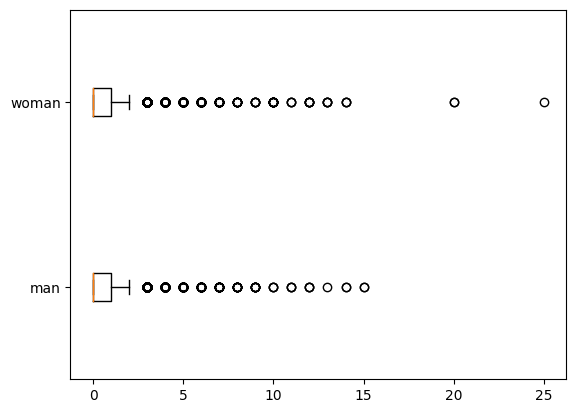

In [98]:
df_man = df_shopper[df_shopper['gender'] == 'man']
df_woman = df_shopper[df_shopper['gender'] == 'woman']

data = (df_man['num_touch'], df_woman['num_touch'])
plt.boxplot(data, labels=['man','woman'], vert=False)
plt.show()

### Verification of hypothesis 2: Woman may check longer time before purchase?

It looks that woman actually checks longer time before purchase. Both mean and median are woman > man.

In [99]:
df_shopper.groupby('gender')['time_duration'].describe()

count       mean        std  min   25%   50%   75%    max
gender                                                            
man     3970.0  33.750025  35.937931  0.6  11.8  21.8  42.4  370.2
woman   5146.0  37.441974  36.765679  0.0  13.8  25.7  47.8  421.6

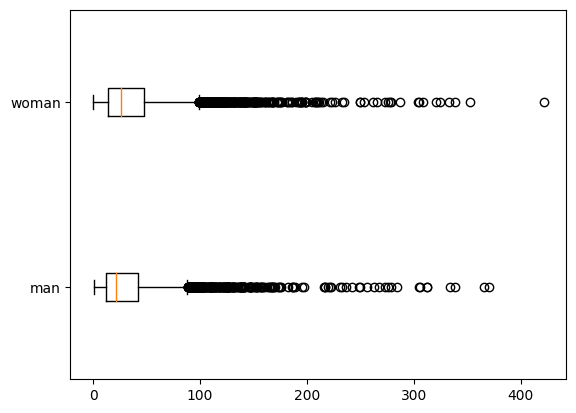

In [100]:
data = (df_man['time_duration'], df_woman['time_duration'])
plt.boxplot(data, labels=['man','woman'], vert=False)
plt.show()

### Statistical ttest for hypothesis 2

We reject null hypothesis as shown below.Difference of time_duration between man and woman is statistically significant.

In [101]:
import scipy.stats as st

In [102]:
xa = df_shopper[df_shopper['gender'] == 'man']['time_duration']
xb = df_shopper[df_shopper['gender'] == 'woman']['time_duration']
t, p = st.ttest_ind(xa, xb, equal_var=False)
print('t-value=', t)
print('p-value=', p)

t-value= -4.8146895941604155
p-value= 1.4993628244769003e-06


### Hypothesis 3: Young customers tend to purchase products without comparing many products

* Excluding teen agers, mean of num_touch increases as generation becomes older.
* About 10's both mean and std of num_touch are high. It looks that 10's can be separated by customers without comparison and customers with touching/comparing many times.

In [103]:
df_shopper.groupby('age')['num_touch'].describe()

count      mean       std  min  25%  50%  75%   max
age                                                           
0's        327.0  0.577982  1.317370  0.0  0.0  0.0  1.0   8.0
10's       606.0  0.882838  1.714634  0.0  0.0  0.0  1.0  25.0
20's       689.0  0.698113  1.241955  0.0  0.0  0.0  1.0  13.0
30's      1834.0  0.705016  1.333486  0.0  0.0  0.0  1.0  14.0
40's      2279.0  0.756033  1.548223  0.0  0.0  0.0  1.0  14.0
50's      1753.0  0.787222  1.652042  0.0  0.0  0.0  1.0  20.0
60's      1350.0  0.801481  1.650931  0.0  0.0  0.0  1.0  13.0
Over70's   278.0  0.805755  1.618386  0.0  0.0  0.0  1.0  11.0

In [104]:
num_touch_mean_byage = df_shopper.groupby('age')['num_touch'].mean()

In [105]:
num_touch_mean_byage

age
0's         0.577982
10's        0.882838
20's        0.698113
30's        0.705016
40's        0.756033
50's        0.787222
60's        0.801481
Over70's    0.805755
Name: num_touch, dtype: float64

<BarContainer object of 8 artists>

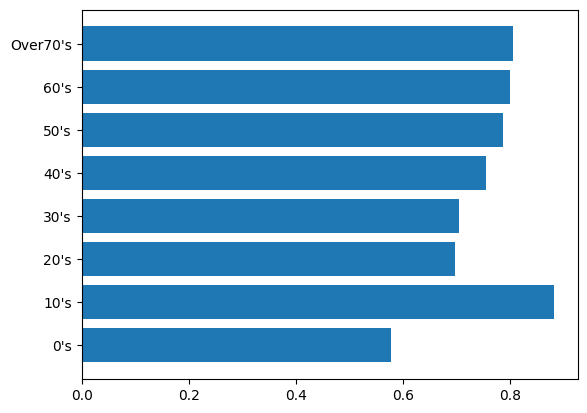

In [106]:
plt.barh(num_touch_mean_byage.index, num_touch_mean_byage)

### Hypothesis 4: products of 雪のしずく and 岩清水 are often compared each other as similar products

* Customers who purchased 雪のしずく checked ジャパンスプラッシュ500ml by 18 times and 岩清水555ml with 4 times. 岩清水 is certainly competitor of 雪のしずく, but ジャパンスプラッシュ can be more direct competitor of 雪のしずく.

In [107]:
#extract customer_id who purchased 雪のしずく550ml
list_tdr = df_et3[df_et3['product_name'] == '雪のしずく550ml']['customer_id'].drop_duplicates()
list_tdr

13254    20201026-010009
13256    20201026-010010
13312    20201026-010058
13415    20201026-010198
13473    20201026-020114
13578    20201026-030010
13786    20201026-040160
13880    20201026-050119
13946    20201026-060018
14057    20201026-060265
14074    20201027-010004
14079    20201027-010008
14083    20201027-010012
14128    20201027-010071
14174    20201027-010122
14401    20201027-020267
14444    20201027-020325
14447    20201027-030008
14457    20201027-030026
14659    20201027-040036
14875    20201027-060004
14948    20201027-060178
15012    20201027-060287
15041    20201028-010012
15078    20201028-010087
15083    20201028-010094
15514    20201028-040119
15517    20201028-040122
15761    20201028-060188
15803    20201028-070041
15841    20201028-070101
15904    20201028-070202
15905    20201028-070203
15933    20201029-010010
15984    20201029-010051
15986    20201029-010053
16079    20201029-020010
16235    20201029-030105
16297    20201029-030196
16452    20201029-050083


In [108]:
#Create customer list of the purchaser of 雪のしずく550ml
df_tmp = df_et3[df_et3['customer_id'].isin(list_tdr)]
df_tmp.head()

customer_id   event_day store_id          store project_category  \
13254  20201026-010009  2020/10/26       10  レインボーマーケット新日本               飲料   
13255  20201026-010010  2020/10/26       10  レインボーマーケット新日本               飲料   
13256  20201026-010010  2020/10/26       10  レインボーマーケット新日本               飲料   
13311  20201026-010058  2020/10/26       10  レインボーマーケット新日本               飲料   
13312  20201026-010058  2020/10/26       10  レインボーマーケット新日本               飲料   

      area_id gender   age age_category event_type product_id  \
13254     nan    man  50's       Middle          3        5.0   
13255     nan    man  30's        Young          3        4.0   
13256     nan    man  30's        Young          3        5.0   
13311     nan  woman  60's       Senior          3        4.0   
13312     nan  woman  60's       Senior          3        5.0   

          product_name company  time_duration  num_touch       in_time  \
13254       雪のしずく550ml  ラボラトリー            0.0        1.0  08:11:00.200   
13255  ジャパンスプラッシュ500ml  クオリティー            0.0        1.0  08:11:21.400   
13256       雪のしずく550ml  ラボラトリー            0.0        1.0  08:11:24.200   
13311  ジャパンスプラッシュ500ml  クオリティー            0.0        1.0  08:56:27.200   
13312       雪のしずく550ml  ラボラトリー            0.0        1.0  08:56:28.200   

      out_time buy_flag  
13254      nan        1  
13255      nan        1  
13256      nan        1  
13311      nan        0  
13312      nan        0

In [109]:
#Then, extract product_name counts, such that we can see the list of product_name with which the purchasers of 雪のしずく550ml
#check many times.
df_tmp['product_name'].value_counts()

雪のしずく550ml          126
ジャパンスプラッシュ500ml      18
岩清水555ml              4
日本の伝統525ml            3
ウェットスポーツ500ml         3
天然水100の炭酸水500ml       3
朝の雫540ml              3
カオスの森600ml            3
スリーシードル500ml          2
ドラゴンバード525ml          2
伝統の技525ml             2
無農薬健康茶600ml           2
ディープグリーン525ml         2
コーヒー牛乳500ml           2
マイルドラバー600ml          1
しゅわしゅわ檸檬ライム470ml      1
パワーオブビースト355ml        1
おいしい時間555ml           1
ヘルシーなお茶410ml          1
健康の国500ml             1
柑橘フレッシュ410ml          1
贅沢乳酸菌ドリンク500ml        1
桃の世界410ml             1
強烈スマッシュ500ml          1
酸っぱい果実555ml           1
はじけたグレープ500ml         1
あの日のソーダ500ml          1
つぶつぶミカンジュース400ml      1
ジンジャーアタック500ml        1
トルマリン600ml            1
ワイルドオレ500ml           1
おいしい新茶470ml           1
優しい君500ml             1
森の光600ml              1
Name: product_name, dtype: int64

### Hypothesis 5: Products which can be touched / purchased can vary by time range (morning, afternoon, night, etc)

* In the morning and evening, green tea is good-selling product, while in 10am-14pm, apple juice for kids and sparkling dring are sold well.

In [110]:
df_et3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6907 entries, 13242 to 4365
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       6907 non-null   object 
 1   event_day         6907 non-null   object 
 2   store_id          6907 non-null   object 
 3   store             6907 non-null   object 
 4   project_category  6907 non-null   object 
 5   area_id           6907 non-null   object 
 6   gender            6907 non-null   object 
 7   age               6907 non-null   object 
 8   age_category      6907 non-null   object 
 9   event_type        6907 non-null   object 
 10  product_id        6907 non-null   object 
 11  product_name      6907 non-null   object 
 12  company           6907 non-null   object 
 13  time_duration     6907 non-null   float64
 14  num_touch         6907 non-null   float64
 15  in_time           6907 non-null   object 
 16  out_time          6907 non-null   obje

In [111]:
df_tmp = df_et3.copy()
df_tmp['in_time'] = pd.to_datetime(df_tmp['in_time'])
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6907 entries, 13242 to 4365
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       6907 non-null   object        
 1   event_day         6907 non-null   object        
 2   store_id          6907 non-null   object        
 3   store             6907 non-null   object        
 4   project_category  6907 non-null   object        
 5   area_id           6907 non-null   object        
 6   gender            6907 non-null   object        
 7   age               6907 non-null   object        
 8   age_category      6907 non-null   object        
 9   event_type        6907 non-null   object        
 10  product_id        6907 non-null   object        
 11  product_name      6907 non-null   object        
 12  company           6907 non-null   object        
 13  time_duration     6907 non-null   float64       
 14  num_touch         69

In [112]:
df_tmp['hour'] = df_tmp['in_time'].dt.strftime('%H')
df_tmp.head(5)

customer_id   event_day store_id          store project_category  \
13242  20201026-010001  2020/10/26       10  レインボーマーケット新日本               飲料   
13243  20201026-010001  2020/10/26       10  レインボーマーケット新日本               飲料   
13244  20201026-010003  2020/10/26       10  レインボーマーケット新日本               飲料   
13245  20201026-010003  2020/10/26       10  レインボーマーケット新日本               飲料   
13246  20201026-010003  2020/10/26       10  レインボーマーケット新日本               飲料   

      area_id gender   age age_category event_type product_id  \
13242     nan  woman  30's        Young          3        1.0   
13243     nan  woman  30's        Young          3        1.0   
13244     nan    man  50's       Middle          3       42.0   
13245     nan    man  50's       Middle          3       42.0   
13246     nan    man  50's       Middle          3       42.0   

          product_name company  time_duration  num_touch  \
13242  トラディショナル緑茶525ml  クオリティー            0.0        1.0   
13243  トラディショナル緑茶525ml  クオリティー            0.0        1.0   
13244        桃の世界410ml  フューチャー            0.0        1.0   
13245        桃の世界410ml  フューチャー            0.0        1.0   
13246        桃の世界410ml  フューチャー            0.0        1.0   

                      in_time out_time buy_flag hour  
13242 2023-08-07 08:01:51.400      nan        1   08  
13243 2023-08-07 08:01:53.600      nan        1   08  
13244 2023-08-07 08:03:00.400      nan        1   08  
13245 2023-08-07 08:03:00.400      nan        1   08  
13246 2023-08-07 08:03:03.800      nan        1   08

In [113]:
df_tmp.groupby('hour')['product_name'].describe()

count unique                top freq
hour                                     
08     359     81    トラディショナル緑茶525ml   36
09     394     97  アフタヌーンレモンティー500ml   19
10     430    106    ジャパンスプラッシュ500ml   30
11     582    118       キッズアップル470ml   36
12     492    103        ワイルドティ525ml   24
13     449    109      ライフパートナー500ml   22
14     548    113    ジャパンスプラッシュ500ml   27
15     648    112    トラディショナル緑茶525ml   44
16     645    125      ライフパートナー500ml   25
17     578    120    トラディショナル緑茶525ml   27
18     674    119      ライフパートナー500ml   31
19     510    115    トラディショナル緑茶525ml   26
20     448    109    トラディショナル緑茶525ml   21
21     150     64    トラディショナル緑茶525ml    9

## Chapter 8: Praparation of modeling

Note: Chapter 7 is about presentation, such that there is not any python coding part.

### data download and dataframe preparation

In [114]:
#read csv data of october and november again
gi_train_mm10_df = pd.read_csv("./jissen-marketing/gi_train_mm10.csv")
gi_train_mm11_df = pd.read_csv("./jissen-marketing/gi_train_mm11.csv")

#concatenate october and november data, then extract not NaN data for customer_id
gi_train_df = pd.concat([gi_train_mm10_df, gi_train_mm11_df], axis=0)
pp_gi_train_df = gi_train_df[gi_train_df['customer_id'].notna()].copy()

#create data frame by event_type (et1,2,3)
pp_gi_train_df_et1 = pp_gi_train_df[pp_gi_train_df['event_type'] == 1]
pp_gi_train_df_et2 = pp_gi_train_df[pp_gi_train_df['event_type'] == 2]
pp_gi_train_df_et3 = pp_gi_train_df[pp_gi_train_df['event_type'] == 3]

In [115]:
#extract touched/bought customer_id list without duplication
contact_list = pp_gi_train_df_et3['customer_id'].drop_duplicates()
contact_list

13242    20201026-010001
13244    20201026-010003
13247    20201026-010005
13248    20201026-010006
13250    20201026-010007
              ...       
4355     20201101-120041
4359     20201101-120043
4360     20201101-120047
4361     20201101-120049
4362     20201101-120052
Name: customer_id, Length: 3312, dtype: object

In [116]:
#extract list of event_type=1 (frame-in) customer_id within purchased customers
pp_gi_train_df_et1_rev = pp_gi_train_df_et1[pp_gi_train_df_et1['customer_id'].isin(contact_list)]
pp_gi_train_df_et1_rev.head()

customer_id   event_day  store_id          store project_category  \
0  20201026-010001  2020/10/26        10  レインボーマーケット新日本               飲料   
1  20201026-010003  2020/10/26        10  レインボーマーケット新日本               飲料   
3  20201026-010005  2020/10/26        10  レインボーマーケット新日本               飲料   
4  20201026-010006  2020/10/26        10  レインボーマーケット新日本               飲料   
5  20201026-010007  2020/10/26        10  レインボーマーケット新日本               飲料   

   area_id gender   age age_category  event_type  product_id product_name  \
0      NaN  woman  30's        Young           1         NaN          NaN   
1      NaN    man  50's       Middle           1         NaN          NaN   
3      NaN  woman  30's        Young           1         NaN          NaN   
4      NaN    man  40's       Middle           1         NaN          NaN   
5      NaN    man  30's        Young           1         NaN          NaN   

  company  time_duration  num_touch       in_time      out_time  buy_flag  
0     NaN            6.2        0.0  08:01:50.200  08:01:56.400         0  
1     NaN           14.2        0.0  08:02:57.800  08:03:12.000         0  
3     NaN           19.2        0.0  08:07:06.000  08:07:25.200         0  
4     NaN           19.8        0.0  08:07:13.000  08:07:32.800         0  
5     NaN           78.6        0.0  08:10:19.200  08:11:37.800         0

In [117]:
#extract list of event_type=2 (area-in) customer_id within purchased customers
pp_gi_train_df_et2_rev = pp_gi_train_df_et2[pp_gi_train_df_et2['customer_id'].isin(contact_list)]
pp_gi_train_df_et2_rev.head()

customer_id   event_day  store_id          store project_category  \
7385  20201026-010001  2020/10/26        10  レインボーマーケット新日本               飲料   
7386  20201026-010003  2020/10/26        10  レインボーマーケット新日本               飲料   
7387  20201026-010005  2020/10/26        10  レインボーマーケット新日本               飲料   
7388  20201026-010006  2020/10/26        10  レインボーマーケット新日本               飲料   
7389  20201026-010007  2020/10/26        10  レインボーマーケット新日本               飲料   

      area_id gender   age age_category  event_type  product_id product_name  \
7385      1.0  woman  30's        Young           2         NaN          NaN   
7386      1.0    man  50's       Middle           2         NaN          NaN   
7387      1.0  woman  30's        Young           2         NaN          NaN   
7388      1.0    man  40's       Middle           2         NaN          NaN   
7389      2.0    man  30's        Young           2         NaN          NaN   

     company  time_duration  num_touch       in_time      out_time  buy_flag  
7385     NaN            6.2        0.0  08:01:50.200  08:01:56.400         0  
7386     NaN           14.0        0.0  08:02:58.000  08:03:12.000         0  
7387     NaN            4.8        0.0  08:07:13.000  08:07:17.800         0  
7388     NaN            7.2        0.0  08:07:19.800  08:07:27.000         0  
7389     NaN           44.0        0.0  08:10:31.800  08:11:15.800         0

### Creating explanation variables and target variable for modeling

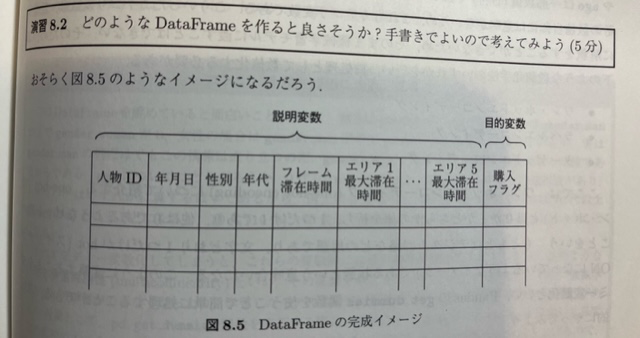

In [118]:
output_df = pp_gi_train_df_et1_rev[['customer_id','event_day','gender','age','time_duration']].copy()
output_df

customer_id   event_day gender   age  time_duration
0     20201026-010001  2020/10/26  woman  30's            6.2
1     20201026-010003  2020/10/26    man  50's           14.2
3     20201026-010005  2020/10/26  woman  30's           19.2
4     20201026-010006  2020/10/26    man  40's           19.8
5     20201026-010007  2020/10/26    man  30's           78.6
...               ...         ...    ...   ...            ...
1723  20201101-120041   2020/11/1    man  40's           41.0
1725  20201101-120043   2020/11/1  woman  10's           35.2
1727  20201101-120047   2020/11/1    man  40's            4.6
1728  20201101-120049   2020/11/1  woman  40's           11.2
1729  20201101-120052   2020/11/1    man  20's           28.6

[3312 rows x 5 columns]

### Create dummy variables for event_day, gender, and age

In [119]:
#list of categorical variables
cate_cols = ['event_day', 'gender', 'age']
#create dummy variables (one-hot encoding)
#note: with drop_first=True, we can avoid multicolinearity in regression modeling
output_df = pd.get_dummies(data=output_df, columns=cate_cols, drop_first=True)

In [120]:
output_df

customer_id  time_duration  event_day_2020/10/27  \
0     20201026-010001            6.2                     0   
1     20201026-010003           14.2                     0   
3     20201026-010005           19.2                     0   
4     20201026-010006           19.8                     0   
5     20201026-010007           78.6                     0   
...               ...            ...                   ...   
1723  20201101-120041           41.0                     0   
1725  20201101-120043           35.2                     0   
1727  20201101-120047            4.6                     0   
1728  20201101-120049           11.2                     0   
1729  20201101-120052           28.6                     0   

      event_day_2020/10/28  event_day_2020/10/29  event_day_2020/10/30  \
0                        0                     0                     0   
1                        0                     0                     0   
3                        0                     0                     0   
4                        0                     0                     0   
5                        0                     0                     0   
...                    ...                   ...                   ...   
1723                     0                     0                     0   
1725                     0                     0                     0   
1727                     0                     0                     0   
1728                     0                     0                     0   
1729                     0                     0                     0   

      event_day_2020/10/31  event_day_2020/11/1  gender_woman  age_10's  \
0                        0                    0             1         0   
1                        0                    0             0         0   
3                        0                    0             1         0   
4                        0                    0             0         0   
5                        0                    0             0         0   
...                    ...                  ...           ...       ...   
1723                     0                    1             0         0   
1725                     0                    1             1         1   
1727                     0                    1             0         0   
1728                     0                    1             1         0   
1729                     0                    1             0         0   

      age_20's  age_30's  age_40's  age_50's  age_60's  age_Over70's  
0            0         1         0         0         0             0  
1            0         0         0         1         0             0  
3            0         1         0         0         0             0  
4            0         0         1         0         0             0  
5            0         1         0         0         0             0  
...        ...       ...       ...       ...       ...           ...  
1723         0         0         1         0         0             0  
1725         0         0         0         0         0             0  
1727         0         0         1         0         0             0  
1728         0         0         1         0         0             0  
1729         1         0         0         0         0             0  

[3312 rows x 16 columns]

### Calculate maximum staying time in each areas

In [121]:
area_id_list = sorted(pp_gi_train_df_et2_rev['area_id'].astype(int).unique().tolist())
area_id_list

[1, 2, 3, 4, 5]

In [122]:
#list to add time_duration related columns in area
area_time_duration_cols = []

#For loop for each area (1,2,3,4,5)
for tmp_area_id in area_id_list:
  #obtain time_duration
  #(there are multiple records in customer_id)
  tmp_area_duration_df = pp_gi_train_df_et2_rev[pp_gi_train_df_et2_rev['area_id'] == tmp_area_id][['customer_id','time_duration']]
  #obtain maximum value of time duration by each customer_id
  tmp_area_duration_df = tmp_area_duration_df.groupby(by=['customer_id']).max().reset_index(drop=False)

  #set column name
  tmp_area_max_time_duration_col = f"area{tmp_area_id}_max_time_duration"
  area_time_duration_cols += [tmp_area_max_time_duration_col]
  tmp_area_duration_df = tmp_area_duration_df.rename(columns={"time_duration": tmp_area_max_time_duration_col})

  #merge to output_df
  output_df = pd.merge(output_df, tmp_area_duration_df, on=['customer_id'], how='left')


In [123]:
output_df

customer_id  time_duration  event_day_2020/10/27  \
0     20201026-010001            6.2                     0   
1     20201026-010003           14.2                     0   
2     20201026-010005           19.2                     0   
3     20201026-010006           19.8                     0   
4     20201026-010007           78.6                     0   
...               ...            ...                   ...   
3307  20201101-120041           41.0                     0   
3308  20201101-120043           35.2                     0   
3309  20201101-120047            4.6                     0   
3310  20201101-120049           11.2                     0   
3311  20201101-120052           28.6                     0   

      event_day_2020/10/28  event_day_2020/10/29  event_day_2020/10/30  \
0                        0                     0                     0   
1                        0                     0                     0   
2                        0                     0                     0   
3                        0                     0                     0   
4                        0                     0                     0   
...                    ...                   ...                   ...   
3307                     0                     0                     0   
3308                     0                     0                     0   
3309                     0                     0                     0   
3310                     0                     0                     0   
3311                     0                     0                     0   

      event_day_2020/10/31  event_day_2020/11/1  gender_woman  age_10's  ...  \
0                        0                    0             1         0  ...   
1                        0                    0             0         0  ...   
2                        0                    0             1         0  ...   
3                        0                    0             0         0  ...   
4                        0                    0             0         0  ...   
...                    ...                  ...           ...       ...  ...   
3307                     0                    1             0         0  ...   
3308                     0                    1             1         1  ...   
3309                     0                    1             0         0  ...   
3310                     0                    1             1         0  ...   
3311                     0                    1             0         0  ...   

      age_30's  age_40's  age_50's  age_60's  age_Over70's  \
0            1         0         0         0             0   
1            0         0         1         0             0   
2            1         0         0         0             0   
3            0         1         0         0             0   
4            1         0         0         0             0   
...        ...       ...       ...       ...           ...   
3307         0         1         0         0             0   
3308         0         0         0         0             0   
3309         0         1         0         0             0   
3310         0         1         0         0             0   
3311         0         0         0         0             0   

      area1_max_time_duration  area2_max_time_duration  \
0                         6.2                      NaN   
1                        14.0                      NaN   
2                         4.8                      NaN   
3                         7.2                      NaN   
4                         NaN                     44.0   
...                       ...                      ...   
3307                      NaN                      3.6   
3308                      6.6                      NaN   
3309                      NaN                      NaN   
3310                      5.0                      NaN   
3311                      NaN   

### adding target variable (buy_flag)

In [124]:
buy_flag_df = pp_gi_train_df_et3[pp_gi_train_df_et3['buy_flag']==1]\
              .drop_duplicates(subset='customer_id')[['customer_id', 'buy_flag']].copy()
buy_flag_df

customer_id  buy_flag
13242  20201026-010001         1
13244  20201026-010003         1
13247  20201026-010005         1
13248  20201026-010006         1
13250  20201026-010007         1
...                ...       ...
4355   20201101-120041         1
4359   20201101-120043         1
4360   20201101-120047         1
4361   20201101-120049         1
4362   20201101-120052         1

[3020 rows x 2 columns]

In [125]:
#merge buy_flag_df to output_df
output_df = pd.merge(output_df, buy_flag_df, on='customer_id', how='left')
#data cleaning of buy_flag
output_df['buy_flag'] = output_df['buy_flag'].fillna(0)
output_df['buy_flag'] = output_df['buy_flag'].astype(int)
output_df

customer_id  time_duration  event_day_2020/10/27  \
0     20201026-010001            6.2                     0   
1     20201026-010003           14.2                     0   
2     20201026-010005           19.2                     0   
3     20201026-010006           19.8                     0   
4     20201026-010007           78.6                     0   
...               ...            ...                   ...   
3307  20201101-120041           41.0                     0   
3308  20201101-120043           35.2                     0   
3309  20201101-120047            4.6                     0   
3310  20201101-120049           11.2                     0   
3311  20201101-120052           28.6                     0   

      event_day_2020/10/28  event_day_2020/10/29  event_day_2020/10/30  \
0                        0                     0                     0   
1                        0                     0                     0   
2                        0                     0                     0   
3                        0                     0                     0   
4                        0                     0                     0   
...                    ...                   ...                   ...   
3307                     0                     0                     0   
3308                     0                     0                     0   
3309                     0                     0                     0   
3310                     0                     0                     0   
3311                     0                     0                     0   

      event_day_2020/10/31  event_day_2020/11/1  gender_woman  age_10's  ...  \
0                        0                    0             1         0  ...   
1                        0                    0             0         0  ...   
2                        0                    0             1         0  ...   
3                        0                    0             0         0  ...   
4                        0                    0             0         0  ...   
...                    ...                  ...           ...       ...  ...   
3307                     0                    1             0         0  ...   
3308                     0                    1             1         1  ...   
3309                     0                    1             0         0  ...   
3310                     0                    1             1         0  ...   
3311                     0                    1             0         0  ...   

      age_40's  age_50's  age_60's  age_Over70's  area1_max_time_duration  \
0            0         0         0             0                      6.2   
1            0         1         0             0                     14.0   
2            0         0         0             0                      4.8   
3            1         0         0             0                      7.2   
4            0         0         0             0                      NaN   
...        ...       ...       ...           ...                      ...   
3307         1         0         0             0                      NaN   
3308         0         0         0             0                      6.6   
3309         1         0         0             0                      NaN   
3310         1         0         0             0                      5.0   
3311         0         0         0             0                      NaN   

      area2_max_time_duration  area3_max_time_duration  \
0                         NaN                      NaN   
1                         NaN                      NaN   
2                         NaN                      NaN   
3                         NaN                      NaN   
4                        44.0                      NaN   
...                       ...                      ...   
3307                      3.6                     10.6   
3308                      

### Data cleaning of areaX_max_time_duration

In [126]:
#For tree related model, fillna by -1
dtc_pp_gi_train_df = output_df.copy()
for col in area_time_duration_cols:
  dtc_pp_gi_train_df[col] = dtc_pp_gi_train_df[col].fillna(-1)

#For logistic regression model, fillna by 0
lgr_pp_gi_train_df = output_df.copy()
for col in area_time_duration_cols:
  lgr_pp_gi_train_df[col] = lgr_pp_gi_train_df[col].fillna(0)

In [127]:
dtc_pp_gi_train_df

customer_id  time_duration  event_day_2020/10/27  \
0     20201026-010001            6.2                     0   
1     20201026-010003           14.2                     0   
2     20201026-010005           19.2                     0   
3     20201026-010006           19.8                     0   
4     20201026-010007           78.6                     0   
...               ...            ...                   ...   
3307  20201101-120041           41.0                     0   
3308  20201101-120043           35.2                     0   
3309  20201101-120047            4.6                     0   
3310  20201101-120049           11.2                     0   
3311  20201101-120052           28.6                     0   

      event_day_2020/10/28  event_day_2020/10/29  event_day_2020/10/30  \
0                        0                     0                     0   
1                        0                     0                     0   
2                        0                     0                     0   
3                        0                     0                     0   
4                        0                     0                     0   
...                    ...                   ...                   ...   
3307                     0                     0                     0   
3308                     0                     0                     0   
3309                     0                     0                     0   
3310                     0                     0                     0   
3311                     0                     0                     0   

      event_day_2020/10/31  event_day_2020/11/1  gender_woman  age_10's  ...  \
0                        0                    0             1         0  ...   
1                        0                    0             0         0  ...   
2                        0                    0             1         0  ...   
3                        0                    0             0         0  ...   
4                        0                    0             0         0  ...   
...                    ...                  ...           ...       ...  ...   
3307                     0                    1             0         0  ...   
3308                     0                    1             1         1  ...   
3309                     0                    1             0         0  ...   
3310                     0                    1             1         0  ...   
3311                     0                    1             0         0  ...   

      age_40's  age_50's  age_60's  age_Over70's  area1_max_time_duration  \
0            0         0         0             0                      6.2   
1            0         1         0             0                     14.0   
2            0         0         0             0                      4.8   
3            1         0         0             0                      7.2   
4            0         0         0             0                     -1.0   
...        ...       ...       ...           ...                      ...   
3307         1         0         0             0                     -1.0   
3308         0         0         0             0                      6.6   
3309         1         0         0             0                     -1.0   
3310         1         0         0             0                      5.0   
3311         0         0         0             0                     -1.0   

      area2_max_time_duration  area3_max_time_duration  \
0                        -1.0                     -1.0   
1                        -1.0                     -1.0   
2                        -1.0                     -1.0   
3                        -1.0                     -1.0   
4                        44.0                     -1.0   
...                       ...                      ...   
3307                      3.6                     10.6   
3308                     -

In [128]:
lgr_pp_gi_train_df

customer_id  time_duration  event_day_2020/10/27  \
0     20201026-010001            6.2                     0   
1     20201026-010003           14.2                     0   
2     20201026-010005           19.2                     0   
3     20201026-010006           19.8                     0   
4     20201026-010007           78.6                     0   
...               ...            ...                   ...   
3307  20201101-120041           41.0                     0   
3308  20201101-120043           35.2                     0   
3309  20201101-120047            4.6                     0   
3310  20201101-120049           11.2                     0   
3311  20201101-120052           28.6                     0   

      event_day_2020/10/28  event_day_2020/10/29  event_day_2020/10/30  \
0                        0                     0                     0   
1                        0                     0                     0   
2                        0                     0                     0   
3                        0                     0                     0   
4                        0                     0                     0   
...                    ...                   ...                   ...   
3307                     0                     0                     0   
3308                     0                     0                     0   
3309                     0                     0                     0   
3310                     0                     0                     0   
3311                     0                     0                     0   

      event_day_2020/10/31  event_day_2020/11/1  gender_woman  age_10's  ...  \
0                        0                    0             1         0  ...   
1                        0                    0             0         0  ...   
2                        0                    0             1         0  ...   
3                        0                    0             0         0  ...   
4                        0                    0             0         0  ...   
...                    ...                  ...           ...       ...  ...   
3307                     0                    1             0         0  ...   
3308                     0                    1             1         1  ...   
3309                     0                    1             0         0  ...   
3310                     0                    1             1         0  ...   
3311                     0                    1             0         0  ...   

      age_40's  age_50's  age_60's  age_Over70's  area1_max_time_duration  \
0            0         0         0             0                      6.2   
1            0         1         0             0                     14.0   
2            0         0         0             0                      4.8   
3            1         0         0             0                      7.2   
4            0         0         0             0                      0.0   
...        ...       ...       ...           ...                      ...   
3307         1         0         0             0                      0.0   
3308         0         0         0             0                      6.6   
3309         1         0         0             0                      0.0   
3310         1         0         0             0                      5.0   
3311         0         0         0             0                      0.0   

      area2_max_time_duration  area3_max_time_duration  \
0                         0.0                      0.0   
1                         0.0                      0.0   
2                         0.0                      0.0   
3                         0.0                      0.0   
4                        44.0                      0.0   
...                       ...                      ...   
3307                      3.6                     10.6   
3308                      

### Prepare same dataset for test data

In [129]:
#read test data
gi_test_df = pd.read_csv("./jissen-marketing/gi_test.csv")
gi_test_df.head()

customer_id   event_day  store_id          store project_category  \
0  20201026-010002  2020/10/26        10  レインボーマーケット新日本               飲料   
1  20201026-010012  2020/10/26        10  レインボーマーケット新日本               飲料   
2  20201026-010016  2020/10/26        10  レインボーマーケット新日本               飲料   
3  20201026-010018  2020/10/26        10  レインボーマーケット新日本               飲料   
4  20201026-010022  2020/10/26        10  レインボーマーケット新日本               飲料   

   area_id gender   age age_category  event_type  product_id product_name  \
0      NaN    man  50's       Middle           1         NaN          NaN   
1      NaN  woman  20's        Young           1         NaN          NaN   
2      NaN    man  30's        Young           1         NaN          NaN   
3      NaN    man  10's         Teen           1         NaN          NaN   
4      NaN  woman  10's         Teen           1         NaN          NaN   

  company  time_duration  num_touch       in_time      out_time  
0     NaN           13.6        0.0  08:02:43.600  08:02:57.200  
1     NaN           15.2        0.0  08:12:40.600  08:12:55.800  
2     NaN           29.6        0.0  08:17:45.200  08:18:14.800  
3     NaN           23.0        0.0  08:19:33.000  08:19:56.000  
4     NaN            4.4        0.0  08:22:01.600  08:22:06.000

In [130]:
#create data frame by event_type (et1,2,3)
pp_gi_test_df_et1 = gi_test_df[gi_test_df['event_type'] == 1]
pp_gi_test_df_et2 = gi_test_df[gi_test_df['event_type'] == 2]
pp_gi_test_df_et3 = gi_test_df[gi_test_df['event_type'] == 3]

#create output_df
output_df = pp_gi_test_df_et1[['customer_id','event_day','gender','age','time_duration']].copy()

#create dummy variables (one-hot encoding)
#note: with drop_first=True, we can avoid multicolinearity in regression modeling
output_df = pd.get_dummies(data=output_df, columns=cate_cols, drop_first=True)
output_df

customer_id  time_duration  event_day_2020/10/27  \
0     20201026-010002           13.6                     0   
1     20201026-010012           15.2                     0   
2     20201026-010016           29.6                     0   
3     20201026-010018           23.0                     0   
4     20201026-010022            4.4                     0   
...               ...            ...                   ...   
8788  20201101-120051           24.2                     0   
8789  20201101-120053           42.2                     0   
8790  20201101-120054           28.4                     0   
8791  20201101-120055           14.0                     0   
8792  20201101-120056           22.6                     0   

      event_day_2020/10/28  event_day_2020/10/29  event_day_2020/10/30  \
0                        0                     0                     0   
1                        0                     0                     0   
2                        0                     0                     0   
3                        0                     0                     0   
4                        0                     0                     0   
...                    ...                   ...                   ...   
8788                     0                     0                     0   
8789                     0                     0                     0   
8790                     0                     0                     0   
8791                     0                     0                     0   
8792                     0                     0                     0   

      event_day_2020/10/31  event_day_2020/11/1  gender_woman  age_10's  \
0                        0                    0             0         0   
1                        0                    0             1         0   
2                        0                    0             0         0   
3                        0                    0             0         1   
4                        0                    0             1         1   
...                    ...                  ...           ...       ...   
8788                     0                    1             1         0   
8789                     0                    1             0         0   
8790                     0                    1             0         0   
8791                     0                    1             1         0   
8792                     0                    1             1         0   

      age_20's  age_30's  age_40's  age_50's  age_60's  age_Over70's  
0            0         0         0         1         0             0  
1            1         0         0         0         0             0  
2            0         1         0         0         0             0  
3            0         0         0         0         0             0  
4            0         0         0         0         0             0  
...        ...       ...       ...       ...       ...           ...  
8788         0         0         1         0         0             0  
8789         0         1         0         0         0             0  
8790         0         1         0         0         0             0  
8791         0         1         0         0         0             0  
8792         0         1         0         0         0             0  

[2209 rows x 16 columns]

In [131]:
area_time_duration_cols

['area1_max_time_duration',
 'area2_max_time_duration',
 'area3_max_time_duration',
 'area4_max_time_duration',
 'area5_max_time_duration']

In [132]:
#For loop for each area (1,2,3,4,5)
for tmp_area_id in area_id_list:
  #obtain time_duration
  #(there are multiple records in customer_id)
  tmp_area_duration_df = pp_gi_test_df_et2[pp_gi_test_df_et2['area_id'] == tmp_area_id][['customer_id','time_duration']]
  #obtain maximum value of time duration by each customer_id
  tmp_area_duration_df = tmp_area_duration_df.groupby(by=['customer_id']).max().reset_index(drop=False)

  #set column name
  tmp_area_max_time_duration_col = f"area{tmp_area_id}_max_time_duration"
  area_time_duration_cols += [tmp_area_max_time_duration_col]
  tmp_area_duration_df = tmp_area_duration_df.rename(columns={"time_duration": tmp_area_max_time_duration_col})

  #merge to output_df
  output_df = pd.merge(output_df, tmp_area_duration_df, on=['customer_id'], how='left')

In [133]:
output_df

customer_id  time_duration  event_day_2020/10/27  \
0     20201026-010002           13.6                     0   
1     20201026-010012           15.2                     0   
2     20201026-010016           29.6                     0   
3     20201026-010018           23.0                     0   
4     20201026-010022            4.4                     0   
...               ...            ...                   ...   
2204  20201101-120051           24.2                     0   
2205  20201101-120053           42.2                     0   
2206  20201101-120054           28.4                     0   
2207  20201101-120055           14.0                     0   
2208  20201101-120056           22.6                     0   

      event_day_2020/10/28  event_day_2020/10/29  event_day_2020/10/30  \
0                        0                     0                     0   
1                        0                     0                     0   
2                        0                     0                     0   
3                        0                     0                     0   
4                        0                     0                     0   
...                    ...                   ...                   ...   
2204                     0                     0                     0   
2205                     0                     0                     0   
2206                     0                     0                     0   
2207                     0                     0                     0   
2208                     0                     0                     0   

      event_day_2020/10/31  event_day_2020/11/1  gender_woman  age_10's  ...  \
0                        0                    0             0         0  ...   
1                        0                    0             1         0  ...   
2                        0                    0             0         0  ...   
3                        0                    0             0         1  ...   
4                        0                    0             1         1  ...   
...                    ...                  ...           ...       ...  ...   
2204                     0                    1             1         0  ...   
2205                     0                    1             0         0  ...   
2206                     0                    1             0         0  ...   
2207                     0                    1             1         0  ...   
2208                     0                    1             1         0  ...   

      age_30's  age_40's  age_50's  age_60's  age_Over70's  \
0            0         0         1         0             0   
1            0         0         0         0             0   
2            1         0         0         0             0   
3            0         0         0         0             0   
4            0         0         0         0             0   
...        ...       ...       ...       ...           ...   
2204         0         1         0         0             0   
2205         1         0         0         0             0   
2206         1         0         0         0             0   
2207         1         0         0         0             0   
2208         1         0         0         0             0   

      area1_max_time_duration  area2_max_time_duration  \
0                         7.8                      NaN   
1                         3.8                      NaN   
2                         NaN                      NaN   
3                        11.2                      NaN   
4                         NaN                      NaN   
...                       ...                      ...   
2204                      NaN                      NaN   
2205                     29.0                      NaN   
2206                     11.2                      NaN   
2207                      NaN                      NaN   
2208                     15.2   

In [134]:
#For tree related model, fillna by -1
dtc_pp_gi_test_df = output_df.copy()
for col in area_time_duration_cols:
  dtc_pp_gi_test_df[col] = dtc_pp_gi_test_df[col].fillna(-1)

#For logistic regression model, fillna by 0
lgr_pp_gi_test_df = output_df.copy()
for col in area_time_duration_cols:
  lgr_pp_gi_test_df[col] = lgr_pp_gi_test_df[col].fillna(0)

In [135]:
dtc_pp_gi_test_df

customer_id  time_duration  event_day_2020/10/27  \
0     20201026-010002           13.6                     0   
1     20201026-010012           15.2                     0   
2     20201026-010016           29.6                     0   
3     20201026-010018           23.0                     0   
4     20201026-010022            4.4                     0   
...               ...            ...                   ...   
2204  20201101-120051           24.2                     0   
2205  20201101-120053           42.2                     0   
2206  20201101-120054           28.4                     0   
2207  20201101-120055           14.0                     0   
2208  20201101-120056           22.6                     0   

      event_day_2020/10/28  event_day_2020/10/29  event_day_2020/10/30  \
0                        0                     0                     0   
1                        0                     0                     0   
2                        0                     0                     0   
3                        0                     0                     0   
4                        0                     0                     0   
...                    ...                   ...                   ...   
2204                     0                     0                     0   
2205                     0                     0                     0   
2206                     0                     0                     0   
2207                     0                     0                     0   
2208                     0                     0                     0   

      event_day_2020/10/31  event_day_2020/11/1  gender_woman  age_10's  ...  \
0                        0                    0             0         0  ...   
1                        0                    0             1         0  ...   
2                        0                    0             0         0  ...   
3                        0                    0             0         1  ...   
4                        0                    0             1         1  ...   
...                    ...                  ...           ...       ...  ...   
2204                     0                    1             1         0  ...   
2205                     0                    1             0         0  ...   
2206                     0                    1             0         0  ...   
2207                     0                    1             1         0  ...   
2208                     0                    1             1         0  ...   

      age_30's  age_40's  age_50's  age_60's  age_Over70's  \
0            0         0         1         0             0   
1            0         0         0         0             0   
2            1         0         0         0             0   
3            0         0         0         0             0   
4            0         0         0         0             0   
...        ...       ...       ...       ...           ...   
2204         0         1         0         0             0   
2205         1         0         0         0             0   
2206         1         0         0         0             0   
2207         1         0         0         0             0   
2208         1         0         0         0             0   

      area1_max_time_duration  area2_max_time_duration  \
0                         7.8                     -1.0   
1                         3.8                     -1.0   
2                        -1.0                     -1.0   
3                        11.2                     -1.0   
4                        -1.0                     -1.0   
...                       ...                      ...   
2204                     -1.0                     -1.0   
2205                     29.0                     -1.0   
2206                     11.2                     -1.0   
2207                     -1.0                     -1.0   
2208                     15.2   

In [136]:
lgr_pp_gi_test_df

customer_id  time_duration  event_day_2020/10/27  \
0     20201026-010002           13.6                     0   
1     20201026-010012           15.2                     0   
2     20201026-010016           29.6                     0   
3     20201026-010018           23.0                     0   
4     20201026-010022            4.4                     0   
...               ...            ...                   ...   
2204  20201101-120051           24.2                     0   
2205  20201101-120053           42.2                     0   
2206  20201101-120054           28.4                     0   
2207  20201101-120055           14.0                     0   
2208  20201101-120056           22.6                     0   

      event_day_2020/10/28  event_day_2020/10/29  event_day_2020/10/30  \
0                        0                     0                     0   
1                        0                     0                     0   
2                        0                     0                     0   
3                        0                     0                     0   
4                        0                     0                     0   
...                    ...                   ...                   ...   
2204                     0                     0                     0   
2205                     0                     0                     0   
2206                     0                     0                     0   
2207                     0                     0                     0   
2208                     0                     0                     0   

      event_day_2020/10/31  event_day_2020/11/1  gender_woman  age_10's  ...  \
0                        0                    0             0         0  ...   
1                        0                    0             1         0  ...   
2                        0                    0             0         0  ...   
3                        0                    0             0         1  ...   
4                        0                    0             1         1  ...   
...                    ...                  ...           ...       ...  ...   
2204                     0                    1             1         0  ...   
2205                     0                    1             0         0  ...   
2206                     0                    1             0         0  ...   
2207                     0                    1             1         0  ...   
2208                     0                    1             1         0  ...   

      age_30's  age_40's  age_50's  age_60's  age_Over70's  \
0            0         0         1         0             0   
1            0         0         0         0             0   
2            1         0         0         0             0   
3            0         0         0         0             0   
4            0         0         0         0             0   
...        ...       ...       ...       ...           ...   
2204         0         1         0         0             0   
2205         1         0         0         0             0   
2206         1         0         0         0             0   
2207         1         0         0         0             0   
2208         1         0         0         0             0   

      area1_max_time_duration  area2_max_time_duration  \
0                         7.8                      0.0   
1                         3.8                      0.0   
2                         0.0                      0.0   
3                        11.2                      0.0   
4                         0.0                      0.0   
...                       ...                      ...   
2204                      0.0                      0.0   
2205                     29.0                      0.0   
2206                     11.2                      0.0   
2207                      0.0                      0.0   
2208                     15.2   

### Export dataframes to csv and pickle files

In [137]:
#setting file path
dtc_pp_gi_train_df_csv = "./intermediate/dtc_pp_gi_train_df_csv.csv"
dtc_pp_gi_test_df_csv = "./intermediate/dtc_pp_gi_test_df_csv.csv"
lgr_pp_gi_train_df_csv = "./intermediate/lgr_pp_gi_train_df_csv.csv"
lgr_pp_gi_test_df_csv = "./intermediate/lgr_pp_gi_test_df_csv.csv"

#exporting dataframe to csv
dtc_pp_gi_train_df.to_csv(dtc_pp_gi_train_df_csv, encoding="shift-jis")
dtc_pp_gi_test_df.to_csv(dtc_pp_gi_test_df_csv, encoding="shift-jis")
lgr_pp_gi_train_df.to_csv(lgr_pp_gi_train_df_csv, encoding="shift-jis")
lgr_pp_gi_test_df.to_csv(lgr_pp_gi_test_df_csv, encoding="shift-jis")

In [138]:
#saving to pickle file

#converting data into dict
pp_data_dict = {
    "dtc": {"train": dtc_pp_gi_train_df, "test": dtc_pp_gi_test_df},
    "lgr": {"train": lgr_pp_gi_train_df, "test": lgr_pp_gi_test_df}
    }

In [139]:
#setting file path for saving pickle file
pp_data_dict_pkl_fpath = "./intermediate/pp_data_dict_pkl.pkl3"
#using joblib, exporting to pickle file
import joblib
joblib.dump(pp_data_dict, pp_data_dict_pkl_fpath, compress=3)

['./intermediate/pp_data_dict_pkl.pkl3']

## Chapter 10: Decision Tree

Note: In Chapter 9, there is no python code. Chapter 9 explains confusion matrix, AUC, ROC etc

### Import necessary libraries

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, roc_auc_score

### Read pickle file

In [141]:
#pickle file as dictionary
pp_data_dict = joblib.load(pp_data_dict_pkl_fpath)

In [142]:
pp_data_dict

{'dtc': {'train':           customer_id  time_duration  event_day_2020/10/27  \
  0     20201026-010001            6.2                     0   
  1     20201026-010003           14.2                     0   
  2     20201026-010005           19.2                     0   
  3     20201026-010006           19.8                     0   
  4     20201026-010007           78.6                     0   
  ...               ...            ...                   ...   
  3307  20201101-120041           41.0                     0   
  3308  20201101-120043           35.2                     0   
  3309  20201101-120047            4.6                     0   
  3310  20201101-120049           11.2                     0   
  3311  20201101-120052           28.6                     0   
  
        event_day_2020/10/28  event_day_2020/10/29  event_day_2020/10/30  \
  0                        0                     0                     0   
  1                        0                     0           

In [143]:
#read dataframe in dictionary
dtc_train_df = pp_data_dict['dtc']['train']
dtc_test_df = pp_data_dict['dtc']['test']

In [144]:
dtc_train_df.head()

customer_id  time_duration  event_day_2020/10/27  event_day_2020/10/28  \
0  20201026-010001            6.2                     0                     0   
1  20201026-010003           14.2                     0                     0   
2  20201026-010005           19.2                     0                     0   
3  20201026-010006           19.8                     0                     0   
4  20201026-010007           78.6                     0                     0   

   event_day_2020/10/29  event_day_2020/10/30  event_day_2020/10/31  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   event_day_2020/11/1  gender_woman  age_10's  ...  age_40's  age_50's  \
0                    0             1         0  ...         0         0   
1                    0             0         0  ...         0         1   
2                    0             1         0  ...         0         0   
3                    0             0         0  ...         1         0   
4                    0             0         0  ...         0         0   

   age_60's  age_Over70's  area1_max_time_duration  area2_max_time_duration  \
0         0             0                      6.2                     -1.0   
1         0             0                     14.0                     -1.0   
2         0             0                      4.8                     -1.0   
3         0             0                      7.2                     -1.0   
4         0             0                     -1.0                     44.0   

   area3_max_time_duration  area4_max_time_duration  area5_max_time_duration  \
0                     -1.0                     -1.0                     -1.0   
1                     -1.0                     -1.0                     -1.0   
2                     -1.0                     -1.0                     -1.0   
3                     -1.0                     -1.0                     -1.0   
4                     -1.0                     -1.0                     -1.0   

   buy_flag  
0         1  
1         1  
2         1  
3         1  
4         1  

[5 rows x 22 columns]

In [145]:
dtc_test_df.head()

customer_id  time_duration  event_day_2020/10/27  event_day_2020/10/28  \
0  20201026-010002           13.6                     0                     0   
1  20201026-010012           15.2                     0                     0   
2  20201026-010016           29.6                     0                     0   
3  20201026-010018           23.0                     0                     0   
4  20201026-010022            4.4                     0                     0   

   event_day_2020/10/29  event_day_2020/10/30  event_day_2020/10/31  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   event_day_2020/11/1  gender_woman  age_10's  ...  age_30's  age_40's  \
0                    0             0         0  ...         0         0   
1                    0             1         0  ...         0         0   
2                    0             0         0  ...         1         0   
3                    0             0         1  ...         0         0   
4                    0             1         1  ...         0         0   

   age_50's  age_60's  age_Over70's  area1_max_time_duration  \
0         1         0             0                      7.8   
1         0         0             0                      3.8   
2         0         0             0                     -1.0   
3         0         0             0                     11.2   
4         0         0             0                     -1.0   

   area2_max_time_duration  area3_max_time_duration  area4_max_time_duration  \
0                     -1.0                     -1.0                     -1.0   
1                     -1.0                     -1.0                     -1.0   
2                     -1.0                      8.8                     18.2   
3                     -1.0                     -1.0                     -1.0   
4                     -1.0                     -1.0                     -1.0   

   area5_max_time_duration  
0                     -1.0  
1                     -1.0  
2                     -1.0  
3                     -1.0  
4                      2.8  

[5 rows x 21 columns]

### Train - validation split for train data

In [146]:
#setting random_state
rnd_state = 57

Note:
* random state is used to fix random number generation, by which we can assure reproducibility of results based on random number.
* While 57 is used as random state in this book, data scientists and engineers often set random_state = 42 (not 41 nor 9999). There is not much meaning about why it is 42, but if interested, you can refer below websites.

https://qiita.com/ofutonton/items/8cb88b34375bf473e45e
https://en.wikipedia.org/wiki/Phrases_from_The_Hitchhiker%27s_Guide_to_the_Galaxy#The_number_42

In [147]:
dtc_train_train_df, dtc_train_valid_df = train_test_split(dtc_train_df, test_size=0.4,
                                                          random_state=rnd_state, shuffle=True)

In [148]:
dtc_train_df.shape, dtc_train_train_df.shape, dtc_train_valid_df.shape, dtc_test_df.shape

((3312, 22), (1987, 22), (1325, 22), (2209, 21))

### Create decision tree model

In [149]:
#setting target variable
target = 'buy_flag'

#setting features (explanatory variables)
dtc_features = dtc_train_df.columns.tolist()

#excluding customer_id and buy_flag from features
dtc_features.remove('customer_id')
dtc_features.remove('buy_flag')

In [150]:
dtc_features

['time_duration',
 'event_day_2020/10/27',
 'event_day_2020/10/28',
 'event_day_2020/10/29',
 'event_day_2020/10/30',
 'event_day_2020/10/31',
 'event_day_2020/11/1',
 'gender_woman',
 "age_10's",
 "age_20's",
 "age_30's",
 "age_40's",
 "age_50's",
 "age_60's",
 "age_Over70's",
 'area1_max_time_duration',
 'area2_max_time_duration',
 'area3_max_time_duration',
 'area4_max_time_duration',
 'area5_max_time_duration']

In [151]:
#defining model as Decision tree
dtc_clf = dtc(max_depth=3, random_state=rnd_state)

#Make model learning from train data
dtc_clf.fit(dtc_train_train_df[dtc_features], dtc_train_train_df[target])

DecisionTreeClassifier(max_depth=3, random_state=57)

### Make prediction by learned model dtc_clf, using validation data

In [152]:
# predict using validation data
train_valid_proba_y = dtc_clf.predict_proba(dtc_train_valid_df[dtc_features]).T[1]
train_valid_proba_y

array([0.89482612, 0.89482612, 0.96413793, ..., 0.89482612, 0.89482612,
       0.96413793])

In [153]:
dtc_train_valid_df[dtc_features]

time_duration  event_day_2020/10/27  event_day_2020/10/28  \
1117           81.0                     0                     1   
1725           24.4                     0                     0   
1434           13.2                     0                     0   
194             9.8                     0                     0   
3128           31.2                     0                     0   
...             ...                   ...                   ...   
290           132.0                     0                     0   
2313            4.4                     0                     0   
86             70.8                     0                     0   
2798           57.8                     0                     0   
1513           18.4                     0                     0   

      event_day_2020/10/29  event_day_2020/10/30  event_day_2020/10/31  \
1117                     0                     0                     0   
1725                     1                     0                     0   
1434                     1                     0                     0   
194                      0                     0                     0   
3128                     0                     0                     0   
...                    ...                   ...                   ...   
290                      0                     0                     0   
2313                     0                     0                     1   
86                       0                     0                     0   
2798                     0                     0                     0   
1513                     1                     0                     0   

      event_day_2020/11/1  gender_woman  age_10's  age_20's  age_30's  \
1117                    0             1         0         0         1   
1725                    0             0         0         0         0   
1434                    0             1         0         1         0   
194                     0             1         0         0         1   
3128                    1             1         0         0         0   
...                   ...           ...       ...       ...       ...   
290                     0             1         0         0         0   
2313                    0             0         0         0         0   
86                      0             1         0         0         0   
2798                    1             0         0         0         0   
1513                    0             0         0         0         0   

      age_40's  age_50's  age_60's  age_Over70's  area1_max_time_duration  \
1117         0         0         0             0                     55.4   
1725         0         0         1             0                     15.2   
1434         0         0         0             0                     -1.0   
194          0         0         0             0                     -1.0   
3128         0         0         1             0                     -1.0   
...        ...       ...       ...           ...                      ...   
290          0         1         0             0                     91.6   
2313         0         0         0             1                     -1.0   
86           0         0         1             0                     -1.0   
2798         0         1         0             0                     -1.0   
1513         0         0         1             0                     -1.0   

      area2_max_time_duration  area3_max_time_duration  \
1117                     -1.0                     -1.0   
1725                     -1.0                     -1.0   
1434                      4.0                     -1.0   
194                      -1.0                     -1.0   
3128                     10.4                     -1.0   
...                       ...                      ...   
290                      -1.0                     -1.0   
2313                     -1.0                 

### Validation by AUC and accuracy

In [154]:
train_valid_auc_val = roc_auc_score(dtc_train_valid_df[target], train_valid_proba_y)
train_valid_auc_val

0.5870754110809311

In [155]:
#predict target variable using dtc_clf model in validation data
train_valid_pred_y = dtc_clf.predict(dtc_train_valid_df[dtc_features])

#Output accuracy
train_valid_accuracy_val = accuracy_score(dtc_train_valid_df[target], train_valid_pred_y)
train_valid_accuracy_val

0.9147169811320754

### Visualization of decision tree

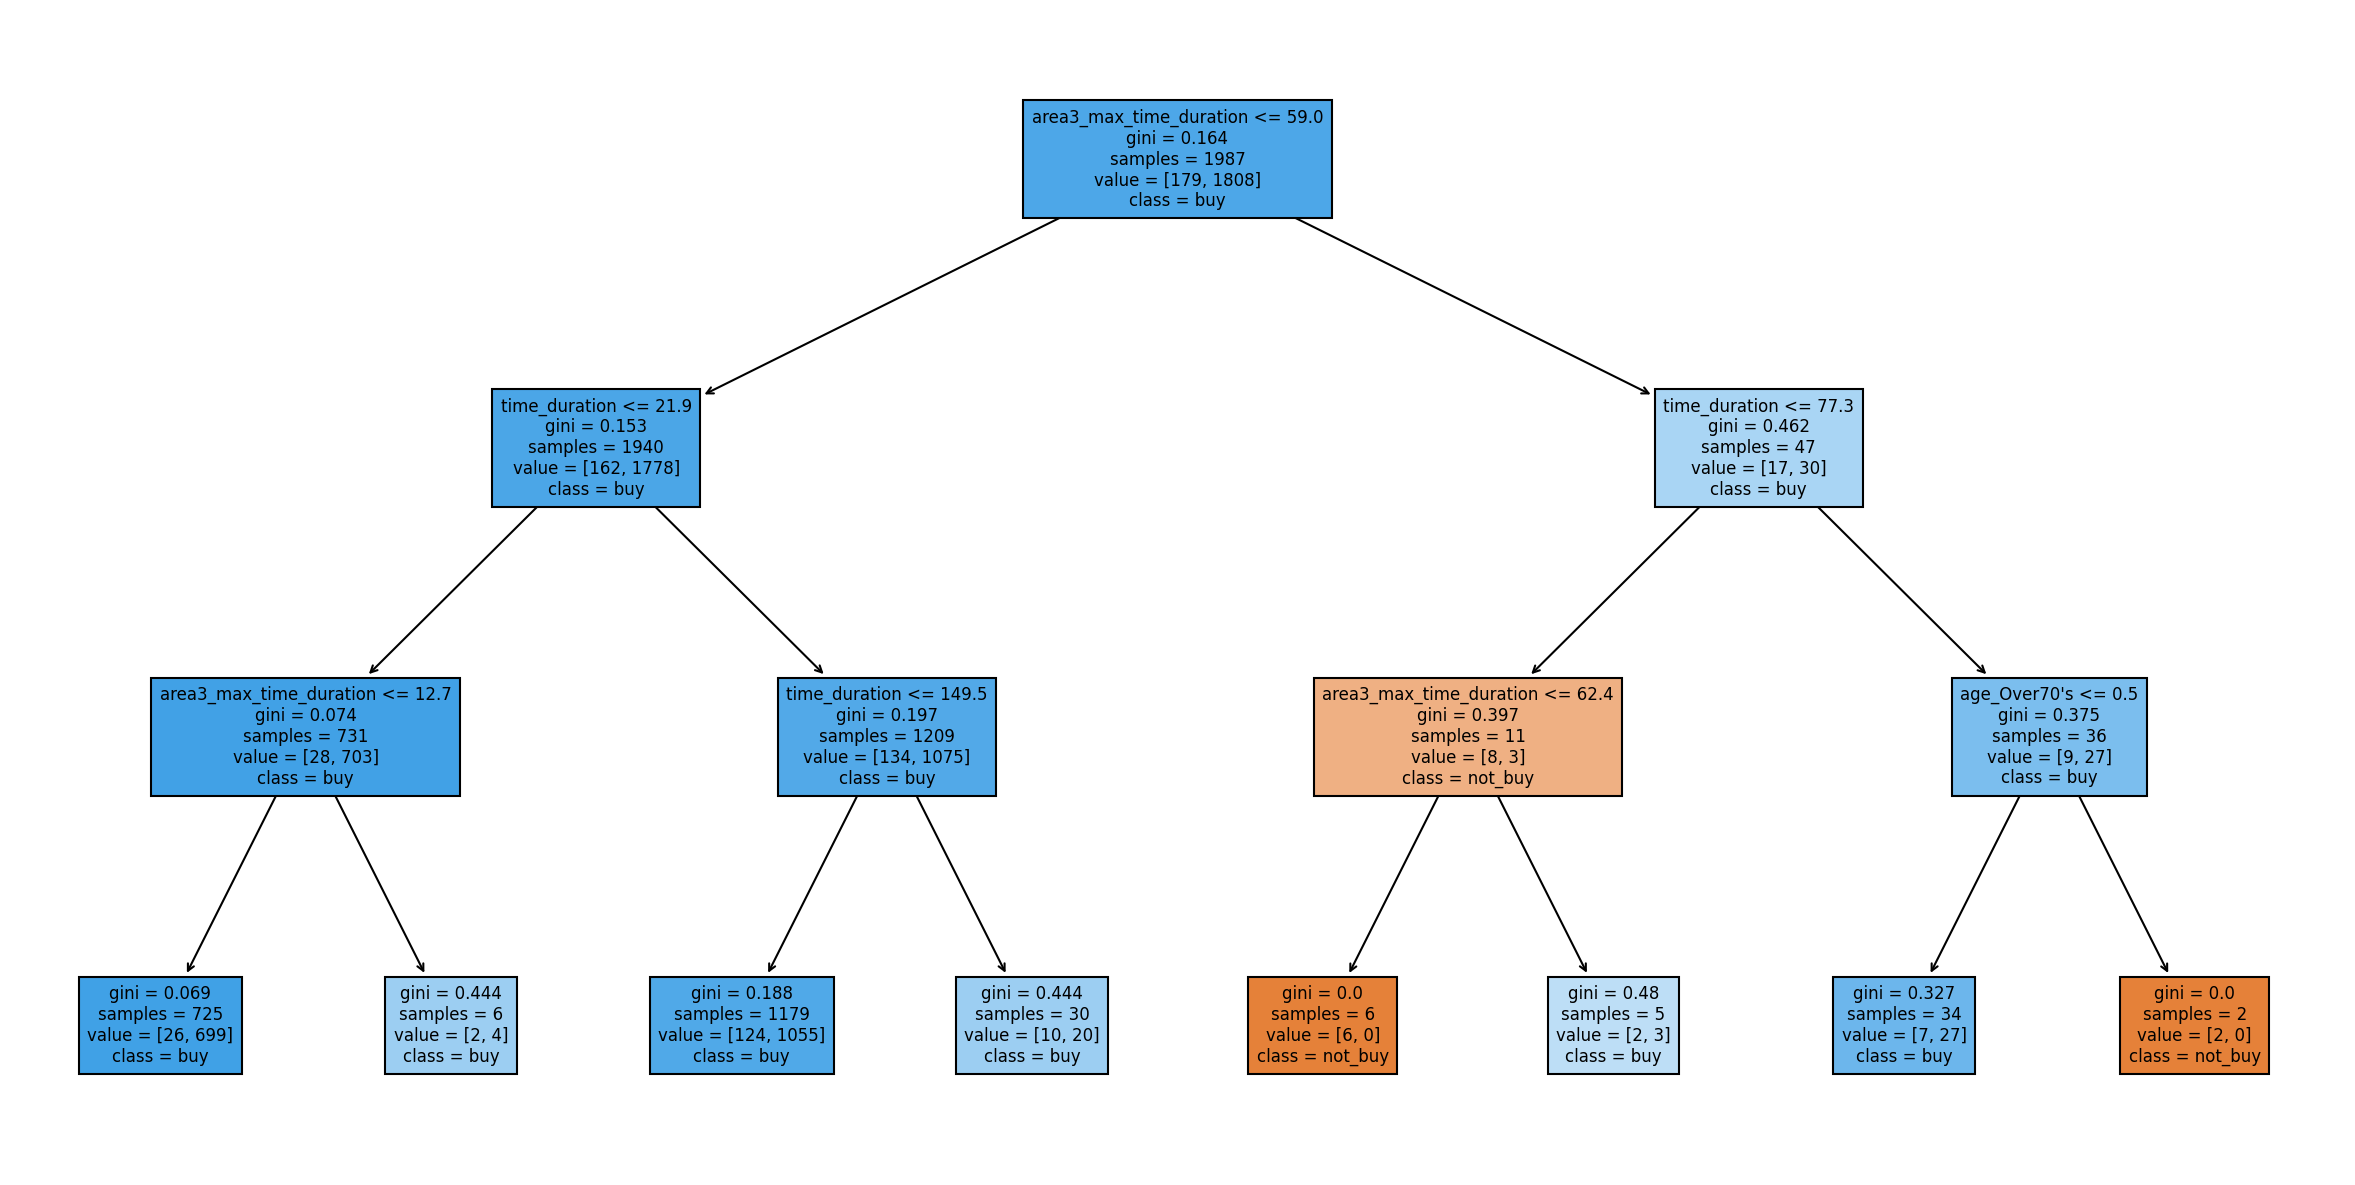

In [156]:
#visualization of decision tree
plt.figure(figsize=(20,10), facecolor='white', dpi=150)
plot_tree(dtc_clf, feature_names=dtc_features, class_names=['not_buy','buy'],
          fontsize=8, filled=True)
plt.show()

### Hyperparameter tuning

In [157]:
#create grid search list
dtc_params_list = [{'max_depth': ii, 'random_state': rnd_state} for ii in np.arange(2,12,1)]
dtc_params_list

[{'max_depth': 2, 'random_state': 57},
 {'max_depth': 3, 'random_state': 57},
 {'max_depth': 4, 'random_state': 57},
 {'max_depth': 5, 'random_state': 57},
 {'max_depth': 6, 'random_state': 57},
 {'max_depth': 7, 'random_state': 57},
 {'max_depth': 8, 'random_state': 57},
 {'max_depth': 9, 'random_state': 57},
 {'max_depth': 10, 'random_state': 57},
 {'max_depth': 11, 'random_state': 57}]

In [158]:
# implement grid search

#list to save the results of grid search
gs_result_list = []

#implement grid search
for params_dict in dtc_params_list:
  #define
  tmp_dtc_clf = dtc(**params_dict)
  #learn by fit
  tmp_dtc_clf.fit(dtc_train_train_df[dtc_features], dtc_train_train_df[target])

  #predict y from learned model for train_train data (0 or 1 by predict)
  train_pred_y = tmp_dtc_clf.predict(dtc_train_train_df[dtc_features])
  #predict y from learned model for train_train data (probability of 1)
  train_proba_y = tmp_dtc_clf.predict_proba(dtc_train_train_df[dtc_features]).T[1]

  #predict y for train_valid (predict)
  valid_pred_y = tmp_dtc_clf.predict(dtc_train_valid_df[dtc_features])
  #predict y for train_valid (probability of 1)
  valid_proba_y = tmp_dtc_clf.predict_proba(dtc_train_valid_df[dtc_features]).T[1]

  #evaluate train_train
  #accuracy
  train_accuracy_val = accuracy_score(dtc_train_train_df[target], train_pred_y)
  #AUC
  train_auc_val = roc_auc_score(dtc_train_train_df[target], train_proba_y)

  #evaluate train_valid
  #accuracy
  valid_accuracy_val = accuracy_score(dtc_train_valid_df[target], valid_pred_y)
  #AUC
  valid_auc_val = roc_auc_score(dtc_train_valid_df[target], valid_proba_y)

  #save data into list
  gs_result_list += [[params_dict, params_dict['max_depth'], train_accuracy_val,
                      train_auc_val, valid_accuracy_val, valid_auc_val]]

#save result into dataframe
gs_result_df = pd.DataFrame(gs_result_list, columns=['params_dict','max_depth',
                                                     'train_accuracy','train_auc',
                                                     'valid_accuracy','valid_auc'])
#check results
gs_result_df[['max_depth','train_accuracy','train_auc','valid_accuracy','valid_auc']]\
.sort_values(by='valid_auc', ascending=False).reset_index(drop=True)



max_depth  train_accuracy  train_auc  valid_accuracy  valid_auc
0          4        0.916960   0.685376        0.913208   0.627654
1          8        0.933568   0.813810        0.900377   0.600372
2          6        0.923503   0.743542        0.904151   0.594925
3          3        0.913941   0.658583        0.914717   0.587075
4          2        0.912431   0.638517        0.915472   0.584626
5          5        0.919477   0.716039        0.913208   0.578058
6          7        0.928032   0.777242        0.905660   0.568230
7          9        0.938601   0.858874        0.892830   0.550911
8         10        0.945647   0.896750        0.889811   0.538647
9         11        0.952693   0.926293        0.879245   0.510883

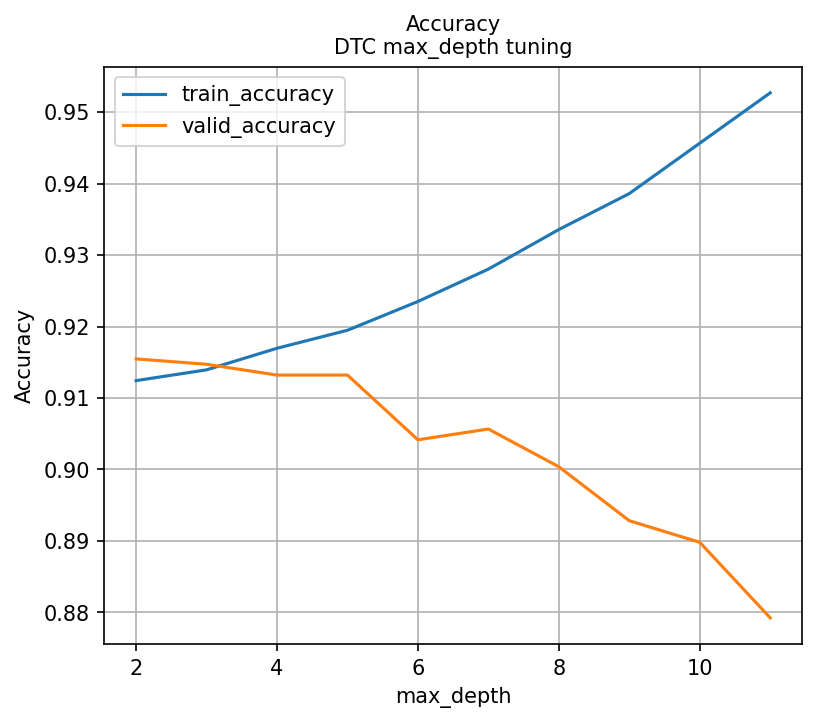

In [159]:
#Visualize accuracy
plt.figure(figsize=(6,5), facecolor='white', dpi=150)
#train accuracy
plt.plot(gs_result_df['max_depth'], gs_result_df['train_accuracy'],
         label='train_accuracy')
#valid accuracy
plt.plot(gs_result_df['max_depth'], gs_result_df['valid_accuracy'],
         label='valid_accuracy')

plt.title('Accuracy\nDTC max_depth tuning', fontsize=10)
plt.xlabel('max_depth', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.legend()
plt.grid()
plt.show()

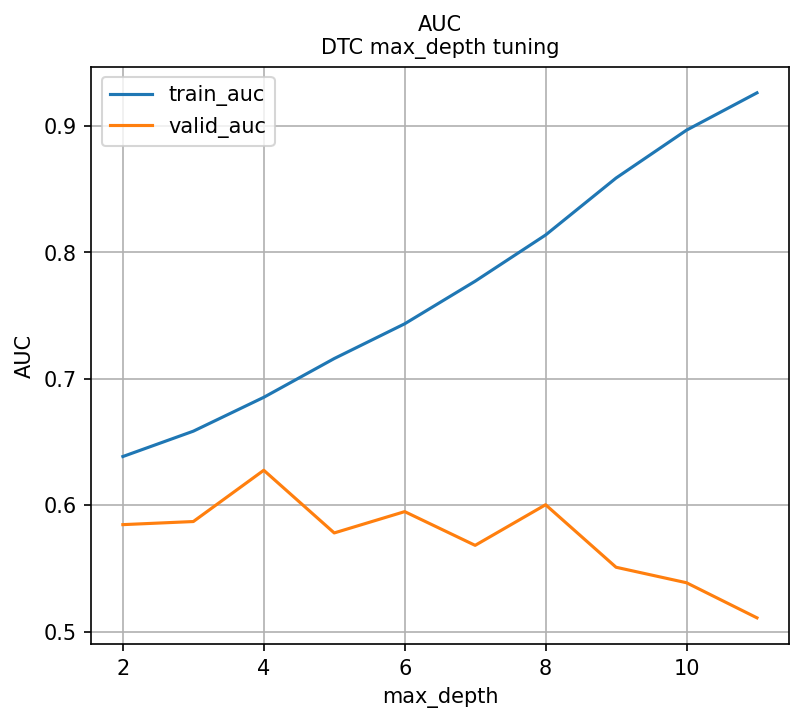

In [160]:
#Visualize AUC
plt.figure(figsize=(6,5), facecolor='white', dpi=150)
#train AUC
plt.plot(gs_result_df['max_depth'], gs_result_df['train_auc'],
         label='train_auc')
#valid AUC
plt.plot(gs_result_df['max_depth'], gs_result_df['valid_auc'],
         label='valid_auc')

plt.title('AUC\nDTC max_depth tuning', fontsize=10)
plt.xlabel('max_depth', fontsize=10)
plt.ylabel('AUC', fontsize=10)
plt.legend()
plt.grid()
plt.show()

Note:
As we can see above, as the max_depth increases, train accuracy / AUC improves, while validation accuracy / AUC deteriorate. It is typical situation of overfitting.

### Model deployment using best AUC at validation data.

In [161]:
#Taking best hyperparameter in term of AUC at train_valide i.e. validation data.
dtc_best_idx = np.argmax(gs_result_df['valid_auc'])
dtc_best_params = gs_result_df['params_dict'].values[dtc_best_idx]
dtc_best_score = gs_result_df['valid_auc'].values[dtc_best_idx]

#check result
print('dtc_best_params:', dtc_best_params)
print('dtc_best_score:', dtc_best_score)

dtc_best_params: {'max_depth': 4, 'random_state': 57}
dtc_best_score: 0.6276541370951255


In [162]:
#develop model by best hyperparameters
dtc_clf = dtc(**dtc_best_params)
#learn by fit
dtc_clf.fit(dtc_train_df[dtc_features], dtc_train_df[target])

DecisionTreeClassifier(max_depth=4, random_state=57)

In [163]:
#check feature importance
importance_df = pd.DataFrame({'feature': dtc_features, 'importance': dtc_clf.feature_importances_})
importance_df = importance_df.sort_values(by='importance', ascending=False).reset_index(drop=True)
importance_df.head()

feature  importance
0            time_duration    0.369006
1  area3_max_time_duration    0.267643
2                 age_10's    0.138419
3      event_day_2020/11/1    0.064837
4  area1_max_time_duration    0.061680

### Visualize optimized model

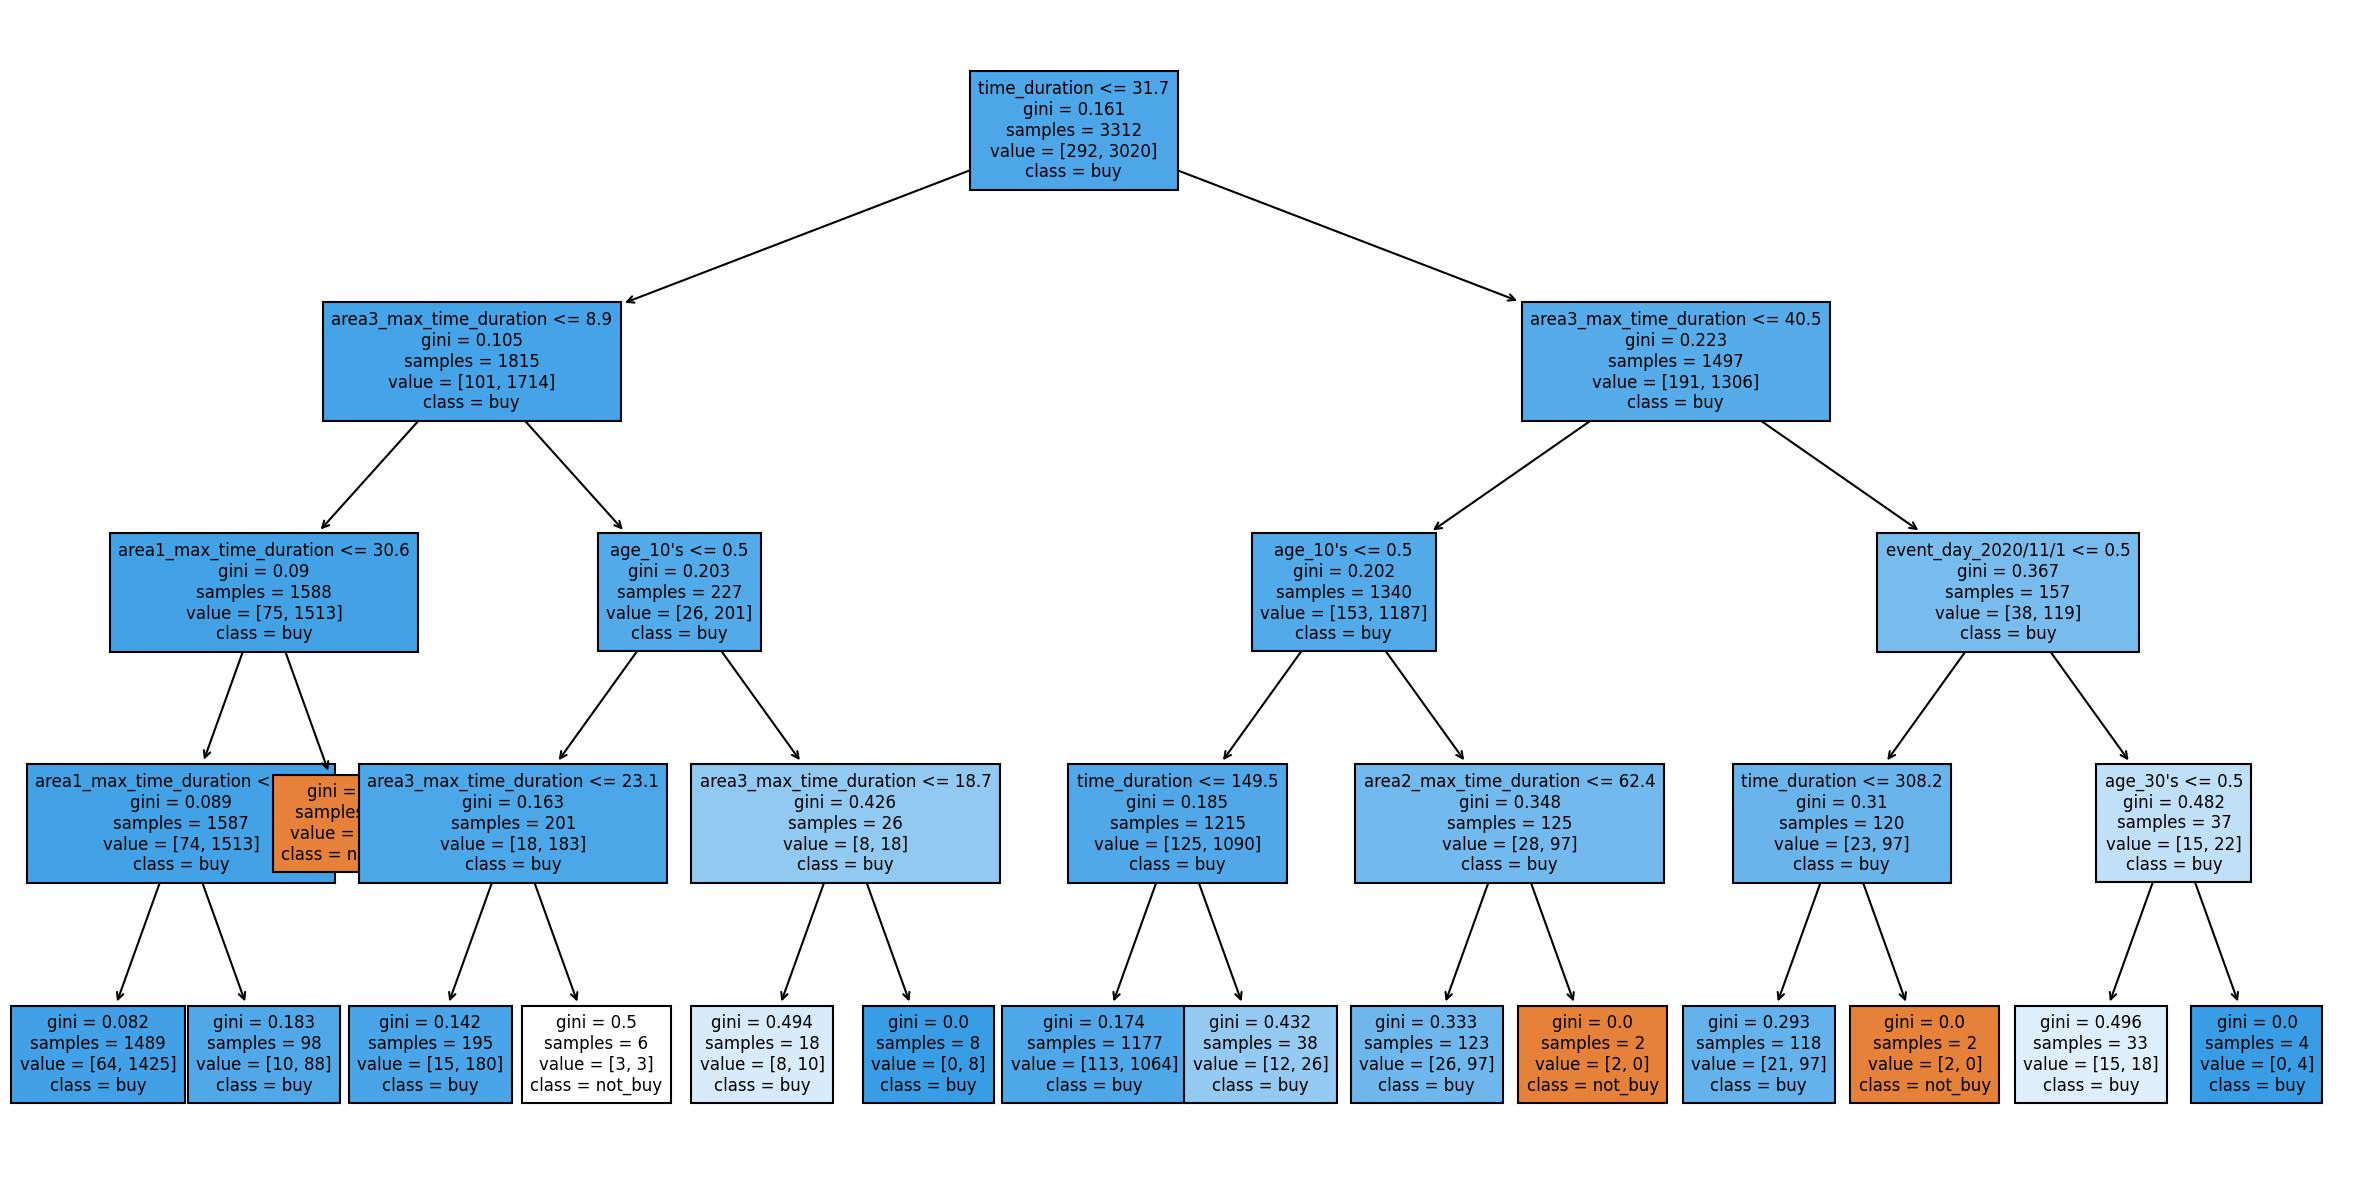

In [164]:
plt.figure(figsize=(20,10), facecolor='white', dpi=150)
plot_tree(dtc_clf, feature_names=dtc_features, class_names=['not_buy','buy'],
          fontsize=8, filled=True)
plt.show()

### Prediction and validation of optimized model

In [165]:
# predicting train data
train_pred_y = dtc_clf.predict(dtc_train_df[dtc_features])
train_proba_y = dtc_clf.predict_proba(dtc_train_df[dtc_features]).T[1]

#check accuracy and auc
train_accuracy_val = accuracy_score(dtc_train_df[target], train_pred_y)
train_auc_val = roc_auc_score(dtc_train_df[target], train_proba_y)
train_accuracy_val, train_auc_val

(0.9133454106280193, 0.6840742084731924)

In [166]:
#predicting test data
test_pred_y = dtc_clf.predict(dtc_test_df[dtc_features])
test_proba_y = dtc_clf.predict_proba(dtc_test_df[dtc_features]).T[1]

In [167]:
#read sample submit data
gi_sample_submit_df = pd.read_csv("./jissen-marketing/gi_sample_submit.csv")

In [168]:
gi_sample_submit_df.head()

customer_id  buy_proba
0  20201026-010002        0.5
1  20201026-010012        0.5
2  20201026-010016        0.5
3  20201026-010018        0.5
4  20201026-010022        0.5

In [169]:
#create df for kaggle submission
submit_df = dtc_test_df.copy()[['customer_id']]
submit_df['buy_proba'] = test_proba_y
submit_df.head()

customer_id  buy_proba
0  20201026-010002   0.957018
1  20201026-010012   0.957018
2  20201026-010016   0.957018
3  20201026-010018   0.957018
4  20201026-010022   0.957018

In [170]:
gi_sample_submit_df.shape, submit_df.shape

((2209, 2), (2209, 2))

In [171]:
submit_df = pd.merge(gi_sample_submit_df.drop('buy_proba', axis=1), submit_df,
                     on='customer_id', how='left').reset_index(drop=True)
submit_df.head()

customer_id  buy_proba
0  20201026-010002   0.957018
1  20201026-010012   0.957018
2  20201026-010016   0.957018
3  20201026-010018   0.957018
4  20201026-010022   0.957018

In [172]:
submit_df.shape

(2209, 2)

In [173]:
submit_df.to_csv(f"./output/submit_dtc.csv", encoding='utf-8', index=False)

### Reference (Additional supplement from Ohara)

#### Validation by confusion matrix

Note:

* In this textbook, confusion matrix library was not used. But usually we can creae confusion matrix just by 1 line using confusion_matrix library in sklearn.
* Also, we can check accuracy, precision, recall, and f1-score easily by using classification_report.
* Also, in the textbook, AUC and ROC are not used. By checking AUC and ROC, we can find that this decision tree model is not much different from random choice such that this model does not add much value, while this point is not stated in the textbook.
* As we can see, sklearn is really useful for "before deep learning". For simple application of machine learning, sklearn is enough.

In [174]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc

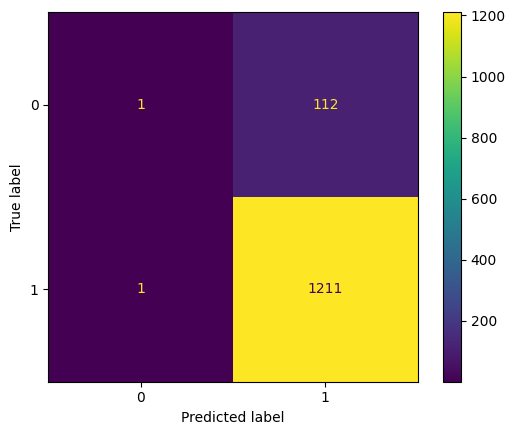

In [175]:
cm = confusion_matrix(dtc_train_valid_df[target], train_valid_pred_y, labels=dtc_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc_clf.classes_)
disp.plot()
plt.show()

In [176]:
cm

array([[   1,  112],
       [   1, 1211]])

In [177]:
print(classification_report(dtc_train_valid_df[target], train_valid_pred_y))

              precision    recall  f1-score   support

           0       0.50      0.01      0.02       113
           1       0.92      1.00      0.96      1212

    accuracy                           0.91      1325
   macro avg       0.71      0.50      0.49      1325
weighted avg       0.88      0.91      0.88      1325



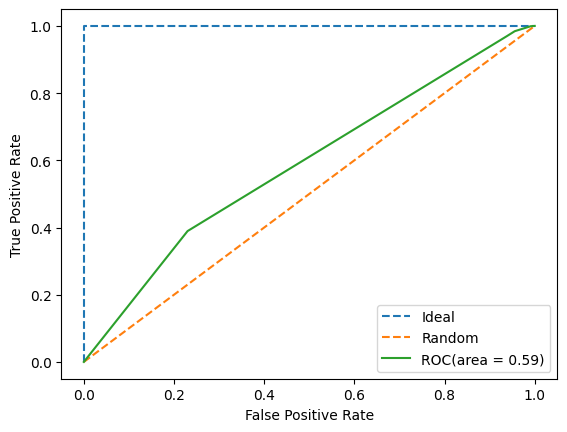

AUC is  0.5870754110809311


In [178]:
#AUC
fpr, tpr, thresholds = roc_curve(dtc_train_valid_df[target], train_valid_proba_y)
auc_score = auc(fpr, tpr)

# ideal line of ROC curve
plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='Ideal')
# random line of ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
# ROC curve
plt.plot(fpr, tpr, label='ROC(area = %0.2f)' % auc(fpr, tpr))
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print("AUC is ", auc_score)

Note:
* AUC is almost 0.587. While it is not pointed out in the textbook, this implies that prediction power of decision tree model cannot be much different from random choice.
* Actually, from confusion matrix, we can understand that the model predict just 1 (=customer will buy it) 1323 customers out of 1325 of validation customer data. Just saying 1 results in 91% of accuracy, just because around 90% of customer actually purchased. It's not much value added model, in reality.

#### Using k-fold cross validation method

Note: In many cases, k-fold cross validation is often used, rather than holdout method used in the textbook. In this section, just introducing how to do cross validation method.

In [179]:
from sklearn.model_selection import cross_validate

In [180]:
#setting scoring functions
score_funcs = [
        'accuracy',
        'precision',
        'recall',
        'f1',
        'roc_auc'
    ]
#10-fold cross validation method. Pls note that we use entire train data dtc_train_df.
#cross_validate does k folds of cross validation by splitting train and validation data for k times.
dtc_10cv_clf_results = cross_validate(dtc_clf, dtc_train_df[dtc_features], dtc_train_df[target], cv=10,
                         scoring=score_funcs,return_train_score=True)

In [181]:
dtc_10cv_clf_results

{'fit_time': array([0.01216722, 0.01214218, 0.0135076 , 0.0115304 , 0.03036952,
        0.01108813, 0.0355196 , 0.04211497, 0.02126503, 0.02071524]),
 'score_time': array([0.02009392, 0.01756954, 0.01927638, 0.03941298, 0.02013636,
        0.02057242, 0.04269171, 0.04076505, 0.01999521, 0.05789065]),
 'test_accuracy': array([0.90963855, 0.90361446, 0.90634441, 0.91238671, 0.91238671,
        0.91238671, 0.87009063, 0.91238671, 0.90634441, 0.90634441]),
 'train_accuracy': array([0.9147651 , 0.91510067, 0.91512915, 0.9131164 , 0.91479369,
        0.91445824, 0.91613552, 0.91546461, 0.91445824, 0.91479369]),
 'test_precision': array([0.90963855, 0.91158537, 0.9118541 , 0.91238671, 0.91238671,
        0.91238671, 0.90851735, 0.91238671, 0.91692308, 0.9118541 ]),
 'train_precision': array([0.91453567, 0.91822192, 0.91596355, 0.91720394, 0.91453567,
        0.91422805, 0.91576819, 0.9157114 , 0.9153457 , 0.91453567]),
 'test_recall': array([1.        , 0.99006623, 0.99337748, 1.        , 1. 

In [182]:
#below shows mean of 10 times accuracy, precision, recall, f1, and AUC for validation data
#it can be more precise than hold out method
print('accuracy:',dtc_10cv_clf_results['test_accuracy'].mean())
print('precision:',dtc_10cv_clf_results['test_precision'].mean())
print('recall:',dtc_10cv_clf_results['test_recall'].mean())
print('f1:',dtc_10cv_clf_results['test_f1'].mean())
print('AUC:',dtc_10cv_clf_results['test_roc_auc'].mean())

accuracy: 0.9051923706912242
precision: 0.9119919381632823
recall: 0.9917218543046358
f1: 0.950146798913471
AUC: 0.5615762731217172


In [183]:
#predicting test data
#prediction process is just same
test_pred_y = dtc_clf.predict(dtc_test_df[dtc_features])
test_proba_y = dtc_clf.predict_proba(dtc_test_df[dtc_features]).T[1]

#### Grid-search function supplied by sklearn

Note:
In this text, grid search is implemented by naive way i.e. for-loop.
Hoever, in daily job, we can utilize gridsearch function by sklearn.

Reference:
https://helve-blog.com/posts/python/sklearn-grid-search/

In [184]:
#import gridsearch function
from sklearn.model_selection import GridSearchCV

In [185]:
#set parameter list.
#Pls be careful that we need to set parameters by np.array or list to utilize GridSearchCV
dtc_gscv_params_list = [{'max_depth': np.arange(2,12,1), 'random_state': [rnd_state]}]
dtc_gscv_params_list

[{'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
  'random_state': [57]}]

In [186]:
#utilize grid search function.
#It will do both cross-validation by splitting training data into train_train and train_validation.
#Also, it will set hyperparameters with best score in cross-validation.
dtc_gscv_clf = GridSearchCV(dtc_clf, dtc_gscv_params_list, scoring="roc_auc", cv=10)
dtc_gscv_clf.fit(dtc_train_df[dtc_features], dtc_train_df[target])

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=4, random_state=57),
             param_grid=[{'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                          'random_state': [57]}],
             scoring='roc_auc')

In [187]:
#best parameter model
print(dtc_gscv_clf.best_params_)

{'max_depth': 3, 'random_state': 57}


In [188]:
#best estimator model
print(dtc_gscv_clf.best_estimator_)

DecisionTreeClassifier(max_depth=3, random_state=57)


In [189]:
#scoring of roc_auc i.e. AUC for best parameter model
print(dtc_gscv_clf.best_score_)

0.5905102001979143


Prediction can be obtained by same way as above, using predict and predict_proba function. Then, we can predict for test data to create kaggle submission file, same manner in above code.

In [190]:
#predicting test data
dtc_gscv_test_pred_y = dtc_gscv_clf.predict(dtc_test_df[dtc_features])
dtc_gscv_test_proba_y = dtc_gscv_clf.predict_proba(dtc_test_df[dtc_features]).T[1]

In [191]:
#create df for kaggle submission
submit_df = dtc_test_df.copy()[['customer_id']]
submit_df['buy_proba'] = dtc_gscv_test_proba_y
submit_df.head()

customer_id  buy_proba
0  20201026-010002   0.953371
1  20201026-010012   0.953371
2  20201026-010016   0.953371
3  20201026-010018   0.953371
4  20201026-010022   0.953371

In [192]:
submit_df = pd.merge(gi_sample_submit_df.drop('buy_proba', axis=1), submit_df,
                     on='customer_id', how='left').reset_index(drop=True)
submit_df.head()

customer_id  buy_proba
0  20201026-010002   0.953371
1  20201026-010012   0.953371
2  20201026-010016   0.953371
3  20201026-010018   0.953371
4  20201026-010022   0.953371

## Chapter 11: Logistic regression

### Import libraries

In [193]:
from sklearn.preprocessing import StandardScaler #for standardization
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as logr
from sklearn.metrics import accuracy_score, roc_auc_score

### Read pickle file - train test split

In [194]:
#pickle file as dictionary
pp_data_dict = joblib.load(pp_data_dict_pkl_fpath)

#read dataframe in dictionary
lgr_train_df = pp_data_dict['lgr']['train']
lgr_test_df = pp_data_dict['lgr']['test']

In [195]:
#train test split
lgr_train_train_df, lgr_train_valid_df = train_test_split(lgr_train_df, test_size=0.4,
                                                          random_state=rnd_state, shuffle=True)

In [196]:
lgr_train_df.shape, lgr_train_train_df.shape, lgr_train_valid_df.shape, lgr_test_df.shape

((3312, 22), (1987, 22), (1325, 22), (2209, 21))

In [197]:
#setting target variable
target = 'buy_flag'

#explanation variables as features
lgr_features = lgr_train_df.columns.tolist()

#eliminating unnecessary columns from features
lgr_features.remove('customer_id')
lgr_features.remove('buy_flag')

### Hyperparameter tuning by grid-search

In [198]:
#create grid search list
lgr_params_list = [{'penalty': 'l2', 'C': ii, 'random_state': rnd_state} for ii in np.arange(0.005,0.5,0.005)]
lgr_params_list

[{'penalty': 'l2', 'C': 0.005, 'random_state': 57},
 {'penalty': 'l2', 'C': 0.01, 'random_state': 57},
 {'penalty': 'l2', 'C': 0.015, 'random_state': 57},
 {'penalty': 'l2', 'C': 0.02, 'random_state': 57},
 {'penalty': 'l2', 'C': 0.025, 'random_state': 57},
 {'penalty': 'l2', 'C': 0.030000000000000002, 'random_state': 57},
 {'penalty': 'l2', 'C': 0.034999999999999996, 'random_state': 57},
 {'penalty': 'l2', 'C': 0.04, 'random_state': 57},
 {'penalty': 'l2', 'C': 0.045, 'random_state': 57},
 {'penalty': 'l2', 'C': 0.049999999999999996, 'random_state': 57},
 {'penalty': 'l2', 'C': 0.055, 'random_state': 57},
 {'penalty': 'l2', 'C': 0.06, 'random_state': 57},
 {'penalty': 'l2', 'C': 0.065, 'random_state': 57},
 {'penalty': 'l2', 'C': 0.07, 'random_state': 57},
 {'penalty': 'l2', 'C': 0.07500000000000001, 'random_state': 57},
 {'penalty': 'l2', 'C': 0.08, 'random_state': 57},
 {'penalty': 'l2', 'C': 0.085, 'random_state': 57},
 {'penalty': 'l2', 'C': 0.09000000000000001, 'random_state': 57

In [199]:
# implement grid search

#list to save the results of grid search
gs_result_list = []

#implement grid search
for params_dict in lgr_params_list:
  #define
  tmp_lgr_clf = logr(**params_dict, max_iter=1000)
  #learn by fit
  tmp_lgr_clf.fit(lgr_train_train_df[dtc_features], lgr_train_train_df[target])

  #predict y from learned model for train_train data (0 or 1 by predict)
  train_pred_y = tmp_lgr_clf.predict(lgr_train_train_df[dtc_features])
  #predict y from learned model for train_train data (probability of 1)
  train_proba_y = tmp_lgr_clf.predict_proba(lgr_train_train_df[dtc_features]).T[1]

  #predict y for train_valid (predict)
  valid_pred_y = tmp_lgr_clf.predict(lgr_train_valid_df[dtc_features])
  #predict y for train_valid (probability of 1)
  valid_proba_y = tmp_lgr_clf.predict_proba(lgr_train_valid_df[dtc_features]).T[1]

  #evaluate train_train
  #accuracy
  train_accuracy_val = accuracy_score(lgr_train_train_df[target], train_pred_y)
  #AUC
  train_auc_val = roc_auc_score(lgr_train_train_df[target], train_proba_y)

  #evaluate train_valid
  #accuracy
  valid_accuracy_val = accuracy_score(lgr_train_valid_df[target], valid_pred_y)
  #AUC
  valid_auc_val = roc_auc_score(lgr_train_valid_df[target], valid_proba_y)

  #save data into list
  gs_result_list += [[params_dict, params_dict['C'], train_accuracy_val,
                      train_auc_val, valid_accuracy_val, valid_auc_val]]

#save result into dataframe
gs_result_df = pd.DataFrame(gs_result_list, columns=['params_dict','L2_regularization_strength',
                                                     'train_accuracy','train_auc',
                                                     'valid_accuracy','valid_auc'])
#check results
gs_result_df[['L2_regularization_strength','train_accuracy','train_auc','valid_accuracy','valid_auc']]\
.sort_values(by='valid_auc', ascending=False).reset_index(drop=True)

L2_regularization_strength  train_accuracy  train_auc  valid_accuracy  \
0                        0.480        0.909411   0.697036        0.912453   
1                        0.495        0.909411   0.696869        0.912453   
2                        0.475        0.909411   0.696720        0.912453   
3                        0.485        0.909914   0.696773        0.912453   
4                        0.490        0.909411   0.696841        0.912453   
5                        0.470        0.909914   0.696850        0.912453   
6                        0.450        0.909411   0.696819        0.912453   
7                        0.460        0.909411   0.696798        0.912453   
8                        0.425        0.909411   0.696711        0.912453   
9                        0.455        0.909411   0.696745        0.912453   
10                       0.435        0.909411   0.696773        0.912453   
11                       0.440        0.909411   0.696689        0.912453   
12                       0.420        0.909411   0.696668        0.912453   
13                       0.465        0.909411   0.696649        0.912453   
14                       0.430        0.909411   0.696612        0.912453   
15                       0.415        0.909411   0.696640        0.912453   
16                       0.445        0.909411   0.696587        0.912453   
17                       0.410        0.909411   0.696553        0.912453   
18                       0.405        0.909411   0.696473        0.912453   
19                       0.400        0.909411   0.696547        0.912453   
20                       0.385        0.909411   0.696486        0.913208   
21                       0.390        0.909411   0.696424        0.912453   
22                       0.395        0.909411   0.696353        0.912453   
23                       0.380        0.909411   0.696498        0.912453   
24                       0.365        0.909411   0.696436        0.912453   
25                       0.375        0.909411   0.696535        0.913208   
26                       0.370        0.909411   0.696458        0.912453   
27                       0.350        0.909411   0.696584        0.913208   
28                       0.360        0.909411   0.696445        0.913208   
29                       0.355        0.909411   0.696405        0.913208   
30                       0.345        0.909411   0.696439        0.912453   
31                       0.340        0.909411   0.696214        0.912453   
32                       0.335        0.909411   0.696226        0.913208   
33                       0.330        0.909411   0.696282        0.913208   
34                       0.315        0.909411   0.696149        0.913208   
35                       0.325        0.909411   0.696084        0.912453   
36                       0.320        0.909914   0.695976        0.913208   
37                       0.305        0.909411   0.696087        0.913208   
38                       0.310        0.909411   0.695969        0.913208   
39                       0.295        0.909411   0.695861        0.913208   
40                       0.300        0.909411   0.695911        0.913208   
41                       0.275        0.909411   0.695769        0.913208   
42                       0.285        0.909411   0.695781        0.913208   
43                       0.290        0.909914   0.695806        0.913962   
44                       0.270        0.909411   0.695691        0.913208   
45                       0.280        0.909411   0.695574        0.913208   
46                       0.265        0.909411   0.695555        0.913208   
47                       0.255        0.909411   0.695500        0.913208   
48                       0.260        0.909411   0.695416        0.913962   
49                       0.235        0.909411   0.695450        0.913962   
50                       0.250        0.909411   0.695469        0.913962   


### Visualization of hyperparameter tuning for logistic regression

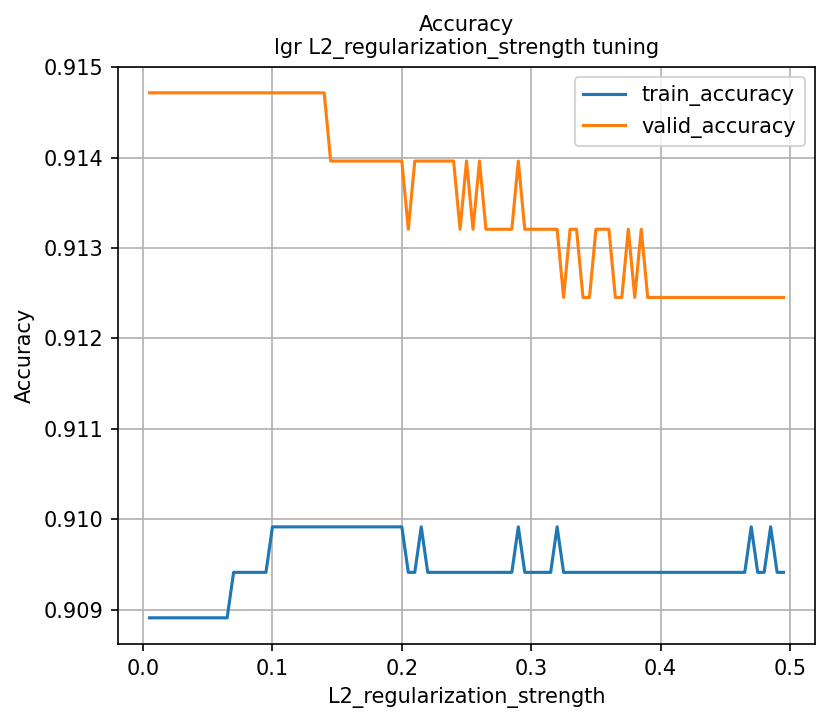

In [200]:
#Visualize accuracy
plt.figure(figsize=(6,5), facecolor='white', dpi=150)
#train accuracy
plt.plot(gs_result_df['L2_regularization_strength'], gs_result_df['train_accuracy'],
         label='train_accuracy')
#valid accuracy
plt.plot(gs_result_df['L2_regularization_strength'], gs_result_df['valid_accuracy'],
         label='valid_accuracy')

plt.title('Accuracy\nlgr L2_regularization_strength tuning', fontsize=10)
plt.xlabel('L2_regularization_strength', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.legend()
plt.grid()
plt.show()

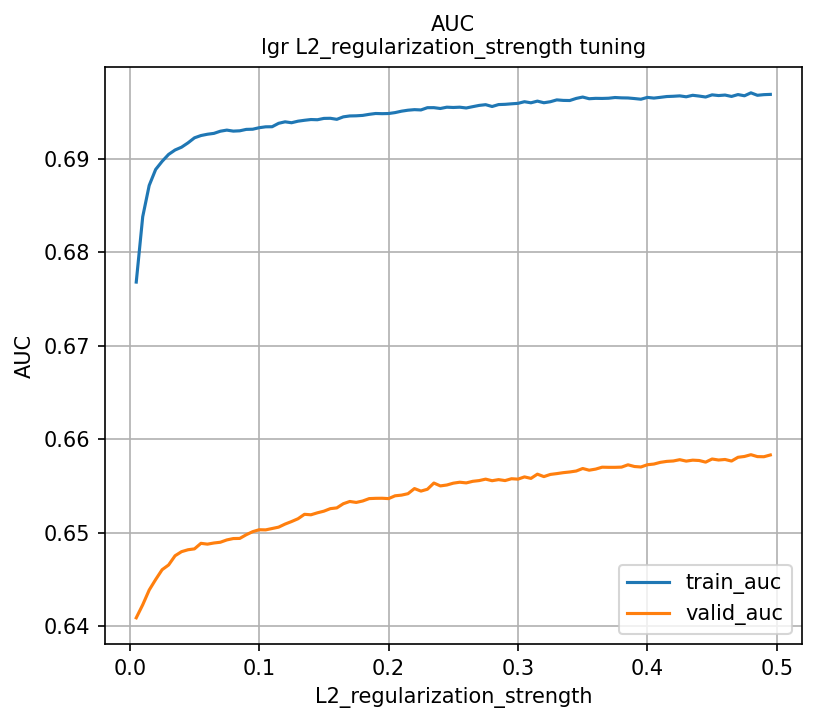

In [201]:
#Visualize AUC
plt.figure(figsize=(6,5), facecolor='white', dpi=150)
#train AUC
plt.plot(gs_result_df['L2_regularization_strength'], gs_result_df['train_auc'],
         label='train_auc')
#valid AUC
plt.plot(gs_result_df['L2_regularization_strength'], gs_result_df['valid_auc'],
         label='valid_auc')

plt.title('AUC\nlgr L2_regularization_strength tuning', fontsize=10)
plt.xlabel('L2_regularization_strength', fontsize=10)
plt.ylabel('AUC', fontsize=10)
plt.legend()
plt.grid()
plt.show()

### Model deployment using best AUC at validation data.

In [202]:
#Taking best hyperparameter in term of AUC at train_valide i.e. validation data.
lgr_best_idx = np.argmax(gs_result_df['valid_auc'])
lgr_best_params = gs_result_df['params_dict'].values[lgr_best_idx]
lgr_best_score = gs_result_df['valid_auc'].values[lgr_best_idx]

#check result
print('lgr_best_params:', lgr_best_params)
print('lgr_best_score:', lgr_best_score)

lgr_best_params: {'penalty': 'l2', 'C': 0.48000000000000004, 'random_state': 57}
lgr_best_score: 0.658342825432986


In [203]:
#develop model by best hyperparameters
lgr_clf = logr(**lgr_best_params, max_iter=1000)
#learn by fit
lgr_clf.fit(lgr_train_df[lgr_features], lgr_train_df[target])

LogisticRegression(C=0.48000000000000004, max_iter=1000, random_state=57)

### Standardization of data

In [204]:
#check now data is not standardized
lgr_train_df[lgr_features].describe()

time_duration  event_day_2020/10/27  event_day_2020/10/28  \
count    3312.000000           3312.000000           3312.000000   
mean       40.535386              0.146135              0.127717   
std        38.217552              0.353295              0.333825   
min         1.800000              0.000000              0.000000   
25%        16.600000              0.000000              0.000000   
50%        28.800000              0.000000              0.000000   
75%        51.400000              0.000000              0.000000   
max       421.600000              1.000000              1.000000   

       event_day_2020/10/29  event_day_2020/10/30  event_day_2020/10/31  \
count           3312.000000           3312.000000           3312.000000   
mean               0.128019              0.146135              0.157609   
std                0.334162              0.353295              0.364429   
min                0.000000              0.000000              0.000000   
25%                0.000000              0.000000              0.000000   
50%                0.000000              0.000000              0.000000   
75%                0.000000              0.000000              0.000000   
max                1.000000              1.000000              1.000000   

       event_day_2020/11/1  gender_woman     age_10's     age_20's  \
count          3312.000000   3312.000000  3312.000000  3312.000000   
mean              0.169686      0.518418     0.084843     0.083635   
std               0.375413      0.499736     0.278690     0.276882   
min               0.000000      0.000000     0.000000     0.000000   
25%               0.000000      0.000000     0.000000     0.000000   
50%               0.000000      1.000000     0.000000     0.000000   
75%               0.000000      1.000000     0.000000     0.000000   
max               1.000000      1.000000     1.000000     1.000000   

          age_30's     age_40's     age_50's     age_60's  age_Over70's  \
count  3312.000000  3312.000000  3312.000000  3312.000000   3312.000000   
mean      0.211957     0.243357     0.185990     0.135266      0.028986   
std       0.408756     0.429174     0.389158     0.342059      0.167791   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.000000     0.000000     0.000000     0.000000      0.000000   
50%       0.000000     0.000000     0.000000     0.000000      0.000000   
75%       0.000000     0.000000     0.000000     0.000000      0.000000   
max       1.000000     1.000000     1.000000     1.000000      1.000000   

       area1_max_time_duration  area2_max_time_duration  \
count              3312.000000              3312.000000   
mean                  9.976147                 3.942089   
std                  18.719041                12.399809   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                  13.000000                 0.000000   
max                 237.200000               310.000000   

       area3_max_time_duration  area4_max_time_duration  \
count              3312.000000              3312.000000   
mean                  7.893841                 2.307065   
std                  16.979494                 7.830347   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   9.800000                 0.000000   
max                 240.600000               168.400000   

       area5_max_time_duration  
count              3312.000000  
mean                  3.469143  
std                   9.192885  
min                   0.000000  
25%                   0.000000  
50%                   0.000000  
75%                   0.000000  
max                 107.600000

In [205]:
# standardization of features
scaler = StandardScaler()
lgr_train_df[lgr_features] = scaler.fit_transform(lgr_train_df[lgr_features])

# check now data is standardized
lgr_train_df[lgr_features].describe()

time_duration  event_day_2020/10/27  event_day_2020/10/28  \
count   3.312000e+03          3.312000e+03          3.312000e+03   
mean   -1.287215e-17          2.059544e-16         -6.865147e-17   
std     1.000151e+00          1.000151e+00          1.000151e+00   
min    -1.013703e+00         -4.136976e-01         -3.826453e-01   
25%    -6.263876e-01         -4.136976e-01         -3.826453e-01   
50%    -3.071143e-01         -4.136976e-01         -3.826453e-01   
75%     2.843263e-01         -4.136976e-01         -3.826453e-01   
max     9.972438e+00          2.417225e+00          2.613386e+00   

       event_day_2020/10/29  event_day_2020/10/30  event_day_2020/10/31  \
count          3.312000e+03          3.312000e+03          3.312000e+03   
mean          -1.373029e-16          1.716287e-16          1.029772e-16   
std            1.000151e+00          1.000151e+00          1.000151e+00   
min           -3.831637e-01         -4.136976e-01         -4.325468e-01   
25%           -3.831637e-01         -4.136976e-01         -4.325468e-01   
50%           -3.831637e-01         -4.136976e-01         -4.325468e-01   
75%           -3.831637e-01         -4.136976e-01         -4.325468e-01   
max            2.609851e+00          2.417225e+00          2.311888e+00   

       event_day_2020/11/1  gender_woman      age_10's      age_20's  \
count         3.312000e+03  3.312000e+03  3.312000e+03  3.312000e+03   
mean          1.373029e-16 -3.003502e-17 -8.581434e-18 -2.413528e-17   
std           1.000151e+00  1.000151e+00  1.000151e+00  1.000151e+00   
min          -4.520660e-01 -1.037540e+00 -3.044810e-01 -3.021068e-01   
25%          -4.520660e-01 -1.037540e+00 -3.044810e-01 -3.021068e-01   
50%          -4.520660e-01  9.638184e-01 -3.044810e-01 -3.021068e-01   
75%          -4.520660e-01  9.638184e-01 -3.044810e-01 -3.021068e-01   
max           2.212067e+00  9.638184e-01  3.284277e+00  3.310087e+00   

           age_30's     age_40's      age_50's      age_60's  age_Over70's  \
count  3.312000e+03  3312.000000  3.312000e+03  3.312000e+03  3.312000e+03   
mean  -3.218038e-17     0.000000  7.508755e-17  5.577932e-17 -4.719789e-17   
std    1.000151e+00     1.000151  1.000151e+00  1.000151e+00  1.000151e+00   
min   -5.186189e-01    -0.567123 -4.780028e-01 -3.955055e-01 -1.727737e-01   
25%   -5.186189e-01    -0.567123 -4.780028e-01 -3.955055e-01 -1.727737e-01   
50%   -5.186189e-01    -0.567123 -4.780028e-01 -3.955055e-01 -1.727737e-01   
75%   -5.186189e-01    -0.567123 -4.780028e-01 -3.955055e-01 -1.727737e-01   
max    1.928198e+00     1.763287  2.092038e+00  2.528410e+00  5.787918e+00   

       area1_max_time_duration  area2_max_time_duration  \
count             3.312000e+03             3.312000e+03   
mean             -1.287215e-17            -6.436076e-18   
std               1.000151e+00             1.000151e+00   
min              -5.330216e-01            -3.179633e-01   
25%              -5.330216e-01            -3.179633e-01   
50%              -5.330216e-01            -3.179633e-01   
75%               1.615633e-01            -3.179633e-01   
max               1.214048e+01             2.468620e+01   

       area3_max_time_duration  area4_max_time_duration  \
count             3.312000e+03             3.312000e+03   
mean             -5.148860e-17             2.145359e-17   
std               1.000151e+00             1.000151e+00   
min              -4.649745e-01            -2.946758e-01   
25%              -4.649745e-01            -2.946758e-01   
50%              -4.649745e-01            -2.946758e-01   
75%               1.122794e-01            -2.946758e-01   
max               1.370720e+01             2.121464e+01   

       area5_max_time_duration  
count             3.312000e+03  
mean              1.716287e-17  
std               1.000151e+00  
min              -3.774296e-01  
25%              -3.774296e-01  
50%              -3.774296e-01  
75%              -3.774296e-01  
max               1.132904e+01

In [206]:
#learn model again with standardized data
lgr_clf = logr(**lgr_best_params, max_iter=1000)

#learn by fit
lgr_clf.fit(lgr_train_df[lgr_features], lgr_train_df[target])

LogisticRegression(C=0.48000000000000004, max_iter=1000, random_state=57)

In [207]:
#check standard partial regression coefficient
lgr_coef_df = pd.DataFrame({'feature': lgr_features, 'coefficient': lgr_clf.coef_[0]})
lgr_coef_df = lgr_coef_df.append(pd.DataFrame({'feature': 'constant', 'coefficient': lgr_clf.intercept_}))
lgr_coef_df['abs_coefficient'] = lgr_coef_df['coefficient'].abs()
lgr_coef_df = lgr_coef_df.sort_values(by='abs_coefficient', ascending=False).reset_index(drop=True)
lgr_coef_df.head(15)

<ipython-input-207-b80aa62d5c7f>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lgr_coef_df = lgr_coef_df.append(pd.DataFrame({'feature': 'constant', 'coefficient': lgr_clf.intercept_}))


feature  coefficient  abs_coefficient
0                  constant     2.510166         2.510166
1                  age_50's     0.695561         0.695561
2                  age_30's     0.677780         0.677780
3                  age_20's     0.610281         0.610281
4                  age_40's     0.608630         0.608630
5                  age_60's     0.459629         0.459629
6              age_Over70's     0.248290         0.248290
7   area3_max_time_duration    -0.222229         0.222229
8   area2_max_time_duration    -0.186863         0.186863
9   area1_max_time_duration    -0.159419         0.159419
10                 age_10's     0.140379         0.140379
11  area5_max_time_duration    -0.081905         0.081905
12      event_day_2020/11/1    -0.081403         0.081403
13     event_day_2020/10/27    -0.080931         0.080931
14  area4_max_time_duration    -0.076647         0.076647

### Prediction and validation of optimized model

In [208]:
# predicting train data
train_pred_y = lgr_clf.predict(lgr_train_df[lgr_features])
train_proba_y = lgr_clf.predict_proba(lgr_train_df[lgr_features]).T[1]

#check accuracy and auc
train_accuracy_val = accuracy_score(lgr_train_df[target], train_pred_y)
train_auc_val = roc_auc_score(lgr_train_df[target], train_proba_y)
train_accuracy_val, train_auc_val

(0.9127415458937198, 0.6925439989113671)

In [209]:
#predicting test data
test_pred_y = lgr_clf.predict(lgr_test_df[lgr_features])
test_proba_y = lgr_clf.predict_proba(lgr_test_df[lgr_features]).T[1]

In [210]:
#read sample submit data
gi_sample_submit_df = pd.read_csv("./jissen-marketing/gi_sample_submit.csv")

In [211]:
#create df for kaggle submission
submit_df = lgr_test_df.copy()[['customer_id']]
submit_df['buy_proba'] = test_proba_y
submit_df.head()

customer_id  buy_proba
0  20201026-010002   0.885610
1  20201026-010012   0.926723
2  20201026-010016   0.505269
3  20201026-010018   0.732590
4  20201026-010022   0.915052

In [212]:
gi_sample_submit_df.shape, submit_df.shape

((2209, 2), (2209, 2))

In [213]:
submit_df = pd.merge(gi_sample_submit_df.drop('buy_proba', axis=1), submit_df,
                     on='customer_id', how='left').reset_index(drop=True)
submit_df.head()

customer_id  buy_proba
0  20201026-010002   0.885610
1  20201026-010012   0.926723
2  20201026-010016   0.505269
3  20201026-010018   0.732590
4  20201026-010022   0.915052

In [214]:
submit_df.shape

(2209, 2)

In [215]:
submit_df.to_csv(f"./output/submit_lgr.csv", encoding='utf-8', index=False)

## Chapter 12: Ensembling

### Reading csv file of results for decision tree and logistic regression

In [216]:
#read decision tree
submit_dtc_df = pd.read_csv(f"./output/submit_dtc.csv", encoding='utf-8',
                            dtype={'customer_id': str, "buy_proba":float})

#read logistic regression
submit_lgr_df = pd.read_csv(f"./output/submit_lgr.csv", encoding='utf-8',
                            dtype={'customer_id': str, "buy_proba":float})

In [217]:
# merge both
submit_dtc_lgr_df = pd.merge(submit_dtc_df, submit_lgr_df,
                             on='customer_id', suffixes=['_dtc','_lgr'])

print(f'submit_dtc_lgr_df.shape: {submit_dtc_lgr_df.shape}')

submit_dtc_lgr_df.head()

submit_dtc_lgr_df.shape: (2209, 3)


customer_id  buy_proba_dtc  buy_proba_lgr
0  20201026-010002       0.957018       0.885610
1  20201026-010012       0.957018       0.926723
2  20201026-010016       0.957018       0.505269
3  20201026-010018       0.957018       0.732590
4  20201026-010022       0.957018       0.915052

### Taking average as ensembling

Note:

Taking average of prediction results from different models is simple, but it is actually one way of ensembling.

In [218]:
#taking average of buy_proba_dtc and buy_proba_lgr
submit_dtc_lgr_df['buy_proba'] = submit_dtc_lgr_df[['buy_proba_dtc','buy_proba_lgr']].mean(axis=1)
#classify not-buy=0 and buy=1 by threshold of 0.50
submit_dtc_lgr_df['pred_buy_flag'] = np.where(submit_dtc_lgr_df['buy_proba'] >= 0.5, 1, 0)

#check shape of df and created data
print(submit_dtc_lgr_df.shape)
submit_dtc_lgr_df.head()

(2209, 5)


customer_id  buy_proba_dtc  buy_proba_lgr  buy_proba  pred_buy_flag
0  20201026-010002       0.957018       0.885610   0.921314              1
1  20201026-010012       0.957018       0.926723   0.941871              1
2  20201026-010016       0.957018       0.505269   0.731143              1
3  20201026-010018       0.957018       0.732590   0.844804              1
4  20201026-010022       0.957018       0.915052   0.936035              1

In [219]:
submit_dtc_lgr_df['pred_buy_flag'].value_counts()

1    1570
0     639
Name: pred_buy_flag, dtype: int64

### Create submission file for kaggle competition

In [220]:
submit_dtc_lgr_mean_df = submit_dtc_lgr_df[['customer_id','buy_proba']]
print(submit_dtc_lgr_mean_df.shape)
submit_dtc_lgr_mean_df.head()

(2209, 2)


customer_id  buy_proba
0  20201026-010002   0.921314
1  20201026-010012   0.941871
2  20201026-010016   0.731143
3  20201026-010018   0.844804
4  20201026-010022   0.936035

In [221]:
submit_dtc_lgr_mean_df.to_csv(f"./output/submit_dtc_lgr_mean.csv", encoding='utf-8', index=False)

### Example of Boosting: LightGBM (often used Gradient Boosting Decision Tree, GBDT)

Note: LightGBM is a type of tree model, such that we take same step as decision tree model in Chapter 10 to take data.

In [222]:
#pickle file as dictionary
pp_data_dict = joblib.load(pp_data_dict_pkl_fpath)
#read dataframe in dictionary
dtc_train_df = pp_data_dict['dtc']['train']
dtc_test_df = pp_data_dict['dtc']['test']
#train test split
dtc_train_train_df, dtc_train_valid_df = train_test_split(dtc_train_df, test_size=0.4,
                                                          random_state=rnd_state, shuffle=True)
dtc_train_df.shape, dtc_train_train_df.shape, dtc_train_valid_df.shape, dtc_test_df.shape

((3312, 22), (1987, 22), (1325, 22), (2209, 21))

In [223]:
#setting target variable
target = 'buy_flag'

#setting features (explanatory variables)
lgbc_features = dtc_train_df.columns.tolist()

#excluding customer_id and buy_flag from features
lgbc_features.remove('customer_id')
lgbc_features.remove('buy_flag')

Note: lgbc...lgb=LightGBM, c=classification (it can be used as regression too.)

### Modeling LightGBM model

In [224]:
#import "original" LightGBM library, while sklearn also has LightGBM module.
import lightgbm as lgb #LightGBM

In [225]:
#create dataset for LightGBM
lgb_train_train_dataset = lgb.Dataset(dtc_train_train_df[lgbc_features],dtc_train_train_df[target])
lgb_train_valid_dataset = lgb.Dataset(dtc_train_valid_df[lgbc_features],dtc_train_valid_df[target],
                                      reference=lgb_train_train_dataset)

lgb_train_dataset = lgb.Dataset(dtc_train_df[lgbc_features],dtc_train_df[target])
lgb_test_dataset = lgb.Dataset(dtc_test_df[lgbc_features], reference=lgb_train_dataset)

In [226]:
#set hyperparameters
lgbc_params = {
    'objective':'binary', #binary classification
    'metric':'auc', #evaluation function is auc
    'verbosity': -1 #no output
}

In [227]:
#learn LightGBM
lgbc_clf = lgb.train(
    lgbc_params, #hyperparameters
    train_set=lgb_train_train_dataset, #training data
    num_boost_round = 100, #times of boosting
    verbose_eval = 20 #output auc every 20 times of boostings
)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


In [228]:
# predict train_valid data
lgbc_train_valid_proba_y = lgbc_clf.predict(dtc_train_valid_df[lgbc_features])
lgbc_train_valid_proba_y

array([0.97537064, 0.99360911, 0.98848482, ..., 0.99171703, 0.99914284,
       0.97479574])

In [229]:
#evaluate train_valid
lgbc_train_valid_auc_val = roc_auc_score(dtc_train_valid_df[target], lgbc_train_valid_proba_y)
lgbc_train_valid_auc_val

0.5962243348228629

### Hyperparameter tuning by Optuna

In [230]:
! pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.3/225.3 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.5 MB/s eta 0:00:00


In [231]:
import optuna.integration.lightgbm as optuna_lgb
import warnings
warnings.filterwarnings('ignore')

In [232]:
#create dataset for LightGBM
lgb_train_train_dataset = lgb.Dataset(dtc_train_train_df[lgbc_features],dtc_train_train_df[target])
lgb_train_valid_dataset = lgb.Dataset(dtc_train_valid_df[lgbc_features],dtc_train_valid_df[target],
                                      reference=lgb_train_train_dataset)

lgb_train_dataset = lgb.Dataset(dtc_train_df[lgbc_features],dtc_train_df[target])
lgb_test_dataset = lgb.Dataset(dtc_test_df[lgbc_features], reference=lgb_train_dataset)

In [233]:
# Hyperparameter tuning by optuna
optuna_lgbc_clf = optuna_lgb.train(
    lgbc_params, #fixed hyperparameters
    train_set = lgb_train_train_dataset, #training data
    valid_sets = lgb_train_valid_dataset, #validation data
    num_boost_round=100, #num of boosting
    verbose_eval = 20, #output auc by 20 times
    optuna_seed = rnd_state #random state
)

[I 2023-08-07 11:20:59,058] A new study created in memory with name: no-name-dea558e7-c8d3-4c3d-81bc-09d34f97ad7b
feature_fraction, val_score: 0.596224:  14%|#4        | 1/7 [00:00<00:00,  6.29it/s]

[20]	valid_0's auc: 0.60238
[40]	valid_0's auc: 0.597517
[60]	valid_0's auc: 0.599861
[80]	valid_0's auc: 0.601854
[100]	valid_0's auc: 0.596224
[20]	valid_0's auc: 0.608195
[40]	valid_0's auc: 0.603227
[60]	valid_0's auc: 0.597411


feature_fraction, val_score: 0.596224:  29%|##8       | 2/7 [00:00<00:01,  2.59it/s]

[80]	valid_0's auc: 0.595125
[100]	valid_0's auc: 0.591445


feature_fraction, val_score: 0.603705:  43%|####2     | 3/7 [00:00<00:01,  3.17it/s]

[20]	valid_0's auc: 0.625179
[40]	valid_0's auc: 0.625887
[60]	valid_0's auc: 0.605121
[80]	valid_0's auc: 0.604588
[100]	valid_0's auc: 0.603705
[20]	valid_0's auc: 0.622444


feature_fraction, val_score: 0.608225:  57%|#####7    | 4/7 [00:01<00:00,  3.83it/s]

[40]	valid_0's auc: 0.614
[60]	valid_0's auc: 0.613036
[80]	valid_0's auc: 0.608765
[100]	valid_0's auc: 0.608225
[20]	valid_0's auc: 0.626749
[40]	valid_0's auc: 0.626723
[60]	valid_0's auc: 0.617593
[80]	valid_0's auc: 0.616716


feature_fraction, val_score: 0.625142:  86%|########5 | 6/7 [00:01<00:00,  5.01it/s]

[100]	valid_0's auc: 0.618848
[20]	valid_0's auc: 0.626336
[40]	valid_0's auc: 0.624127
[60]	valid_0's auc: 0.623353
[80]	valid_0's auc: 0.621105
[100]	valid_0's auc: 0.625142


feature_fraction, val_score: 0.625142: 100%|##########| 7/7 [00:01<00:00,  4.39it/s]


[20]	valid_0's auc: 0.613401
[40]	valid_0's auc: 0.607622
[60]	valid_0's auc: 0.609827
[80]	valid_0's auc: 0.609729
[100]	valid_0's auc: 0.608553


num_leaves, val_score: 0.625142:   0%|          | 0/20 [00:00<?, ?it/s]

[20]	valid_0's auc: 0.626712


num_leaves, val_score: 0.625142:   5%|5         | 1/20 [00:00<00:02,  6.70it/s]

[40]	valid_0's auc: 0.617395
[60]	valid_0's auc: 0.607458
[80]	valid_0's auc: 0.6025
[100]	valid_0's auc: 0.604545
[20]	valid_0's auc: 0.613066
[40]	valid_0's auc: 0.623981


num_leaves, val_score: 0.625142:  10%|#         | 2/20 [00:00<00:03,  4.65it/s]

[60]	valid_0's auc: 0.620418
[80]	valid_0's auc: 0.617074
[100]	valid_0's auc: 0.612708
[20]	valid_0's auc: 0.607757
[40]	valid_0's auc: 0.613409
[60]	valid_0's auc: 0.609393
[80]	valid_0's auc: 0.608246
[100]	valid_0's auc: 0.605443


num_leaves, val_score: 0.625142:  20%|##        | 4/20 [00:00<00:03,  4.03it/s]

[20]	valid_0's auc: 0.607757
[40]	valid_0's auc: 0.613409
[60]	valid_0's auc: 0.609393
[80]	valid_0's auc: 0.608246
[100]	valid_0's auc: 0.605443


num_leaves, val_score: 0.625142:  25%|##5       | 5/20 [00:01<00:03,  3.93it/s][I 2023-08-07 11:21:01,889] Trial 11 finished with value: 0.6054426239084085 and parameters: {'num_leaves': 245}. Best is trial 8 with value: 0.6127077309500861.


[20]	valid_0's auc: 0.607757
[40]	valid_0's auc: 0.613409
[60]	valid_0's auc: 0.609393
[80]	valid_0's auc: 0.608246
[100]	valid_0's auc: 0.605443


num_leaves, val_score: 0.625142:  30%|###       | 6/20 [00:01<00:03,  3.75it/s]

[20]	valid_0's auc: 0.607757
[40]	valid_0's auc: 0.613409
[60]	valid_0's auc: 0.609393
[80]	valid_0's auc: 0.608246
[100]	valid_0's auc: 0.605443


[I 2023-08-07 11:21:02,186] Trial 12 finished with value: 0.6054426239084085 and parameters: {'num_leaves': 167}. Best is trial 8 with value: 0.6127077309500861.
num_leaves, val_score: 0.625142:  35%|###5      | 7/20 [00:01<00:03,  3.81it/s]

[20]	valid_0's auc: 0.607757
[40]	valid_0's auc: 0.613409
[60]	valid_0's auc: 0.609393
[80]	valid_0's auc: 0.608246
[100]	valid_0's auc: 0.605443


num_leaves, val_score: 0.650453:  45%|####5     | 9/20 [00:01<00:01,  5.84it/s]

[20]	valid_0's auc: 0.64689
[40]	valid_0's auc: 0.649559
[60]	valid_0's auc: 0.650636
[80]	valid_0's auc: 0.643462
[100]	valid_0's auc: 0.641067
[20]	valid_0's auc: 0.638256
[40]	valid_0's auc: 0.649902
[60]	valid_0's auc: 0.650139
[80]	valid_0's auc: 0.650479
[100]	valid_0's auc: 0.650453
[20]	valid_0's auc: 0.634737
[40]	valid_0's auc: 0.621944
[60]	valid_0's auc: 0.607064
[80]	valid_0's auc: 0.598513


num_leaves, val_score: 0.650453:  50%|#####     | 10/20 [00:02<00:01,  6.37it/s]

[100]	valid_0's auc: 0.602398
[20]	valid_0's auc: 0.606333
[40]	valid_0's auc: 0.619308
[60]	valid_0's auc: 0.618819


num_leaves, val_score: 0.650453:  55%|#####5    | 11/20 [00:02<00:02,  4.30it/s]

[80]	valid_0's auc: 0.618023
[100]	valid_0's auc: 0.612445
[20]	valid_0's auc: 0.610152
[40]	valid_0's auc: 0.612657


num_leaves, val_score: 0.650453:  65%|######5   | 13/20 [00:02<00:01,  3.50it/s]

[60]	valid_0's auc: 0.612408
[80]	valid_0's auc: 0.616724
[100]	valid_0's auc: 0.621995
[20]	valid_0's auc: 0.644411
[40]	valid_0's auc: 0.645182
[60]	valid_0's auc: 0.637296
[80]	valid_0's auc: 0.627333
[100]	valid_0's auc: 0.625427


num_leaves, val_score: 0.650453:  70%|#######   | 14/20 [00:03<00:01,  4.27it/s][I 2023-08-07 11:21:03,900] Trial 20 finished with value: 0.6054426239084085 and parameters: {'num_leaves': 100}. Best is trial 15 with value: 0.6504534302987821.


[20]	valid_0's auc: 0.607757
[40]	valid_0's auc: 0.613409
[60]	valid_0's auc: 0.609393
[80]	valid_0's auc: 0.608246
[100]	valid_0's auc: 0.605443


num_leaves, val_score: 0.650453:  80%|########  | 16/20 [00:03<00:00,  5.44it/s]

[20]	valid_0's auc: 0.646262
[40]	valid_0's auc: 0.639092
[60]	valid_0's auc: 0.629191
[80]	valid_0's auc: 0.624467
[100]	valid_0's auc: 0.620327
[20]	valid_0's auc: 0.643411
[40]	valid_0's auc: 0.626687
[60]	valid_0's auc: 0.625215
[80]	valid_0's auc: 0.627012
[100]	valid_0's auc: 0.625099


num_leaves, val_score: 0.650453:  85%|########5 | 17/20 [00:03<00:00,  5.38it/s]

[20]	valid_0's auc: 0.615614
[40]	valid_0's auc: 0.619046
[60]	valid_0's auc: 0.613891
[80]	valid_0's auc: 0.608042
[100]	valid_0's auc: 0.602975
[20]	valid_0's auc: 0.64689
[40]	valid_0's auc: 0.649559
[60]	valid_0's auc: 0.650636
[80]	valid_0's auc: 0.643462
[100]	valid_0's auc: 0.641067


num_leaves, val_score: 0.650453:  95%|#########5| 19/20 [00:03<00:00,  5.99it/s]

[20]	valid_0's auc: 0.610879
[40]	valid_0's auc: 0.609188
[60]	valid_0's auc: 0.601792
[80]	valid_0's auc: 0.596264
[100]	valid_0's auc: 0.599923


num_leaves, val_score: 0.650453: 100%|##########| 20/20 [00:04<00:00,  4.80it/s]


[20]	valid_0's auc: 0.607757
[40]	valid_0's auc: 0.613409
[60]	valid_0's auc: 0.609787
[80]	valid_0's auc: 0.611817
[100]	valid_0's auc: 0.608553


bagging, val_score: 0.650453:  20%|##        | 2/10 [00:00<00:00, 12.13it/s]

[20]	valid_0's auc: 0.646573
[40]	valid_0's auc: 0.644305
[60]	valid_0's auc: 0.633291
[80]	valid_0's auc: 0.641089
[100]	valid_0's auc: 0.64428
[20]	valid_0's auc: 0.651158
[40]	valid_0's auc: 0.64831
[60]	valid_0's auc: 0.635726
[80]	valid_0's auc: 0.639654
[100]	valid_0's auc: 0.640125
[20]	valid_0's auc: 0.635306
[40]	valid_0's auc: 0.648358


bagging, val_score: 0.650567:  50%|#####     | 5/10 [00:00<00:00, 11.65it/s]

[60]	valid_0's auc: 0.639245
[80]	valid_0's auc: 0.636562
[100]	valid_0's auc: 0.642955
[20]	valid_0's auc: 0.649705
[40]	valid_0's auc: 0.65574
[60]	valid_0's auc: 0.649314
[80]	valid_0's auc: 0.644101
[100]	valid_0's auc: 0.650417
[20]	valid_0's auc: 0.651169
[40]	valid_0's auc: 0.657182
[60]	valid_0's auc: 0.648829
[80]	valid_0's auc: 0.643269
[100]	valid_0's auc: 0.650567


bagging, val_score: 0.652432:  80%|########  | 8/10 [00:00<00:00, 12.41it/s]

[20]	valid_0's auc: 0.651169
[40]	valid_0's auc: 0.657182
[60]	valid_0's auc: 0.648843
[80]	valid_0's auc: 0.644495
[100]	valid_0's auc: 0.652432
[20]	valid_0's auc: 0.643338
[40]	valid_0's auc: 0.646204
[60]	valid_0's auc: 0.6444
[80]	valid_0's auc: 0.640607
[100]	valid_0's auc: 0.644159
[20]	valid_0's auc: 0.645864
[40]	valid_0's auc: 0.654758
[60]	valid_0's auc: 0.653272
[80]	valid_0's auc: 0.650468
[100]	valid_0's auc: 0.646109


bagging, val_score: 0.652432: 100%|##########| 10/10 [00:00<00:00, 12.06it/s]


[20]	valid_0's auc: 0.640841
[40]	valid_0's auc: 0.645426
[60]	valid_0's auc: 0.642268
[80]	valid_0's auc: 0.642557
[100]	valid_0's auc: 0.64819
[20]	valid_0's auc: 0.634101
[40]	valid_0's auc: 0.643039
[60]	valid_0's auc: 0.647186
[80]	valid_0's auc: 0.648314
[100]	valid_0's auc: 0.647146


feature_fraction_stage2, val_score: 0.652432:   0%|          | 0/6 [00:00<?, ?it/s][I 2023-08-07 11:21:05,771] Trial 37 finished with value: 0.6511324805046876 and parameters: {'feature_fraction': 0.6799999999999999}. Best is trial 37 with value: 0.6511324805046876.


[20]	valid_0's auc: 0.645507
[40]	valid_0's auc: 0.658339
[60]	valid_0's auc: 0.649727
[80]	valid_0's auc: 0.644357
[100]	valid_0's auc: 0.651132


feature_fraction_stage2, val_score: 0.653593:  50%|#####     | 3/6 [00:00<00:00, 14.19it/s]

[20]	valid_0's auc: 0.649439
[40]	valid_0's auc: 0.65578
[60]	valid_0's auc: 0.646711
[80]	valid_0's auc: 0.64137
[100]	valid_0's auc: 0.653593
[20]	valid_0's auc: 0.651169
[40]	valid_0's auc: 0.657182
[60]	valid_0's auc: 0.648843
[80]	valid_0's auc: 0.644495
[100]	valid_0's auc: 0.652432


feature_fraction_stage2, val_score: 0.655459:  67%|######6   | 4/6 [00:00<00:00, 14.30it/s]

[20]	valid_0's auc: 0.653546
[40]	valid_0's auc: 0.659723
[60]	valid_0's auc: 0.651804
[80]	valid_0's auc: 0.645072
[100]	valid_0's auc: 0.655459


feature_fraction_stage2, val_score: 0.655459:  83%|########3 | 5/6 [00:00<00:00, 14.30it/s]

[20]	valid_0's auc: 0.651169
[40]	valid_0's auc: 0.657182
[60]	valid_0's auc: 0.648843
[80]	valid_0's auc: 0.644495
[100]	valid_0's auc: 0.652432
[20]	valid_0's auc: 0.651169
[40]	valid_0's auc: 0.656386
[60]	valid_0's auc: 0.648157
[80]	valid_0's auc: 0.643667
[100]	valid_0's auc: 0.652067


regularization_factors, val_score: 0.655459:   0%|          | 0/20 [00:00<?, ?it/s]

[20]	valid_0's auc: 0.653546

regularization_factors, val_score: 0.655466:  15%|#5        | 3/20 [00:00<00:01, 13.59it/s]


[40]	valid_0's auc: 0.65973
[60]	valid_0's auc: 0.651804
[80]	valid_0's auc: 0.645116
[100]	valid_0's auc: 0.655459
[20]	valid_0's auc: 0.653546
[40]	valid_0's auc: 0.65973
[60]	valid_0's auc: 0.651804
[80]	valid_0's auc: 0.645087
[100]	valid_0's auc: 0.655466
[20]	valid_0's auc: 0.653546
[40]	valid_0's auc: 0.65973
[60]	valid_0's auc: 0.651804
[80]	valid_0's auc: 0.645094
[100]	valid_0's auc: 0.655459


regularization_factors, val_score: 0.655473:  25%|##5       | 5/20 [00:00<00:01, 12.71it/s]

[20]	valid_0's auc: 0.653546
[40]	valid_0's auc: 0.65973
[60]	valid_0's auc: 0.651804
[80]	valid_0's auc: 0.645094
[100]	valid_0's auc: 0.655459
[20]	valid_0's auc: 0.653465
[40]	valid_0's auc: 0.65973
[60]	valid_0's auc: 0.651848
[80]	valid_0's auc: 0.645087
[100]	valid_0's auc: 0.655473
[20]	valid_0's auc: 0.653458
[40]	valid_0's auc: 0.65973
[60]	valid_0's auc: 0.651841
[80]	valid_0's auc: 0.645087


regularization_factors, val_score: 0.655473:  35%|###5      | 7/20 [00:00<00:01, 12.07it/s]

[100]	valid_0's auc: 0.655466
[20]	valid_0's auc: 0.653465
[40]	valid_0's auc: 0.659737
[60]	valid_0's auc: 0.651826
[80]	valid_0's auc: 0.645094
[100]	valid_0's auc: 0.655473
[20]	valid_0's auc: 0.653465
[40]	valid_0's auc: 0.659737
[60]	valid_0's auc: 0.651826
[80]	valid_0's auc: 0.645109


regularization_factors, val_score: 0.655473:  50%|#####     | 10/20 [00:00<00:00, 11.58it/s]

[100]	valid_0's auc: 0.655473
[20]	valid_0's auc: 0.653465
[40]	valid_0's auc: 0.659737
[60]	valid_0's auc: 0.651826
[80]	valid_0's auc: 0.645116
[100]	valid_0's auc: 0.655473
[20]	valid_0's auc: 0.653465
[40]	valid_0's auc: 0.659737
[60]	valid_0's auc: 0.651826
[80]	valid_0's auc: 0.645123
[100]	valid_0's auc: 0.655473


regularization_factors, val_score: 0.655473:  60%|######    | 12/20 [00:01<00:00, 11.25it/s]

[20]	valid_0's auc: 0.653465
[40]	valid_0's auc: 0.659781
[60]	valid_0's auc: 0.65179
[80]	valid_0's auc: 0.645021
[100]	valid_0's auc: 0.655444
[20]	valid_0's auc: 0.653465
[40]	valid_0's auc: 0.659781
[60]	valid_0's auc: 0.651782
[80]	valid_0's auc: 0.645006
[100]	valid_0's auc: 0.655451
[20]	valid_0's auc: 0.653465
[40]	valid_0's auc: 0.659781
[60]	valid_0's auc: 0.651775
[80]	valid_0's auc: 0.645028

regularization_factors, val_score: 0.655473:  70%|#######   | 14/20 [00:01<00:00, 10.95it/s]


[100]	valid_0's auc: 0.655444
[20]	valid_0's auc: 0.643984
[40]	valid_0's auc: 0.652188
[60]	valid_0's auc: 0.646722
[80]	valid_0's auc: 0.641896
[100]	valid_0's auc: 0.644276
[20]	valid_0's auc: 0.653546
[40]	valid_0's auc: 0.659723
[60]	valid_0's auc: 0.651804
[80]	valid_0's auc: 0.645072
[100]	valid_0's auc: 0.655459


regularization_factors, val_score: 0.655473:  90%|######### | 18/20 [00:01<00:00, 11.47it/s]

[20]	valid_0's auc: 0.653473
[40]	valid_0's auc: 0.659789
[60]	valid_0's auc: 0.65179
[80]	valid_0's auc: 0.645028
[100]	valid_0's auc: 0.655444
[20]	valid_0's auc: 0.653546
[40]	valid_0's auc: 0.65973
[60]	valid_0's auc: 0.651804
[80]	valid_0's auc: 0.645109
[100]	valid_0's auc: 0.655459
[20]	valid_0's auc: 0.653465
[40]	valid_0's auc: 0.659774
[60]	valid_0's auc: 0.651804
[80]	valid_0's auc: 0.645065
[100]	valid_0's auc: 0.655466


[I 2023-08-07 11:21:07,745] Trial 60 finished with value: 0.6554659890767838 and parameters: {'lambda_l1': 0.0005363251388393338, 'lambda_l2': 0.01326892512021993}. Best is trial 47 with value: 0.6554732906919011.
regularization_factors, val_score: 0.655473: 100%|##########| 20/20 [00:01<00:00, 11.50it/s]


[20]	valid_0's auc: 0.653546
[40]	valid_0's auc: 0.65973
[60]	valid_0's auc: 0.651804
[80]	valid_0's auc: 0.645094
[100]	valid_0's auc: 0.655459
[20]	valid_0's auc: 0.653546
[40]	valid_0's auc: 0.65973
[60]	valid_0's auc: 0.651804
[80]	valid_0's auc: 0.645087
[100]	valid_0's auc: 0.655466


min_data_in_leaf, val_score: 0.655473:   0%|          | 0/5 [00:00<?, ?it/s]

[20]	valid_0's auc: 0.652038


min_data_in_leaf, val_score: 0.656258:  40%|####      | 2/5 [00:00<00:00,  9.69it/s]

[40]	valid_0's auc: 0.659489
[60]	valid_0's auc: 0.65153
[80]	valid_0's auc: 0.645671
[100]	valid_0's auc: 0.654842
[20]	valid_0's auc: 0.652191
[40]	valid_0's auc: 0.659471
[60]	valid_0's auc: 0.652899
[80]	valid_0's auc: 0.647003
[100]	valid_0's auc: 0.656258


min_data_in_leaf, val_score: 0.656258:  60%|######    | 3/5 [00:00<00:00,  7.87it/s]

[20]	valid_0's auc: 0.646635
[40]	valid_0's auc: 0.653319
[60]	valid_0's auc: 0.644459
[80]	valid_0's auc: 0.6419
[100]	valid_0's auc: 0.65191
[20]	valid_0's auc: 0.656401
[40]	valid_0's auc: 0.663009
[60]	valid_0's auc: 0.654378


min_data_in_leaf, val_score: 0.657306:  80%|########  | 4/5 [00:00<00:00,  7.16it/s]

[80]	valid_0's auc: 0.647996
[100]	valid_0's auc: 0.657306
[20]	valid_0's auc: 0.61983
[40]	valid_0's auc: 0.637168
[60]	valid_0's auc: 0.632911
[80]	valid_0's auc: 0.628019


min_data_in_leaf, val_score: 0.657306: 100%|##########| 5/5 [00:03<00:00,  1.31it/s]

[100]	valid_0's auc: 0.635839


In [234]:
#check optimal parameter
best_lgbc_params = optuna_lgbc_clf.params
best_lgbc_params

{'objective': 'binary',
 'metric': 'auc',
 'verbosity': -1,
 'feature_pre_filter': False,
 'lambda_l1': 4.2292012709241965e-05,
 'lambda_l2': 0.0029239741037510253,
 'num_leaves': 2,
 'feature_fraction': 0.552,
 'bagging_fraction': 0.4396517213934502,
 'bagging_freq': 4,
 'min_child_samples': 25,
 'num_iterations': 100,
 'early_stopping_round': None}

### Implement LightGBM by optimized hyperparameters

In [235]:
#learn by optimized parameters
lgbc_clf = lgb.train(
    best_lgbc_params, #optimized parameters by optuna
    train_set=lgb_train_train_dataset, #train data
    num_boost_round=100, #num of boosting
    verbose_eval=20, #evaluation (auc) is shown by 20 times
)

In [236]:
#predict validation data
lgbc_train_valid_proba_y = lgbc_clf.predict(dtc_train_valid_df[lgbc_features])
lgbc_train_valid_proba_y

array([0.88841427, 0.93831739, 0.9761129 , ..., 0.8759269 , 0.93097738,
       0.94867644])

In [237]:
#check train_valid evaluation by auc
lgbc_train_valid_auc_val = roc_auc_score(dtc_train_valid_df[target], lgbc_train_valid_proba_y)
lgbc_train_valid_auc_val

0.6573059960863343

In [238]:
#check accuracy of train_valid data
#set threshold as 0.5
lgbc_train_valid_pred_y = np.where(lgbc_train_valid_proba_y >= 0.5, 1, 0)

#check accuracy
lgbc_train_valid_accuracy_val = accuracy_score(dtc_train_valid_df[target], lgbc_train_valid_pred_y)
lgbc_train_valid_accuracy_val

0.9147169811320754

In [239]:
#check accuracy and auc by entire training data (before train validation split)
lgbc_train_proba_y = lgbc_clf.predict(dtc_train_df[lgbc_features])
lgbc_train_pred_y = np.where(lgbc_train_proba_y >= 0.5, 1, 0)

#calculate accuracy and auc
lgbc_train_accuracy_val = accuracy_score(dtc_train_df[target], lgbc_train_pred_y)
lgbc_train_auc_val = roc_auc_score(dtc_train_df[target], lgbc_train_proba_y)
lgbc_train_accuracy_val, lgbc_train_auc_val

(0.9118357487922706, 0.6969104372675315)

### Create test data prediction for submitting kaggle competition

In [240]:
#predicting test data
lgbc_test_proba_y = lgbc_clf.predict(dtc_test_df[lgbc_features])

In [241]:
#read sample submit data
gi_sample_submit_df = pd.read_csv("./jissen-marketing/gi_sample_submit.csv")

In [242]:
#create df for kaggle submission
submit_df = dtc_test_df.copy()[['customer_id']]
submit_df['buy_proba'] = lgbc_test_proba_y
submit_df.head()

customer_id  buy_proba
0  20201026-010002   0.974064
1  20201026-010012   0.980363
2  20201026-010016   0.893120
3  20201026-010018   0.900905
4  20201026-010022   0.944868

In [243]:
gi_sample_submit_df.shape, submit_df.shape

((2209, 2), (2209, 2))

In [244]:
submit_df = pd.merge(gi_sample_submit_df.drop('buy_proba', axis=1), submit_df,
                     on='customer_id', how='left').reset_index(drop=True)
submit_df.head()

customer_id  buy_proba
0  20201026-010002   0.974064
1  20201026-010012   0.980363
2  20201026-010016   0.893120
3  20201026-010018   0.900905
4  20201026-010022   0.944868

In [245]:
submit_df.shape

(2209, 2)

In [246]:
submit_df.to_csv(f"./output/submit_lgbc.csv", encoding='utf-8', index=False)

### Reference (Additional supplement from Ohara)

Note:

In this text, there was no example of bagging (popular model is Random Forest) and stacking. In this section, we introduce those examples.

#### Random Forest (popular example of Bagging)

RandomForest is simple and fast, but generally it can show better performance than single decision tree model, because random forest takes ensembling with bagging. Because of such convenience, RandomForest can be often used in addition to LightGBM.

In [247]:
from sklearn.ensemble import RandomForestClassifier

In [248]:
#pickle file as dictionary
pp_data_dict = joblib.load(pp_data_dict_pkl_fpath)
#read dataframe in dictionary
dtc_train_df = pp_data_dict['dtc']['train']
dtc_test_df = pp_data_dict['dtc']['test']
#train test split
dtc_train_train_df, dtc_train_valid_df = train_test_split(dtc_train_df, test_size=0.4,
                                                          random_state=rnd_state, shuffle=True)
dtc_train_df.shape, dtc_train_train_df.shape, dtc_train_valid_df.shape, dtc_test_df.shape

((3312, 22), (1987, 22), (1325, 22), (2209, 21))

In [249]:
#setting target variable
target = 'buy_flag'

#setting features (explanatory variables)
lgbc_features = dtc_train_df.columns.tolist()

#excluding customer_id and buy_flag from features
lgbc_features.remove('customer_id')
lgbc_features.remove('buy_flag')

In [250]:
#defining model as Decision tree
rf_clf = RandomForestClassifier(max_depth=3, random_state=rnd_state)

#Make model learning from train data
rf_clf.fit(dtc_train_train_df[dtc_features], dtc_train_train_df[target])

RandomForestClassifier(max_depth=3, random_state=57)

In [251]:
# predict using validation data
train_valid_proba_y = rf_clf.predict_proba(dtc_train_valid_df[dtc_features]).T[1]
train_valid_proba_y

array([0.90881958, 0.92301219, 0.94131498, ..., 0.89049167, 0.91532984,
       0.9281815 ])

In [252]:
#AUC of train_valid data. While it's simple model, it shows better performance
#than decision tree (dtc_clf)
train_valid_auc_val = roc_auc_score(dtc_train_valid_df[target], train_valid_proba_y)
train_valid_auc_val

0.6562290078565379

In [253]:
#predict target variable using dtc_clf model in validation data
train_valid_pred_y = rf_clf.predict(dtc_train_valid_df[dtc_features])

#Output accuracy
train_valid_accuracy_val = accuracy_score(dtc_train_valid_df[target], train_valid_pred_y)
train_valid_accuracy_val

0.9147169811320754

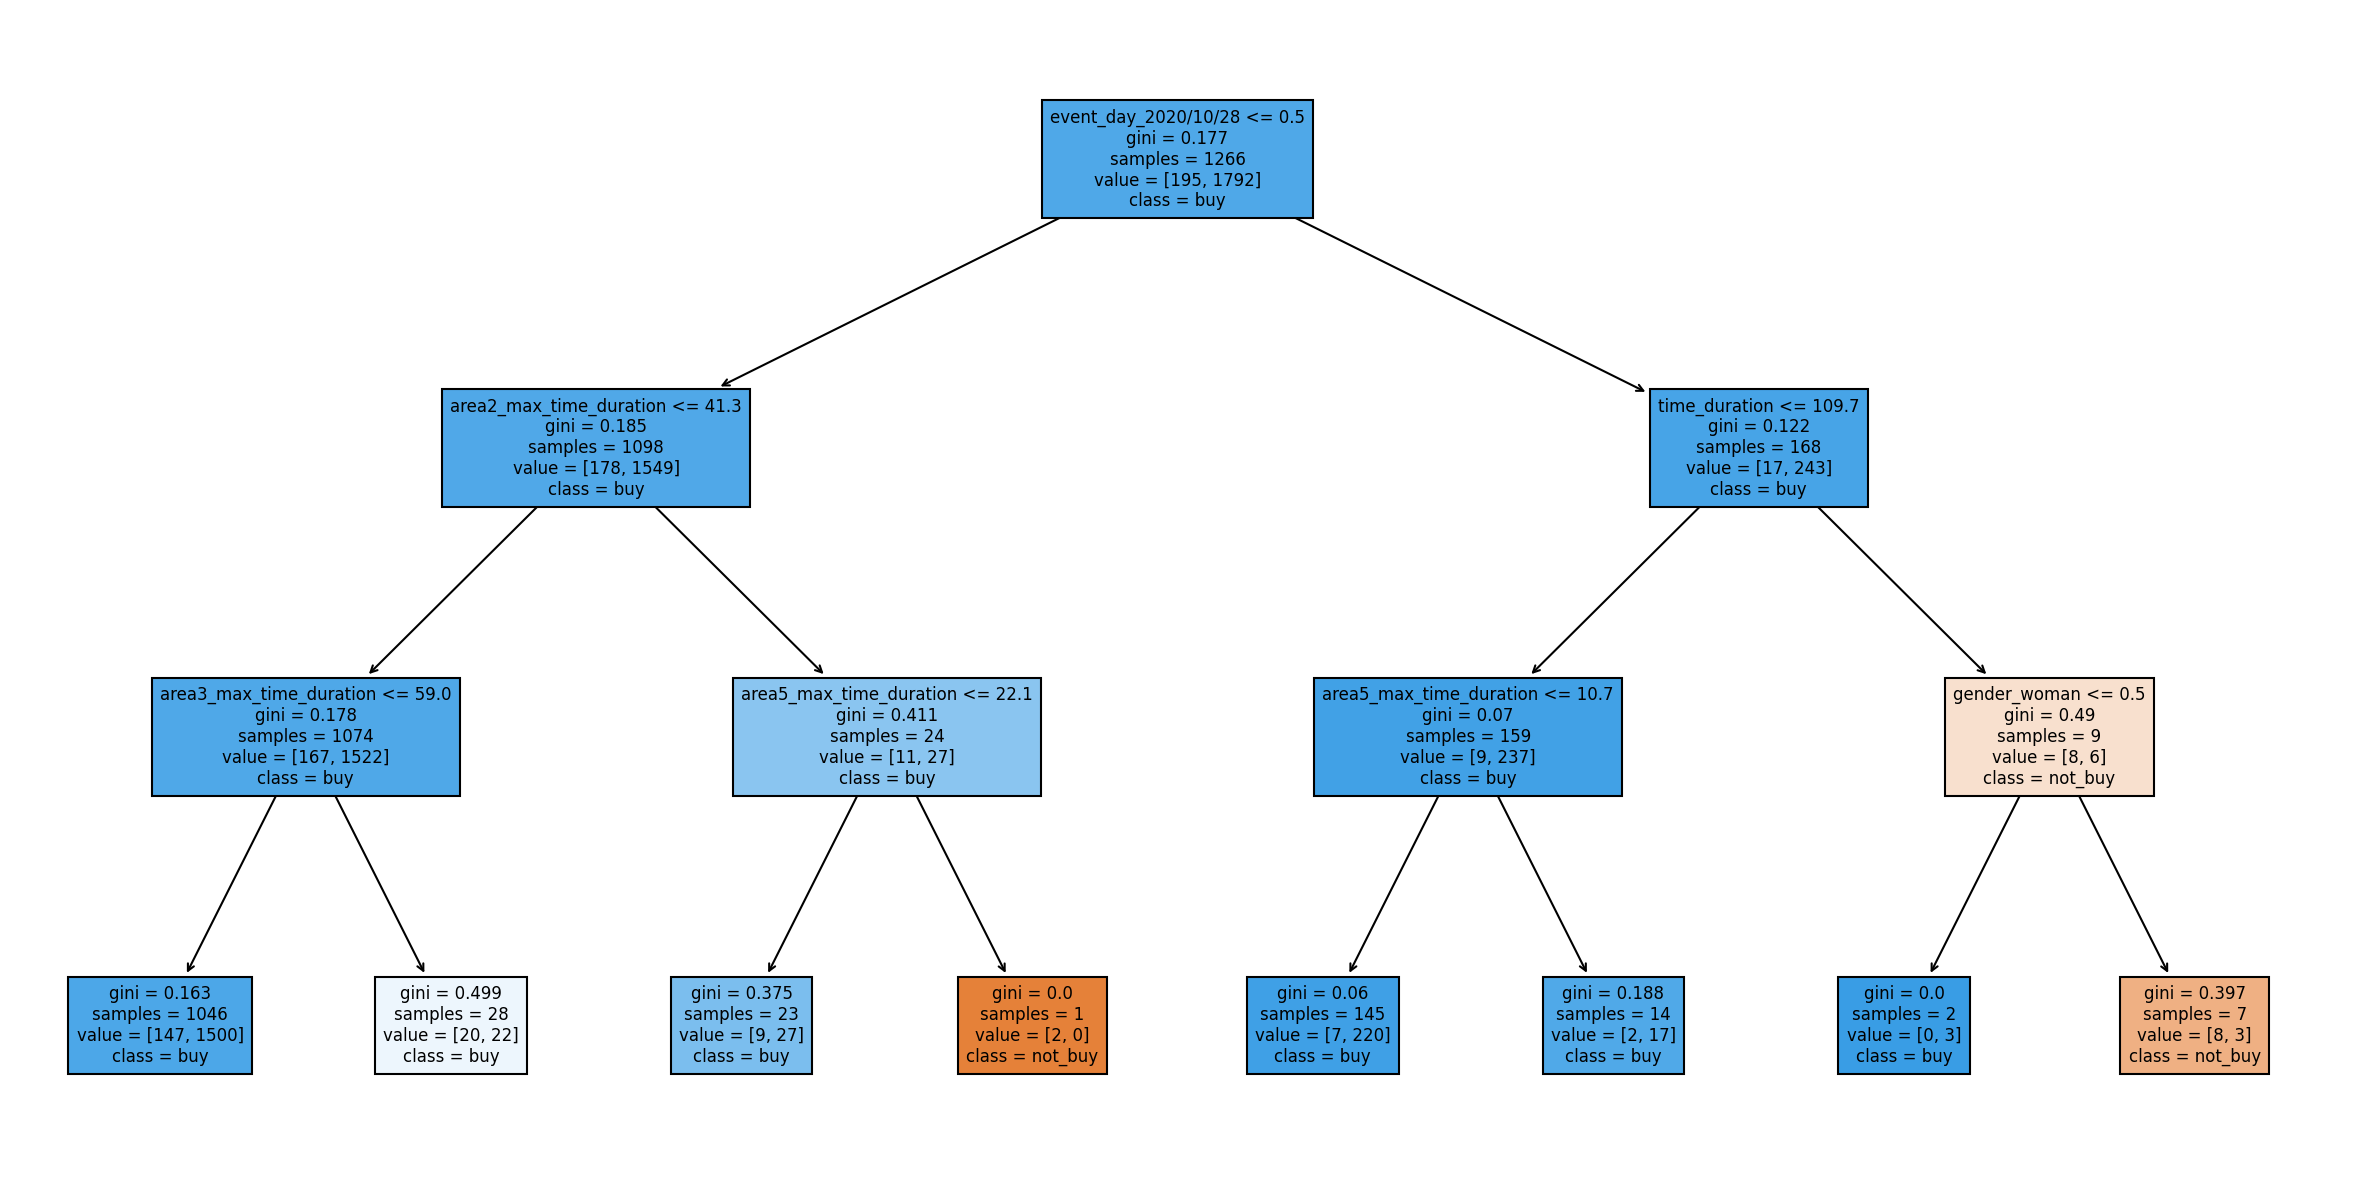

In [254]:
#visualization of random forest tree
plt.figure(figsize=(20,10), facecolor='white', dpi=150)
plot_tree(rf_clf.estimators_[0], feature_names=dtc_features, class_names=['not_buy','buy'],
          fontsize=8, filled=True)
plt.show()

Reference: https://stackoverflow.com/questions/40155128/plot-trees-for-a-random-forest-in-python-with-scikit-learn

In [255]:
#check feature importance
importance_df = pd.DataFrame({'feature': dtc_features, 'importance': rf_clf.feature_importances_})
importance_df = importance_df.sort_values(by='importance', ascending=False).reset_index(drop=True)
importance_df.head(15)

feature  importance
0   area3_max_time_duration    0.311301
1             time_duration    0.204461
2   area2_max_time_duration    0.121509
3   area1_max_time_duration    0.068465
4   area5_max_time_duration    0.054475
5   area4_max_time_duration    0.053455
6                  age_10's    0.049064
7                  age_50's    0.032495
8                  age_20's    0.022775
9      event_day_2020/10/27    0.017298
10     event_day_2020/10/31    0.011028
11             gender_woman    0.009641
12                 age_40's    0.008373
13                 age_30's    0.008042
14      event_day_2020/11/1    0.006447

In [256]:
#predicting test data
rf_test_pred_y = rf_clf.predict(dtc_test_df[dtc_features])
rf_test_proba_y = rf_clf.predict_proba(dtc_test_df[dtc_features]).T[1]

In [257]:
#read sample submit data
gi_sample_submit_df = pd.read_csv("./jissen-marketing/gi_sample_submit.csv")

In [258]:
#create df for kaggle submission
submit_df = dtc_test_df.copy()[['customer_id']]
submit_df['buy_proba'] = rf_test_proba_y
submit_df.head()

customer_id  buy_proba
0  20201026-010002   0.939782
1  20201026-010012   0.944339
2  20201026-010016   0.909947
3  20201026-010018   0.902339
4  20201026-010022   0.889624

In [259]:
submit_df = pd.merge(gi_sample_submit_df.drop('buy_proba', axis=1), submit_df,
                     on='customer_id', how='left').reset_index(drop=True)
submit_df.head()

customer_id  buy_proba
0  20201026-010002   0.939782
1  20201026-010012   0.944339
2  20201026-010016   0.909947
3  20201026-010018   0.902339
4  20201026-010022   0.889624

In [260]:
submit_df.to_csv(f"./output/submit_rf.csv", encoding='utf-8', index=False)

#### Stacking implementation (by holdout method)

Stacking can combine different model results to improve prediction performance. Stacking technique will utilize prediction outputs from several models as an input of meta-model to calibulate final prediction.

Reference:
https://qiita.com/hara_tatsu/items/336f9fff08b9743dc1d2

In [261]:
#prediction of validation data from train_valid data's features
dtc_pred_y = dtc_clf.predict_proba(dtc_train_valid_df[dtc_features]).T[1]
gbm_pred_y = lgbc_clf.predict(dtc_train_valid_df[lgbc_features])
rf_pred_y = rf_clf.predict_proba(dtc_train_valid_df[dtc_features]).T[1]

In [262]:
dtc_pred_y

array([0.9039932 , 0.95701813, 0.95701813, ..., 0.9039932 , 0.9039932 ,
       0.92307692])

In [263]:
gbm_pred_y

array([0.88841427, 0.93831739, 0.9761129 , ..., 0.8759269 , 0.93097738,
       0.94867644])

In [264]:
rf_pred_y

array([0.90881958, 0.92301219, 0.94131498, ..., 0.89049167, 0.91532984,
       0.9281815 ])

In [265]:
#stacking predictions from above models
stack_pred_y = np.column_stack((dtc_pred_y,gbm_pred_y,rf_pred_y))

In [266]:
stack_pred_y_df = pd.DataFrame(stack_pred_y)

In [267]:
stack_pred_y_df

0         1         2
0     0.903993  0.888414  0.908820
1     0.957018  0.938317  0.923012
2     0.957018  0.976113  0.941315
3     0.957018  0.966952  0.935582
4     0.957018  0.906514  0.918170
...        ...       ...       ...
1320  0.903993  0.916177  0.907328
1321  0.957018  0.966303  0.934545
1322  0.903993  0.875927  0.890492
1323  0.903993  0.930977  0.915330
1324  0.923077  0.948676  0.928181

[1325 rows x 3 columns]

In [268]:
#create meta model
meta_model = RandomForestClassifier(max_depth=3, random_state=rnd_state)
#learn by stack_pred_y and train_valid's target value
meta_model.fit(stack_pred_y_df, dtc_train_valid_df[target])

RandomForestClassifier(max_depth=3, random_state=57)

In [269]:
#By stacking, AUC improves a lot.
# predicting validation data
meta_valid_pred_y = meta_model.predict(stack_pred_y_df)
meta_valid_proba_y = meta_model.predict_proba(stack_pred_y_df).T[1]

#check accuracy and auc
meta_accuracy_val = accuracy_score(dtc_train_valid_df[target], meta_valid_pred_y)
meta_auc_val = roc_auc_score(dtc_train_valid_df[target], meta_valid_proba_y)
meta_accuracy_val, meta_auc_val

(0.9154716981132075, 0.7611386138613861)

In [270]:
#predicting test data
dtc_test_pred_y = dtc_clf.predict_proba(dtc_test_df[dtc_features]).T[1]
gbm_test_pred_y = lgbc_clf.predict(dtc_test_df[lgbc_features])
rf_test_pred_y = rf_clf.predict_proba(dtc_test_df[dtc_features]).T[1]

In [271]:
#stacking test data
stack_test_pred_y = np.column_stack((dtc_test_pred_y,gbm_test_pred_y,rf_test_pred_y))
stack_test_pred_y_df = pd.DataFrame(stack_test_pred_y)

In [272]:
stack_test_pred_y_df

0         1         2
0     0.957018  0.974064  0.939782
1     0.957018  0.980363  0.944339
2     0.957018  0.893120  0.909947
3     0.957018  0.900905  0.902339
4     0.957018  0.944868  0.889624
...        ...       ...       ...
2204  0.957018  0.906475  0.916985
2205  0.903993  0.913338  0.912921
2206  0.957018  0.921255  0.920242
2207  0.957018  0.936987  0.932564
2208  0.957018  0.925752  0.917748

[2209 rows x 3 columns]

In [273]:
meta_test_proba_y = meta_model.predict_proba(stack_test_pred_y_df).T[1]

In [274]:
#read sample submit data
gi_sample_submit_df = pd.read_csv("./jissen-marketing/gi_sample_submit.csv")

In [275]:
#create df for kaggle submission
submit_df = dtc_test_df.copy()[['customer_id']]
submit_df['buy_proba'] = meta_test_proba_y
submit_df.head()

customer_id  buy_proba
0  20201026-010002   0.972277
1  20201026-010012   0.969856
2  20201026-010016   0.926572
3  20201026-010018   0.905728
4  20201026-010022   0.922036

In [276]:
submit_df = pd.merge(gi_sample_submit_df.drop('buy_proba', axis=1), submit_df,
                     on='customer_id', how='left').reset_index(drop=True)
submit_df.head()

customer_id  buy_proba
0  20201026-010002   0.972277
1  20201026-010012   0.969856
2  20201026-010016   0.926572
3  20201026-010018   0.905728
4  20201026-010022   0.922036

In [277]:
submit_df.to_csv(f"./output/submit_stacking.csv", encoding='utf-8', index=False)

#### Stacking implementation 2 (by cross validation)

Reference:

書籍：Kaggleで勝つデータ分析の技術(Japanese only)

##### Check how KFold function works

In [300]:
#import library for k-fold cross validation
from sklearn.model_selection import KFold

In [301]:
#checking how KFold works. KFold can return index number for train data index and validation data index
kf = KFold(n_splits = 5, shuffle=True, random_state=rnd_state)

for i, (train_index, validation_index) in enumerate(kf.split(dtc_train_df[dtc_features])):
  if i == 4:
    print(i)
    print(train_index)
    print(validation_index)

4
[   0    1    2 ... 3309 3310 3311]
[   6   17   36   47   48   51   53   73   74   78   79   87   89   94
   97   98  102  103  104  105  107  113  121  133  134  140  145  146
  152  155  162  163  165  166  183  184  189  213  216  220  223  224
  232  234  238  258  263  272  275  286  294  304  309  316  345  353
  354  360  363  364  382  387  388  390  396  400  402  406  409  410
  414  420  421  426  431  440  450  452  455  460  462  469  472  473
  474  475  477  489  491  494  496  502  505  509  516  524  525  527
  532  535  545  551  552  557  563  568  574  578  581  585  594  610
  613  619  621  629  631  668  673  674  688  700  702  712  714  720
  722  728  735  740  747  752  761  763  767  770  777  778  782  784
  791  798  803  811  815  816  820  823  827  828  832  837  839  841
  844  846  865  882  887  896  897  900  904  917  919  922  923  931
  939  949  960  962  964  984  989  991 1009 1015 1019 1021 1025 1026
 1030 1032 1041 1042 1050 1057 1058 106

In [302]:
dtc_train_df[dtc_features].iloc[train_index].head()

time_duration  event_day_2020/10/27  event_day_2020/10/28  \
0            6.2                     0                     0   
1           14.2                     0                     0   
2           19.2                     0                     0   
3           19.8                     0                     0   
4           78.6                     0                     0   

   event_day_2020/10/29  event_day_2020/10/30  event_day_2020/10/31  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   event_day_2020/11/1  gender_woman  age_10's  age_20's  age_30's  age_40's  \
0                    0             1         0         0         1         0   
1                    0             0         0         0         0         0   
2                    0             1         0         0         1         0   
3                    0             0         0         0         0         1   
4                    0             0         0         0         1         0   

   age_50's  age_60's  age_Over70's  area1_max_time_duration  \
0         0         0             0                      6.2   
1         1         0             0                     14.0   
2         0         0             0                      4.8   
3         0         0             0                      7.2   
4         0         0             0                     -1.0   

   area2_max_time_duration  area3_max_time_duration  area4_max_time_duration  \
0                     -1.0                     -1.0                     -1.0   
1                     -1.0                     -1.0                     -1.0   
2                     -1.0                     -1.0                     -1.0   
3                     -1.0                     -1.0                     -1.0   
4                     44.0                     -1.0                     -1.0   

   area5_max_time_duration  
0                     -1.0  
1                     -1.0  
2                     -1.0  
3                     -1.0  
4                     -1.0

In [303]:
dtc_train_df[dtc_features].iloc[validation_index].head()

time_duration  event_day_2020/10/27  event_day_2020/10/28  \
6             6.4                     0                     0   
17           55.4                     0                     0   
36           21.0                     0                     0   
47          107.8                     0                     0   
48           24.4                     0                     0   

    event_day_2020/10/29  event_day_2020/10/30  event_day_2020/10/31  \
6                      0                     0                     0   
17                     0                     0                     0   
36                     0                     0                     0   
47                     0                     0                     0   
48                     0                     0                     0   

    event_day_2020/11/1  gender_woman  age_10's  age_20's  age_30's  age_40's  \
6                     0             0         0         0         0         0   
17                    0             0         0         0         0         1   
36                    0             1         0         0         0         1   
47                    0             1         0         1         0         0   
48                    0             1         0         1         0         0   

    age_50's  age_60's  age_Over70's  area1_max_time_duration  \
6          1         0             0                     -1.0   
17         0         0             0                      4.6   
36         0         0             0                     -1.0   
47         0         0             0                     41.0   
48         0         0             0                     11.2   

    area2_max_time_duration  area3_max_time_duration  area4_max_time_duration  \
6                      -1.0                     -1.0                     -1.0   
17                     10.2                     23.6                      5.8   
36                     -1.0                     -1.0                     -1.0   
47                     35.8                      7.0                     -1.0   
48                     -1.0                     -1.0                     -1.0   

    area5_max_time_duration  
6                       5.4  
17                     -1.0  
36                     12.6  
47                     -1.0  
48                     -1.0

##### Function to implement stacking

In [316]:
# function to return prediction values that do not know target value of learning data
# and return prediction value toward test data
def predict_cv(model, train_df_x, train_df_y, test_df_x, rnd_state):
  preds_valid_ys = []
  preds_test_ys = []
  valid_idxes = []

  kf = KFold(n_splits = 5, shuffle=True, random_state=rnd_state)

  #learn and predict by cross validation
  for i, (train_idx, valid_idx) in enumerate(kf.split(train_df_x)):
    #split train_train and train_valid
    train_train_features_df, train_valid_features_df = train_df_x.iloc[train_idx], train_df_x.iloc[valid_idx]
    train_train_target, train_valid_target = train_df_y.iloc[train_idx], train_df_y.iloc[valid_idx]

    #predict train_valid_y by train_valid target values
    #prediction operation for lgbc
    if model == lgbc_clf:
      pred_valid_y = model.predict(train_valid_features_df)
    #prediction operation for sklearn families (dtc, rf etc)
    else:
      pred_valid_y = model.predict_proba(train_valid_features_df).T[1]

    preds_valid_ys.append(pred_valid_y)
    #predict test target value by test data
    #prediction operation for lgbc
    if model == lgbc_clf:
      pred_test_y = model.predict(test_df_x)
    #prediction operation for sklearn families (dtc, rf etc)
    else:
      pred_test_y = model.predict_proba(test_df_x).T[1]

    preds_test_ys.append(pred_test_y)
    #save validation values' index
    valid_idxes.append(valid_idx)

  #concatenate all pred_valid_y and sort ascending order
  valid_idxes = np.concatenate(valid_idxes)
  preds_valid_ys = np.concatenate(preds_valid_ys, axis=0)
  order = np.argsort(valid_idxes)
  pred_train_valid_all = preds_valid_ys[order]

  #taking average of prediction against test data
  pred_test = np.mean(preds_test_ys, axis=0)

  return pred_train_valid_all, pred_test

##### Stacking operation using above function

In [336]:
#1st layer of stacking

pred_train_1a, pred_test_1a = predict_cv(dtc_clf, dtc_train_df[dtc_features], dtc_train_df[target], dtc_test_df[dtc_features], rnd_state)
pred_train_1b, pred_test_1b = predict_cv(lgbc_clf, dtc_train_df[dtc_features], dtc_train_df[target], dtc_test_df[lgbc_features], rnd_state)
pred_train_1c, pred_test_1c = predict_cv(rf_clf, dtc_train_df[dtc_features], dtc_train_df[target], dtc_test_df[dtc_features], rnd_state)

In [337]:
pred_train_1c

array([0.93528363, 0.93990963, 0.93495108, ..., 0.92845994, 0.92928453,
       0.92842903])

In [338]:
#stacking predictions from above models
stack_pred_train_y = np.column_stack((pred_train_1a,pred_train_1b,pred_train_1c))
stack_pred_train_df = pd.DataFrame(stack_pred_train_y)

In [339]:
stack_pred_train_df

0         1         2
0     0.932380  0.970959  0.935284
1     0.932380  0.974064  0.939910
2     0.932380  0.964848  0.934951
3     0.932380  0.961355  0.932975
4     0.932380  0.844220  0.883437
...        ...       ...       ...
3307  0.932380  0.825660  0.908795
3308  0.828125  0.862988  0.889517
3309  0.932380  0.955162  0.928460
3310  0.932380  0.961295  0.929285
3311  0.932380  0.956328  0.928429

[3312 rows x 3 columns]

In [340]:
#create meta model
meta_model = RandomForestClassifier(max_depth=3, random_state=rnd_state)
#learn by stack_pred_y and train_valid's target value
meta_model.fit(stack_pred_train_df, dtc_train_df[target])

RandomForestClassifier(max_depth=3, random_state=57)

In [341]:
#By stacking, AUC improves a lot.
# predicting validation data
meta_valid_pred_y = meta_model.predict(stack_pred_train_df)
meta_valid_proba_y = meta_model.predict_proba(stack_pred_train_df).T[1]

#check accuracy and auc
meta_accuracy_val = accuracy_score(dtc_train_df[target], meta_valid_pred_y)
meta_auc_val = roc_auc_score(dtc_train_df[target], meta_valid_proba_y)
meta_accuracy_val, meta_auc_val

(0.9169685990338164, 0.7281649732377756)

In [342]:
#stacking test data
stack_pred_test_y = np.column_stack((pred_test_1a,pred_test_1b,pred_test_1c))
stack_pred_test_df = pd.DataFrame(stack_pred_test_y)

In [344]:
stack_pred_test_df

0         1         2
0     0.932380  0.974064  0.939782
1     0.932380  0.980363  0.944339
2     0.932380  0.893120  0.909947
3     0.828125  0.900905  0.902339
4     0.828125  0.944868  0.889624
...        ...       ...       ...
2204  0.932380  0.906475  0.916985
2205  0.932380  0.913338  0.912921
2206  0.932380  0.921255  0.920242
2207  0.932380  0.936987  0.932564
2208  0.932380  0.925752  0.917748

[2209 rows x 3 columns]

In [345]:
meta_test_proba_y = meta_model.predict_proba(stack_test_pred_y_df).T[1]

In [346]:
#read sample submit data
gi_sample_submit_df = pd.read_csv("./jissen-marketing/gi_sample_submit.csv")

In [347]:
#create df for kaggle submission
submit_df = dtc_test_df.copy()[['customer_id']]
submit_df['buy_proba'] = meta_test_proba_y
submit_df.head()

customer_id  buy_proba
0  20201026-010002   0.962178
1  20201026-010012   0.961418
2  20201026-010016   0.921841
3  20201026-010018   0.915608
4  20201026-010022   0.869934

In [348]:
submit_df.to_csv(f"./output/submit_stacking_cv.csv", encoding='utf-8', index=False)